# Digital For Industrial Summative - Part 1
 
## Creating A Digital Thread

### Assignment by Chukwudum C. Chukwuedo

A Digital Thread is the one unifying theme or characteristic that connects every aspect of an asset or unit, right from its inception and design, to manufacture, deployment, operations, maintenance to eventual retirement.

In analysis, a digital thread is the logical with which we bind and merge the various data sources into one whole, so that it lends itself to quantitative approaches easily.

<img src = 'images/Digital_Thread.JPG' width=500>


A digital thread is a technique to 'stitch' the data that comes in disjoint tables, such that they can be put together logically. That is a task for this exercise.

Data sets provided:

We have been given 5 data sets, all of which related to one month's worth of readings taken at a live volcano site. The volcano was instrumented with multiple sensors in 10 different geographical points (nodes). Our goal is to combine and merge all of this into one digital thread, making it amenable for analysis.

Tasks:

    1.0 Read all the needed input files
    2.0 Plotting Sensor Time Series
    3.0 Descriptive Analysis One data frame at a time 
    4.0 Creating a Digital Thread from the data sets
    5.0 Time Series based analysis
    6.0 Correlations Analysis
    7.0 Data Manipulations to Merge multiple data sets
    8.0 Building A Battery Remaining-Life prediction model

In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('dark_background')
import seaborn as sns

import os

In [49]:
%matplotlib inline

### 1.0 Read all the needed input files

Create multiple data frames, one to hold each data table.

Convert all Data frame time stamps into date-time format, so that time-based indexing is possible

In [50]:
data_dir = 'summ1_data'#/Volcano'
_files = os.listdir(data_dir)
_files

['sensors.csv',
 'datapoints.zip',
 'datatypes.csv',
 'datapoints.csv',
 'volcanos.csv',
 'nodes.csv']

In [51]:
data_sensor = pd.read_csv('summ1_data/sensors.csv')
data_sensor['created_at'], data_sensor['updated_at'] = pd.to_datetime(data_sensor['created_at']), pd.to_datetime(data_sensor['updated_at'])
data_sensor.rename(columns = {'id': 'sensor_id'}, inplace=True)

data_point = pd.read_csv('summ1_data/datapoints.csv')
data_point['timestamp'] = pd.to_datetime(data_point['timestamp'])
# filling the missing values with realistic numbers, I am using the interpolation method below
data_point['value'].interpolate(method='polynomial', order=2, inplace=True)
#data_point = data_point.fillna(data_point.median())
data_point.rename(columns = {'id': 'data_point_id'}, inplace=True)

data_type = pd.read_csv('summ1_data/datatypes.csv')
data_type.rename(columns = {'id': 'data_type_id'}, inplace=True)

data_volcano = pd.read_csv('summ1_data/volcanos.csv')
data_volcano['created_at'], data_volcano['updated_at'] = pd.to_datetime(data_volcano['created_at']), pd.to_datetime(data_volcano['updated_at'])
data_volcano.rename(columns = {'id': 'volcano_id'}, inplace=True)

data_nodes = pd.read_csv('summ1_data/nodes.csv')
data_nodes['created_at'], data_nodes['updated_at'] = pd.to_datetime(data_nodes['created_at']), pd.to_datetime(data_nodes['updated_at'])
data_nodes.rename(columns = {'id': 'node_id'}, inplace=True);

In [52]:
data_sensor.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 8 columns):
sensor_id         61 non-null object
description       61 non-null object
data_frequency    61 non-null int64
status            61 non-null object
created_at        61 non-null datetime64[ns, UTC]
updated_at        61 non-null datetime64[ns, UTC]
data_type_id      61 non-null object
node_id           61 non-null object
dtypes: datetime64[ns, UTC](2), int64(1), object(5)
memory usage: 3.9+ KB


In [53]:
data_point.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 176534 entries, 0 to 176533
Data columns (total 4 columns):
data_point_id    176534 non-null object
value            176534 non-null float64
timestamp        176534 non-null datetime64[ns, UTC]
sensor_id        176534 non-null object
dtypes: datetime64[ns, UTC](1), float64(1), object(2)
memory usage: 5.4+ MB


In [54]:
data_type.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 4 columns):
data_type_id    7 non-null object
type            7 non-null object
si_unit         7 non-null object
type_id         7 non-null object
dtypes: object(4)
memory usage: 352.0+ bytes


In [55]:
data_volcano.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 7 columns):
volcano_id     1 non-null object
name           1 non-null object
description    1 non-null object
location       1 non-null object
status         1 non-null object
created_at     1 non-null datetime64[ns, UTC]
updated_at     1 non-null datetime64[ns, UTC]
dtypes: datetime64[ns, UTC](2), object(5)
memory usage: 184.0+ bytes


In [56]:
data_nodes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 8 columns):
node_id        11 non-null object
name           11 non-null object
description    11 non-null object
location       11 non-null object
status         11 non-null object
created_at     11 non-null datetime64[ns, UTC]
updated_at     11 non-null datetime64[ns, UTC]
volcano_id     11 non-null object
dtypes: datetime64[ns, UTC](2), object(6)
memory usage: 832.0+ bytes


In [57]:
data_sensor

,sensor_id,description,data_frequency,status,created_at,updated_at,data_type_id,node_id
0,c15a6370-8679-11e6-a353-2f6c041e2491,\N,1800000,OFFLINE,2016-08-07 00:51:40+00:00,2016-09-29 19:41:07.066000+00:00,35dcdad0-8679-11e6-bda3-ef77801087ee,c147ece0-8679-11e6-a353-2f6c041e2491
1,7635c920-8679-11e6-a353-2f6c041e2491,\N,1800000,OFFLINE,2016-08-03 04:39:25+00:00,2016-09-29 20:13:52.793000+00:00,35dcdad2-8679-11e6-bda3-ef77801087ee,762b8ff0-8679-11e6-a353-2f6c041e2491
2,763b9580-8679-11e6-a353-2f6c041e2491,\N,1800000,OFFLINE,2016-08-03 04:39:25+00:00,2016-09-29 20:13:52.797000+00:00,35dcdad1-8679-11e6-bda3-ef77801087ee,762b8ff0-8679-11e6-a353-2f6c041e2491
3,763ca6f0-8679-11e6-a353-2f6c041e2491,\N,1800000,OFFLINE,2016-08-03 04:39:25+00:00,2016-09-29 20:13:52.803000+00:00,35dcb3c0-8679-11e6-bda3-ef77801087ee,762b8ff0-8679-11e6-a353-2f6c041e2491
4,763d9150-8679-11e6-a353-2f6c041e2491,\N,1800000,OFFLINE,2016-08-03 04:39:25+00:00,2016-09-29 20:13:52.811000+00:00,35dcb3c1-8679-11e6-bda3-ef77801087ee,762b8ff0-8679-11e6-a353-2f6c041e2491
...,...,...,...,...,...,...,...,...
56,e66851e0-8679-11e6-a353-2f6c041e2491,\N,1800000,OFFLINE,2016-08-15 08:46:05+00:00,2016-09-29 20:13:52.902000+00:00,35dcb3c1-8679-11e6-bda3-ef77801087ee,e662fab0-8679-11e6-a353-2f6c041e2491
57,d3d73500-8679-11e6-a353-2f6c041e2491,\N,1800000,OFFLINE,2016-08-15 06:10:39+00:00,2016-10-05 12:42:18.933000+00:00,35dcdad2-8679-11e6-bda3-ef77801087ee,d3cbc350-8679-11e6-a353-2f6c041e2491
58,d3d7d140-8679-11e6-a353-2f6c041e2491,\N,1800000,OFFLINE,2016-08-15 06:10:39+00:00,2016-09-30 18:12:04.584000+00:00,35dcdad1-8679-11e6-bda3-ef77801087ee,d3cbc350-8679-11e6-a353-2f6c041e2491
59,d3d3b291-8679-11e6-a353-2f6c041e2491,\N,1800000,OFFLINE,2016-08-15 05:31:29+00:00,2016-09-30 18:12:04.585000+00:00,35dcdad0-8679-11e6-bda3-ef77801087ee,d3cb7530-8679-11e6-a353-2f6c041e2491


In [58]:
data_point

,data_point_id,value,timestamp,sensor_id
0,764c5e60-8679-11e6-a353-2f6c041e2491,98.000,2016-08-03 04:39:25+00:00,7635c920-8679-11e6-a353-2f6c041e2491
1,764c5e61-8679-11e6-a353-2f6c041e2491,33.198,2016-08-03 04:39:25+00:00,763b9580-8679-11e6-a353-2f6c041e2491
2,764dbdf0-8679-11e6-a353-2f6c041e2491,29.300,2016-08-03 04:39:25+00:00,763ca6f0-8679-11e6-a353-2f6c041e2491
3,764dbdf1-8679-11e6-a353-2f6c041e2491,96893.110,2016-08-03 04:39:25+00:00,763d9150-8679-11e6-a353-2f6c041e2491
4,764dbdf2-8679-11e6-a353-2f6c041e2491,459.736,2016-08-03 04:39:25+00:00,763701a1-8679-11e6-a353-2f6c041e2491
...,...,...,...,...
176529,39e16940-e707-11e6-89c8-314aa4f67f8c,125.000,2016-08-31 19:00:01+00:00,1248ff60-e707-11e6-89c8-314aa4f67f8c
176530,39e82000-e707-11e6-89c8-314aa4f67f8c,143.000,2016-08-31 19:50:00+00:00,1248ff60-e707-11e6-89c8-314aa4f67f8c
176531,39f08470-e707-11e6-89c8-314aa4f67f8c,175.000,2016-08-31 21:00:02+00:00,1248ff60-e707-11e6-89c8-314aa4f67f8c
176532,39f84ca0-e707-11e6-89c8-314aa4f67f8c,164.000,2016-08-31 21:50:00+00:00,1248ff60-e707-11e6-89c8-314aa4f67f8c


In [59]:
data_type

,data_type_id,type,si_unit,type_id
0,35dcb3c0-8679-11e6-bda3-ef77801087ee,temperature,celcius,TCA
1,35dcb3c1-8679-11e6-bda3-ef77801087ee,pressure,pascal,PA
2,35dcb3c2-8679-11e6-bda3-ef77801087ee,humidity,relative humidity,HUMA
3,35dcdad0-8679-11e6-bda3-ef77801087ee,carbon dioxide concentration,ppm,GP_CO2
4,35dcdad1-8679-11e6-bda3-ef77801087ee,hydrogen sulfide concentration,ppm,GP_H2S
5,35dcdad2-8679-11e6-bda3-ef77801087ee,battery,percentage,BAT
6,ed5edee0-e701-11e6-83c1-01ce06e6d17f,RSAM,counts,RSAM


In [60]:
data_volcano

,volcano_id,name,description,location,status,created_at,updated_at
0,35dc3e90-8679-11e6-bda3-ef77801087ee,Masaya,"This is the world's biggest, baddest, most evi...","{11.985318299999999,-86.178342900000004}",OFFLINE,2016-09-29 19:16:23.419000+00:00,2016-10-07 07:43:05.015000+00:00


In [61]:
data_nodes

,node_id,name,description,location,status,created_at,updated_at,volcano_id
0,c5e39fa0-867a-11e6-a353-2f6c041e2491,N1,\N,\N,OFFLINE,2016-08-17 01:06:49+00:00,2016-09-29 19:28:05.932000+00:00,35dc3e90-8679-11e6-bda3-ef77801087ee
1,c147ece0-8679-11e6-a353-2f6c041e2491,N9,\N,\N,OFFLINE,2016-08-07 00:51:40+00:00,2016-09-29 19:41:07.065000+00:00,35dc3e90-8679-11e6-bda3-ef77801087ee
2,76309900-8679-11e6-a353-2f6c041e2491,N8,\N,\N,OFFLINE,2016-08-03 22:09:40+00:00,2016-09-29 19:20:17.417000+00:00,35dc3e90-8679-11e6-bda3-ef77801087ee
3,762b8ff0-8679-11e6-a353-2f6c041e2491,N10,\N,\N,OFFLINE,2016-08-03 04:39:25+00:00,2016-09-29 19:20:17.431000+00:00,35dc3e90-8679-11e6-bda3-ef77801087ee
4,c14ccee0-8679-11e6-a353-2f6c041e2491,N2,\N,\N,OFFLINE,2016-08-10 04:20:22+00:00,2016-09-29 19:20:17.523000+00:00,35dc3e90-8679-11e6-bda3-ef77801087ee
5,d3cbc350-8679-11e6-a353-2f6c041e2491,N3,\N,\N,OFFLINE,2016-08-15 06:10:39+00:00,2016-10-05 12:42:18.953000+00:00,35dc3e90-8679-11e6-bda3-ef77801087ee
6,762c5340-8679-11e6-a353-2f6c041e2491,N7,\N,\N,OFFLINE,2016-08-03 21:50:32+00:00,2016-10-07 07:43:05.001000+00:00,35dc3e90-8679-11e6-bda3-ef77801087ee
7,d3ca3cb0-8679-11e6-a353-2f6c041e2491,N4,\N,\N,OFFLINE,2016-08-15 05:22:31+00:00,2016-10-07 07:43:05.001000+00:00,35dc3e90-8679-11e6-bda3-ef77801087ee
8,d3cb7530-8679-11e6-a353-2f6c041e2491,N5,\N,\N,OFFLINE,2016-08-15 05:31:29+00:00,2016-10-07 07:43:05.002000+00:00,35dc3e90-8679-11e6-bda3-ef77801087ee
9,ede3ed60-e701-11e6-83c1-01ce06e6d17f,RSAM,\N,\N,OFFLINE,1970-01-17 23:35:31.231000+00:00,2017-01-30 16:24:05.867000+00:00,35dc3e90-8679-11e6-bda3-ef77801087ee


### 2. Plotting Sensor Time Series

Create separate plots for each sensor in the dataset. Store each one in a separate file.

**What (if anything) can we tell about the various sensors from the plots?**


In [62]:
sensor_list = data_point.sensor_id.unique()
#test = range(len(sensor_list))
#test
#for a in range(4):
 #   print(a)

/home/cchukwuedo/anaconda3/envs/appdev/lib/python3.6/site-packages/ipykernel_launcher.py:10: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  # Remove the CWD from sys.path while we load stuff.


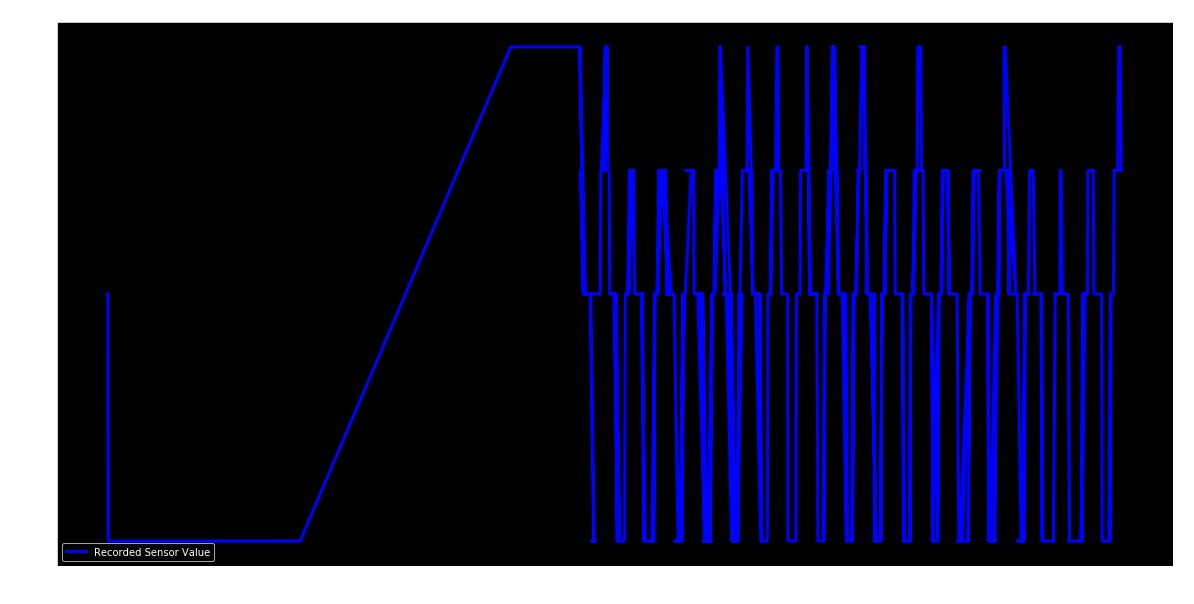

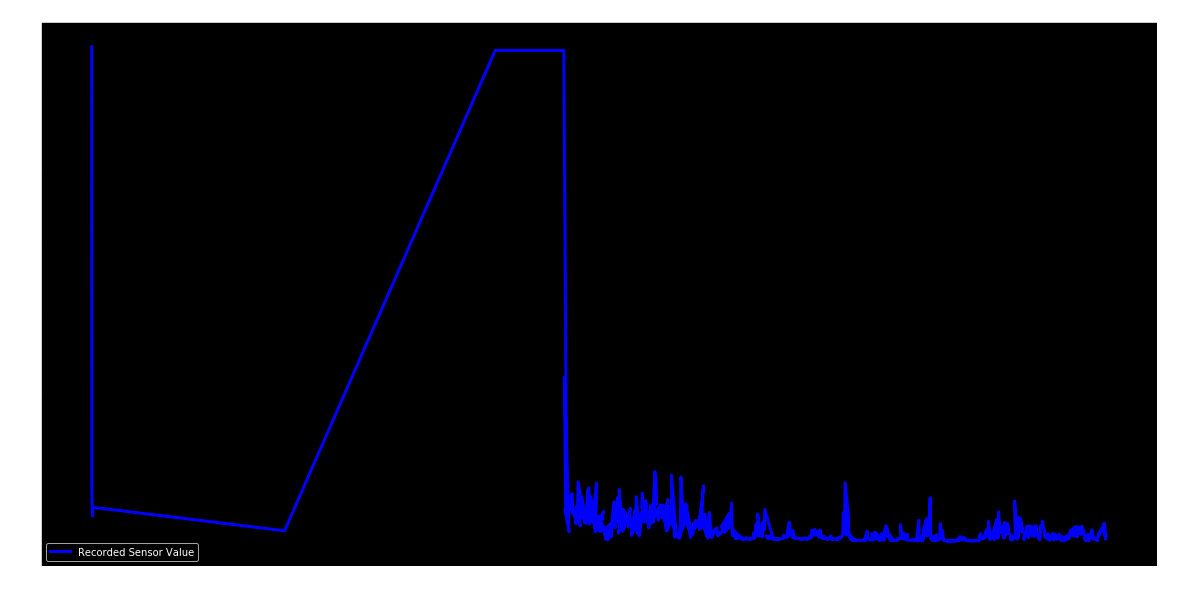

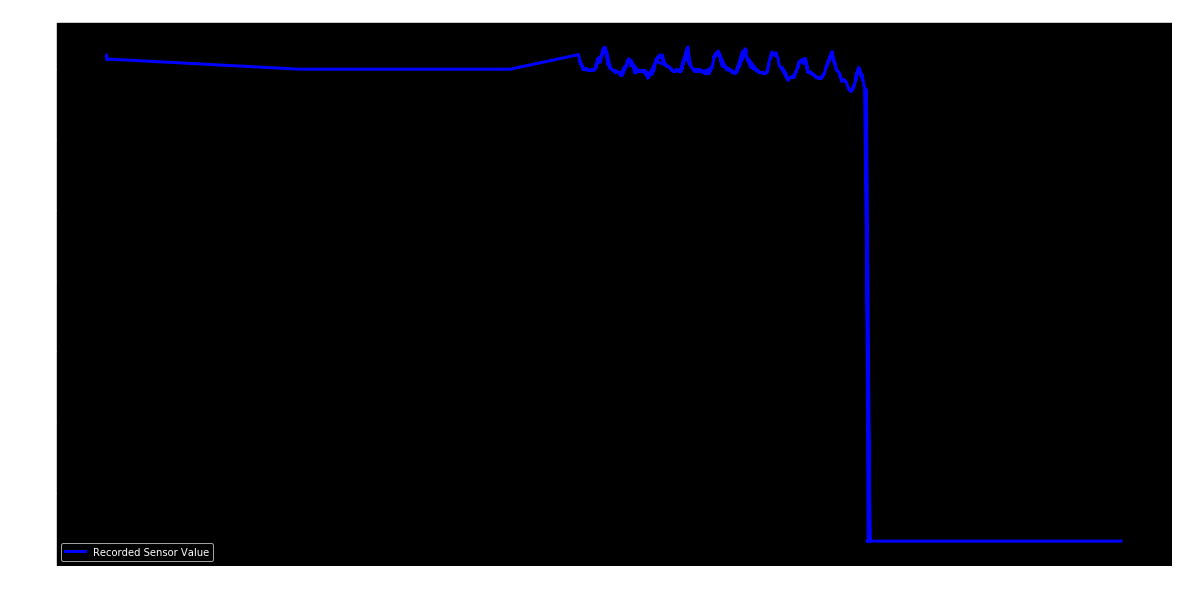

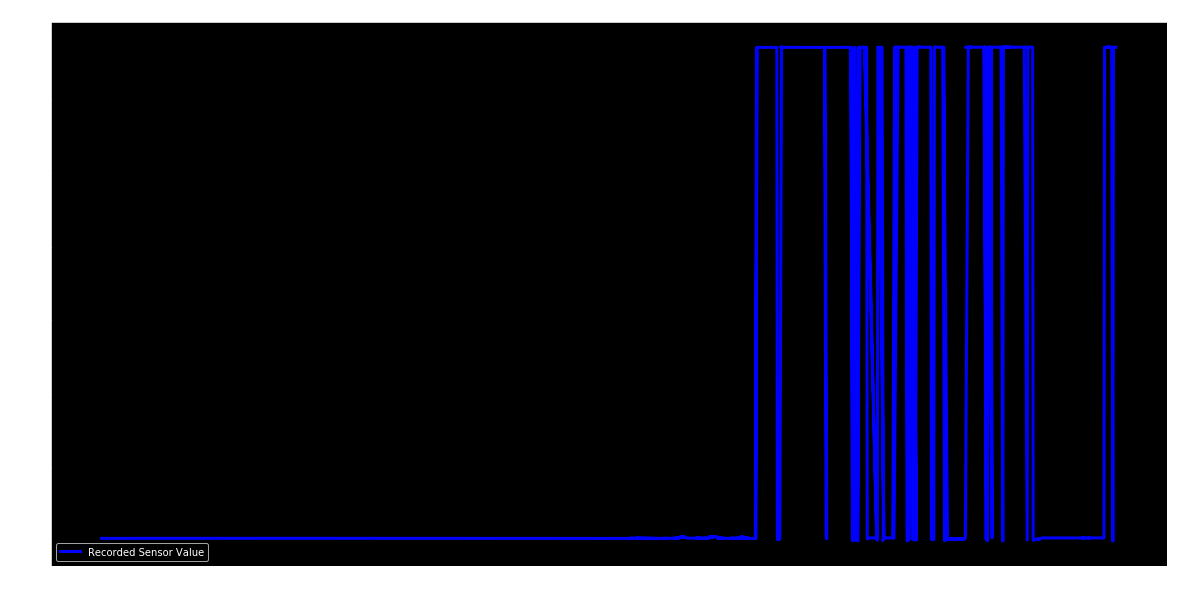

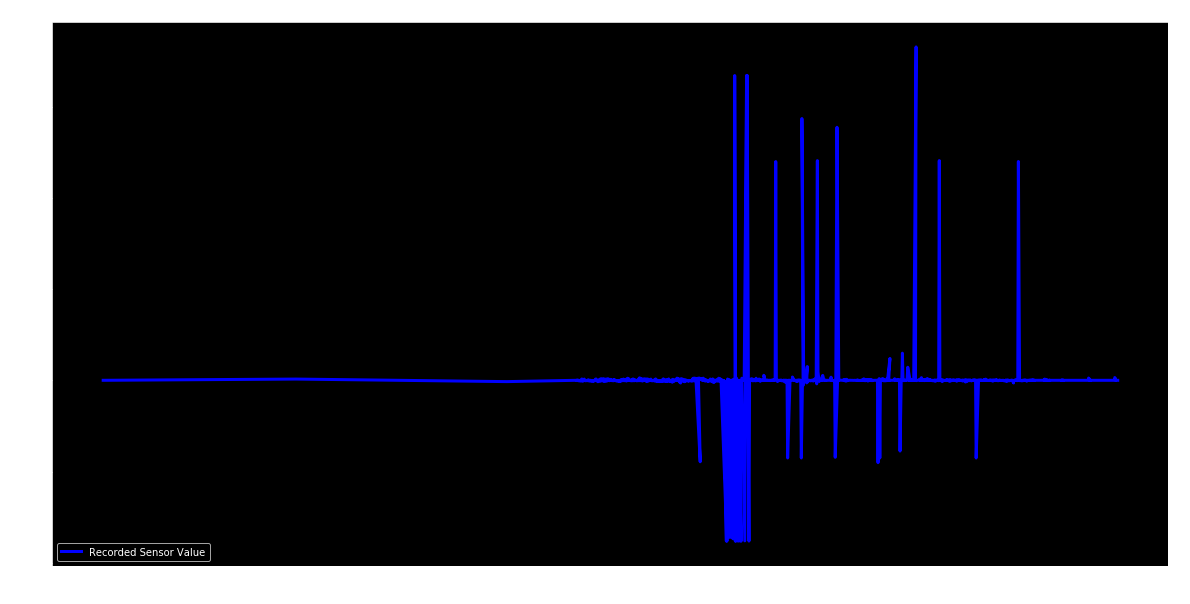

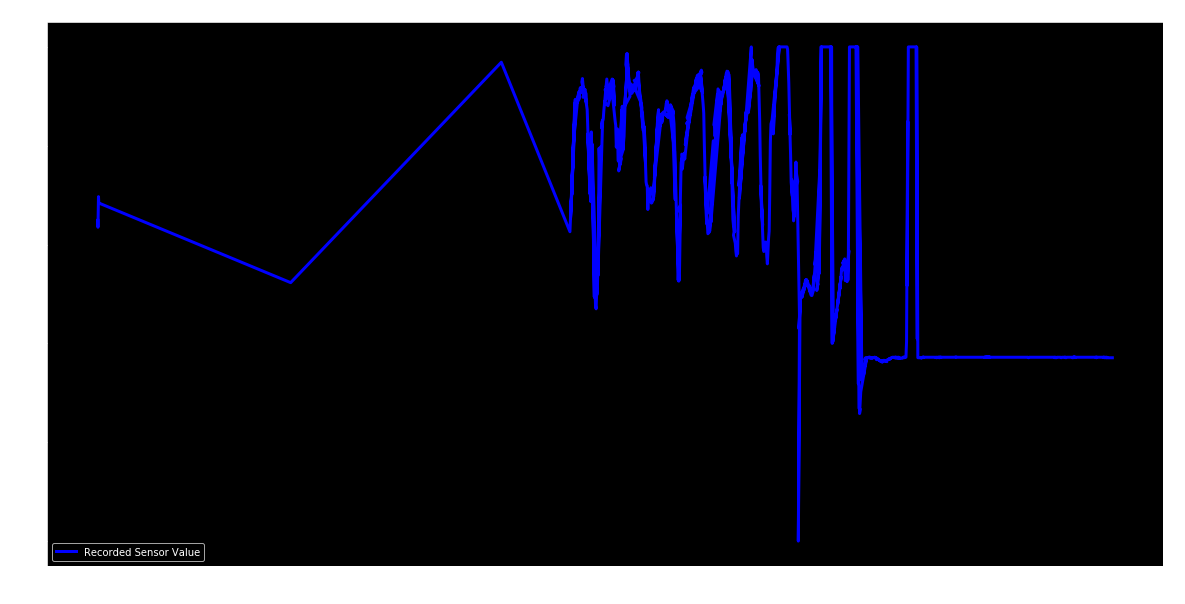

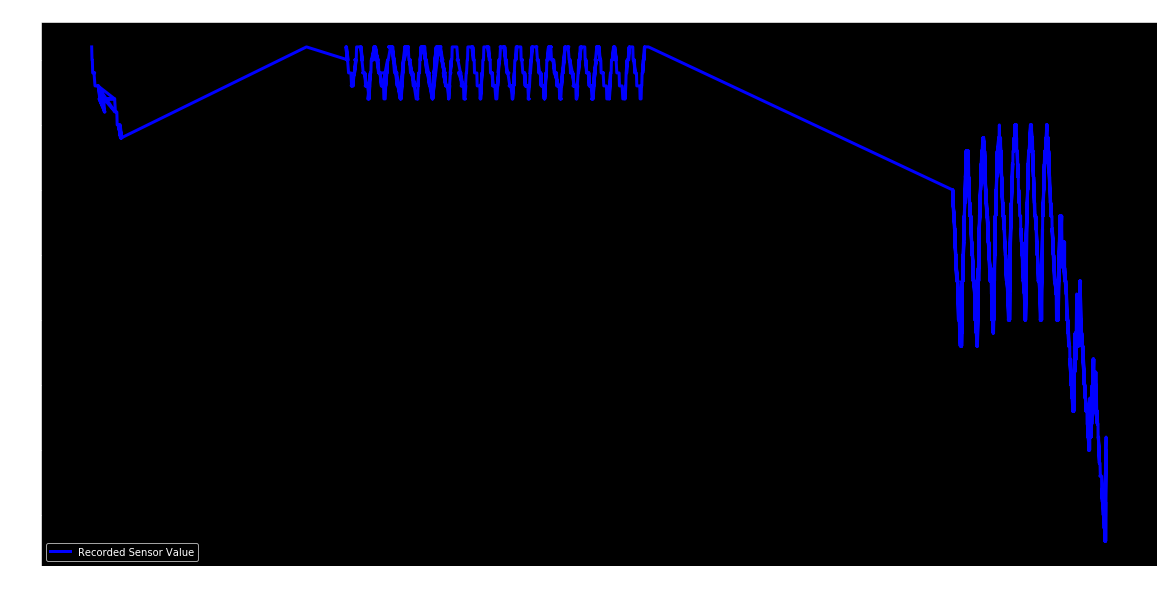

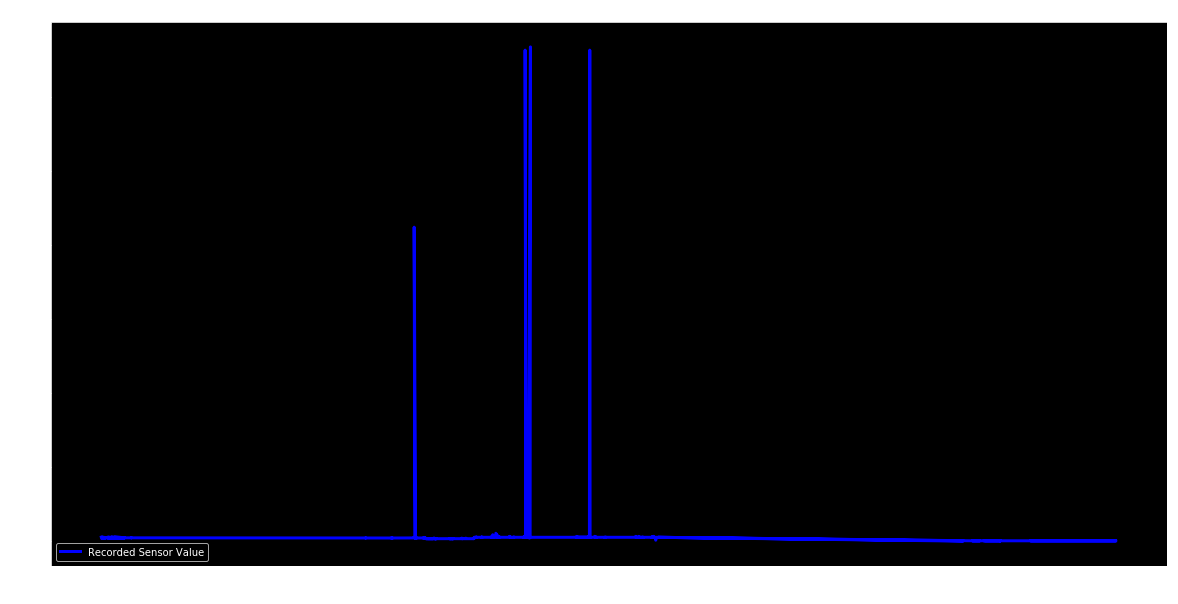

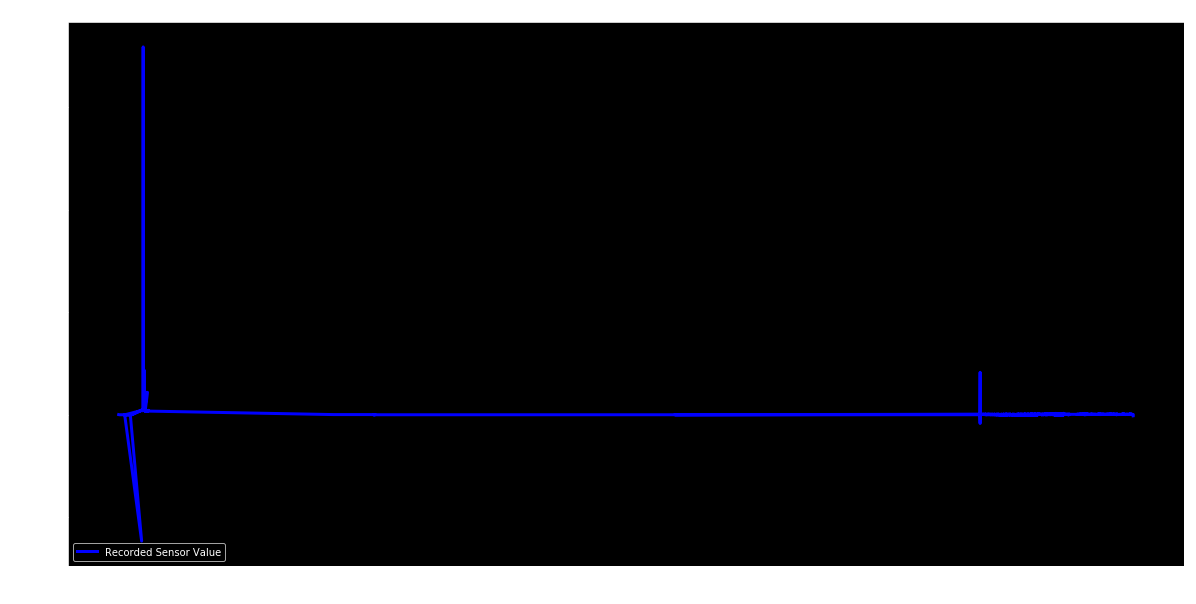

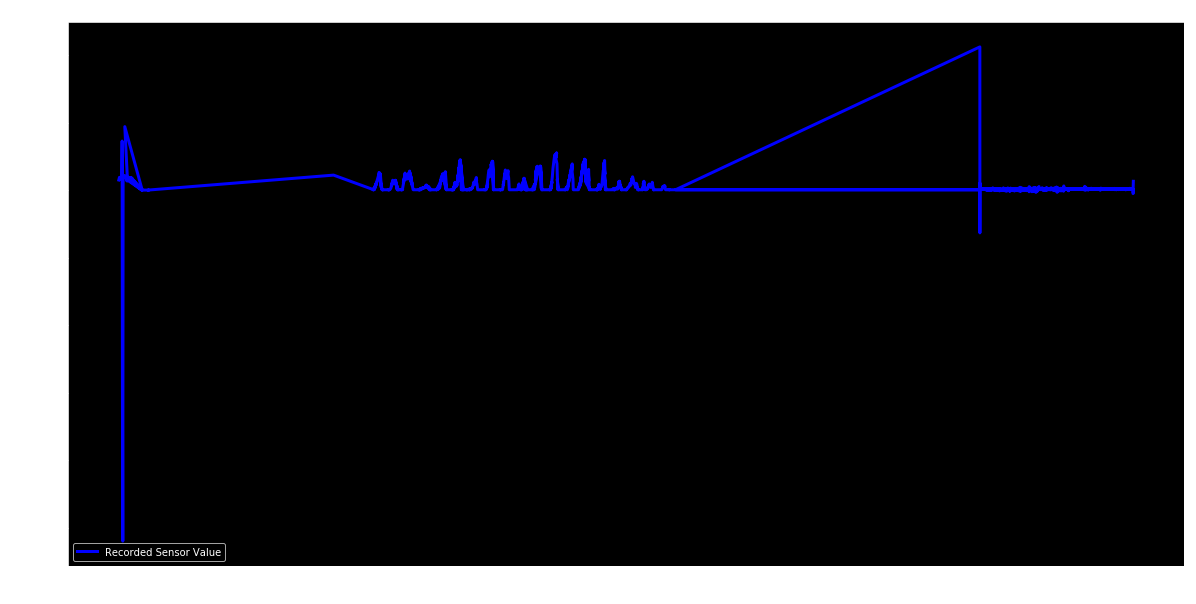

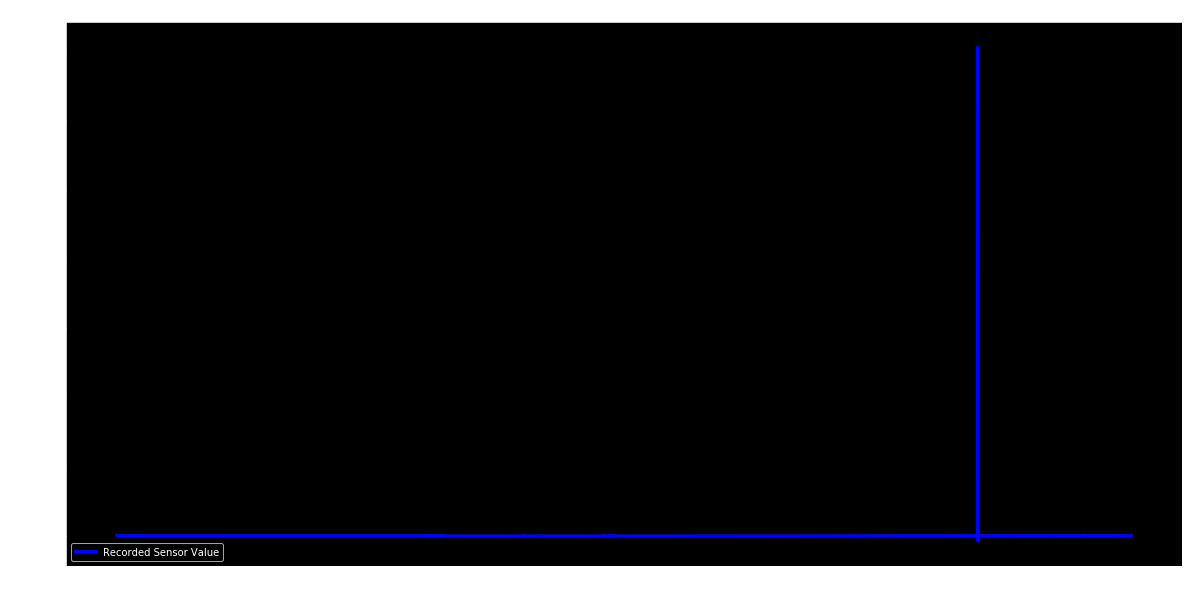

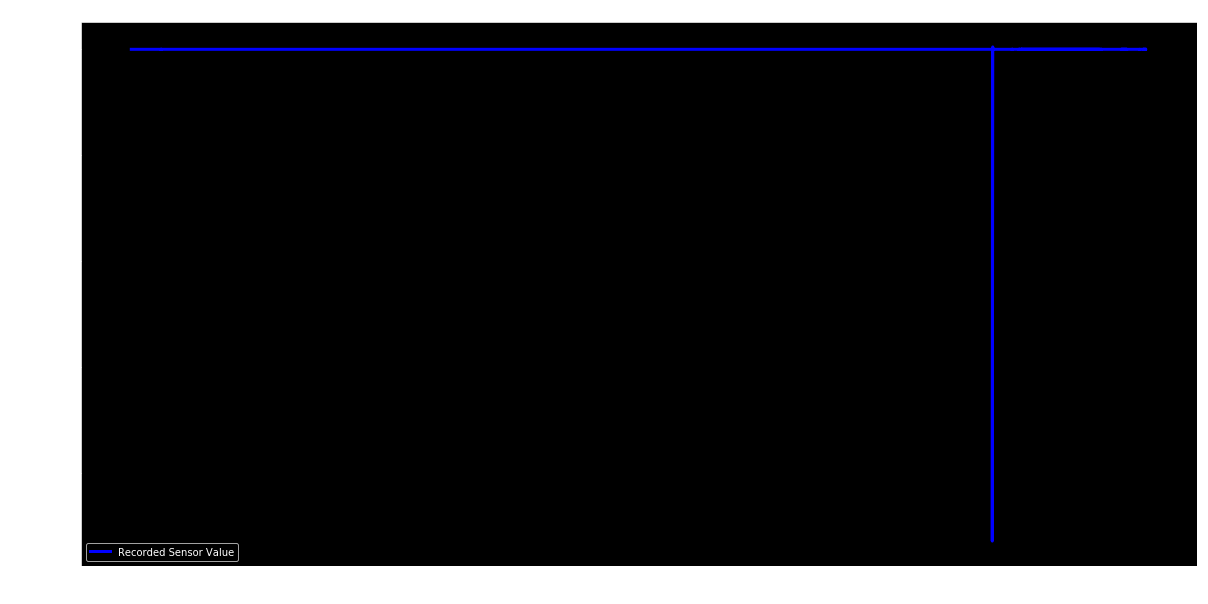

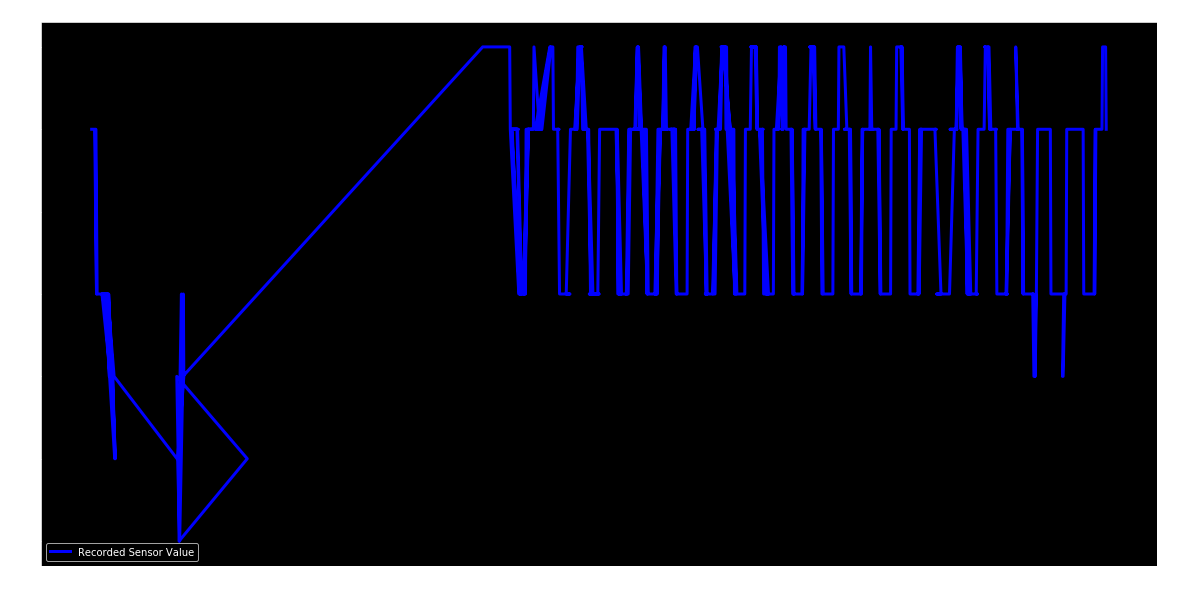

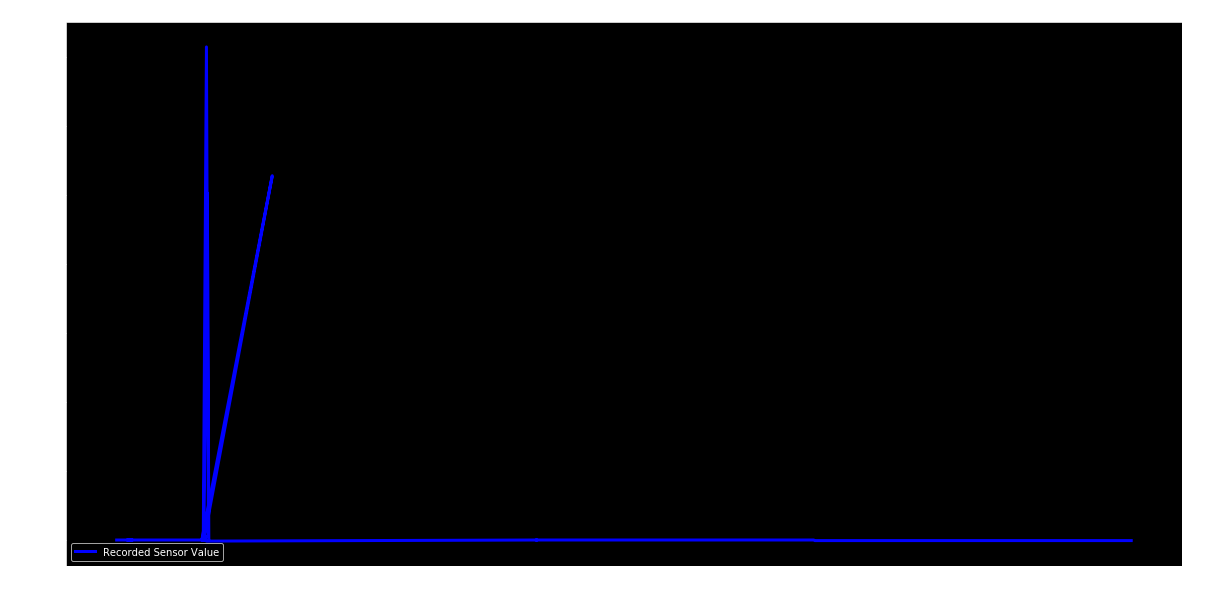

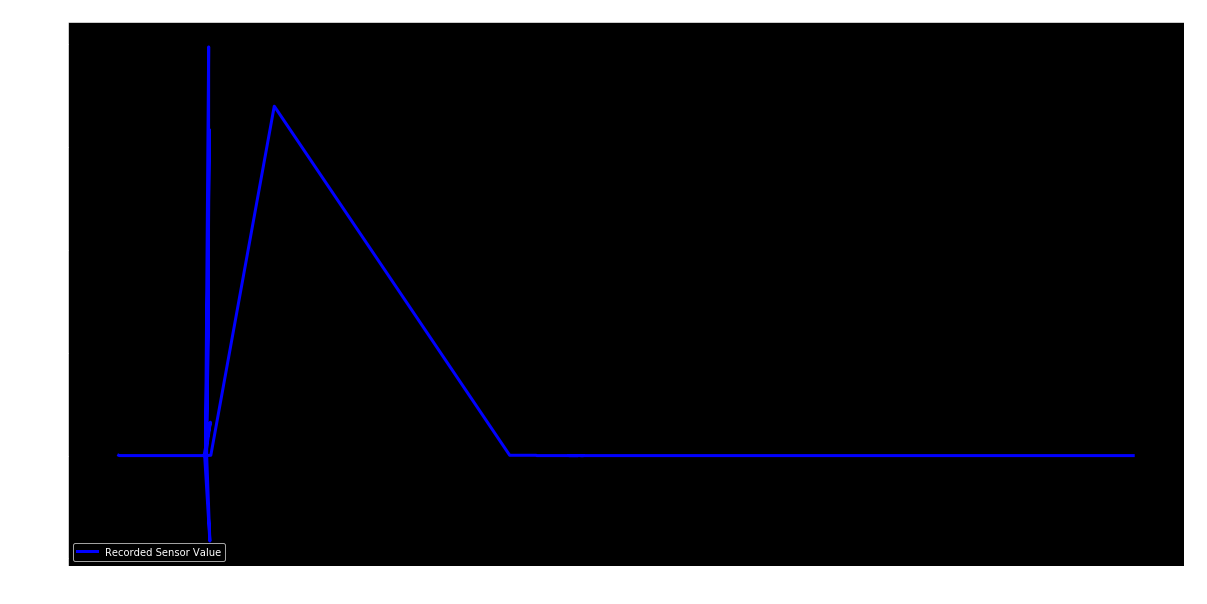

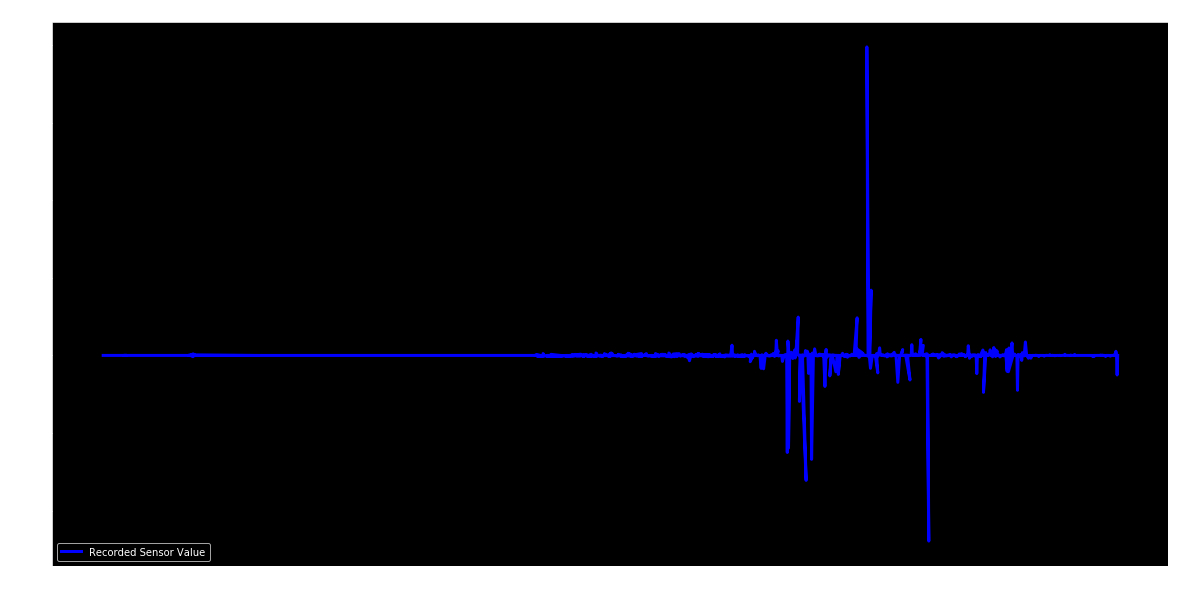

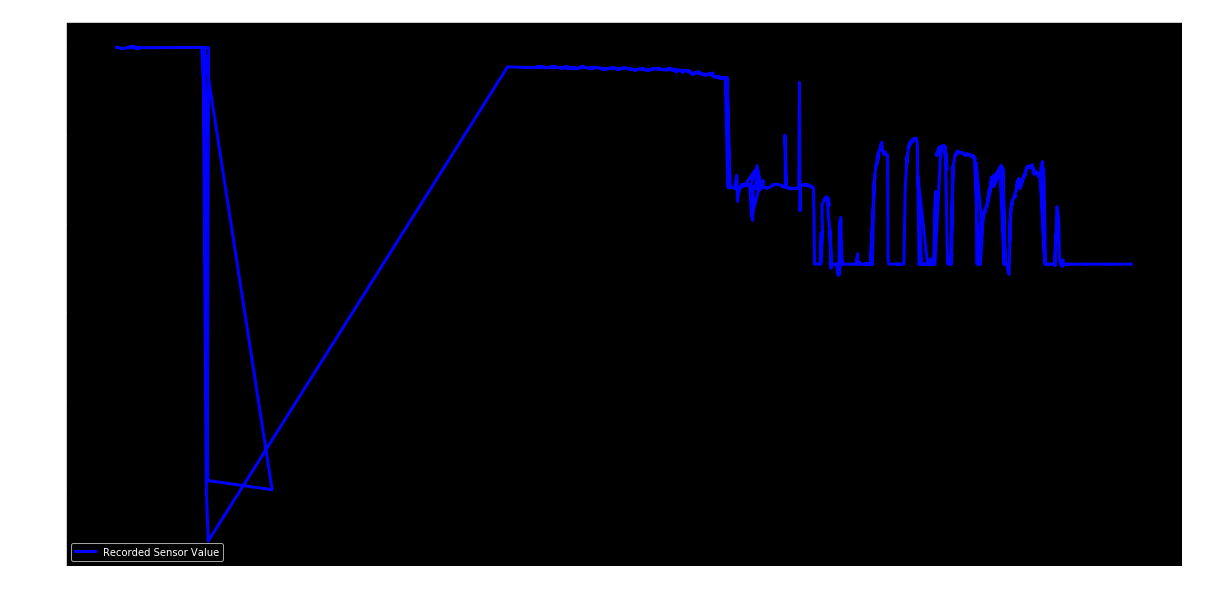

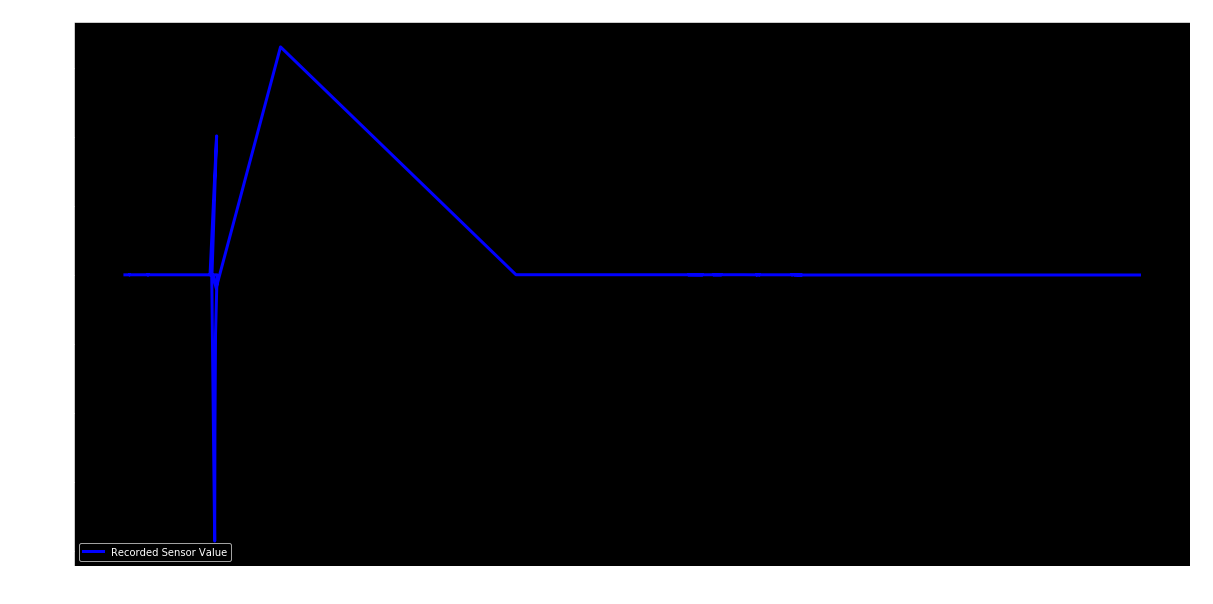

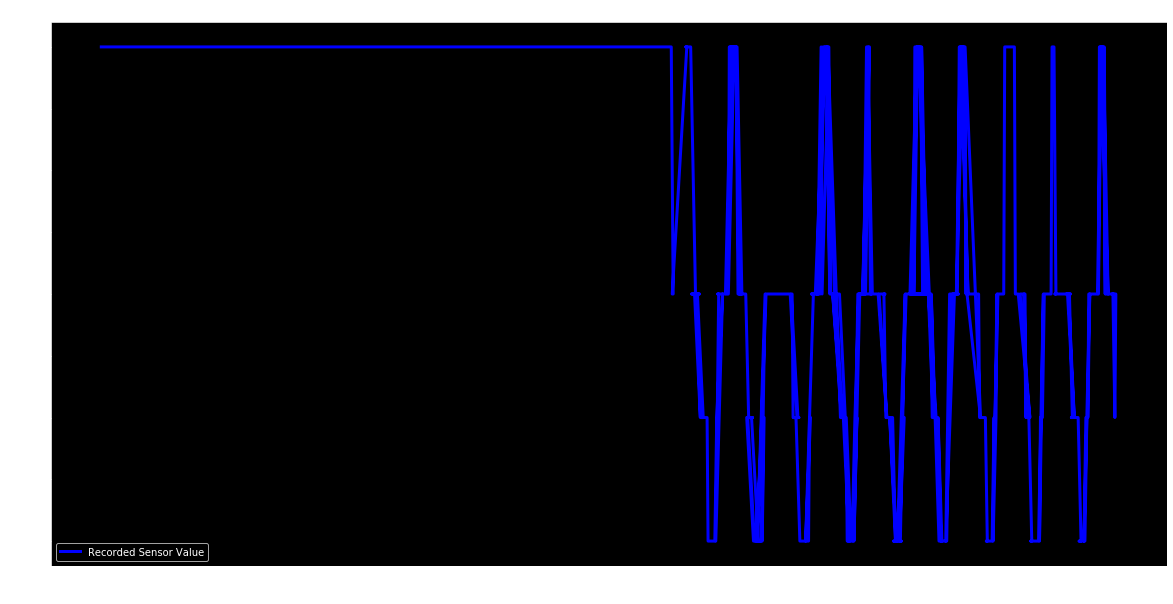

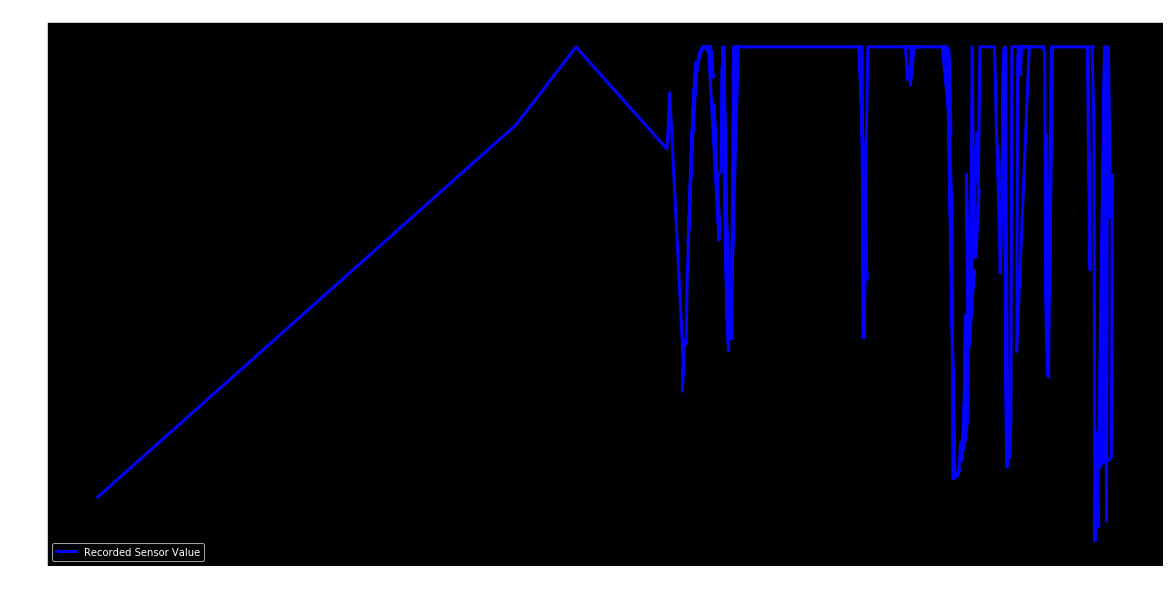

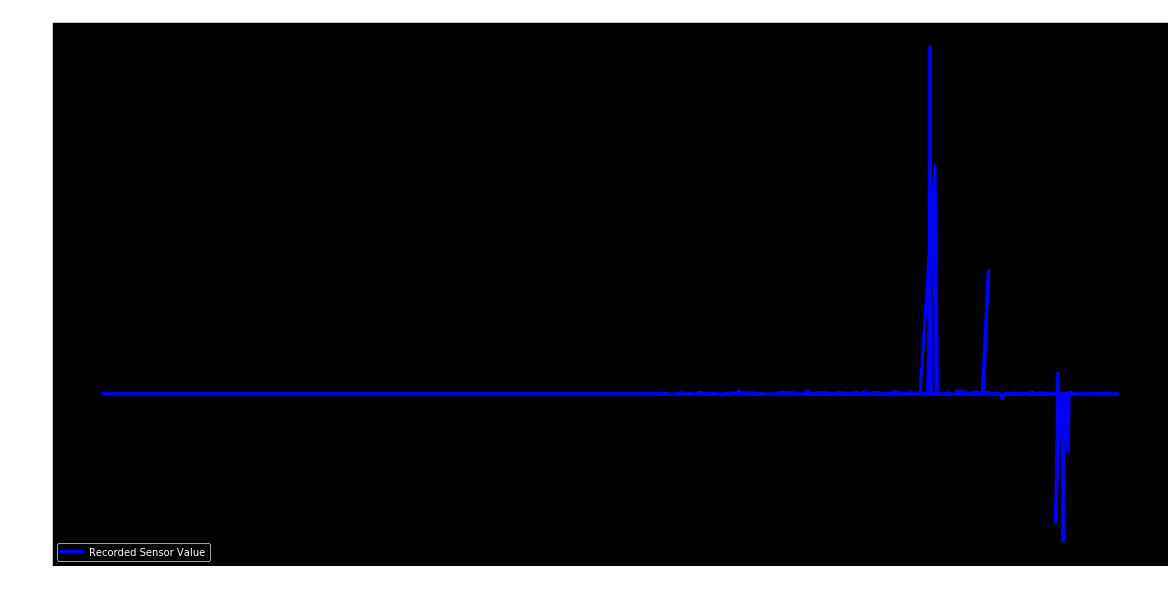

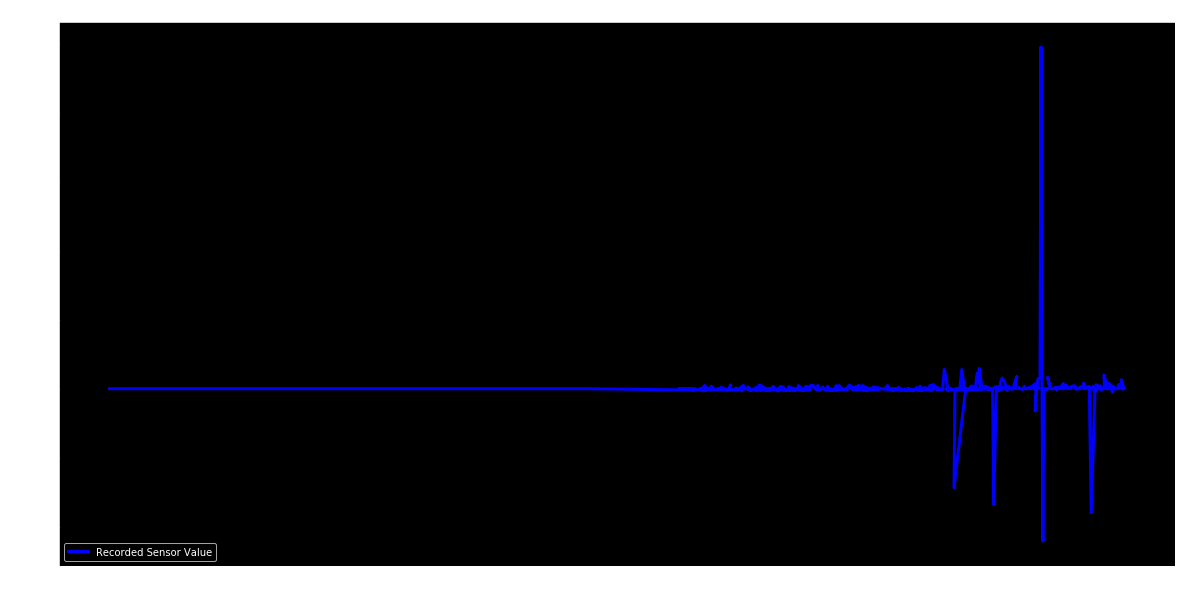

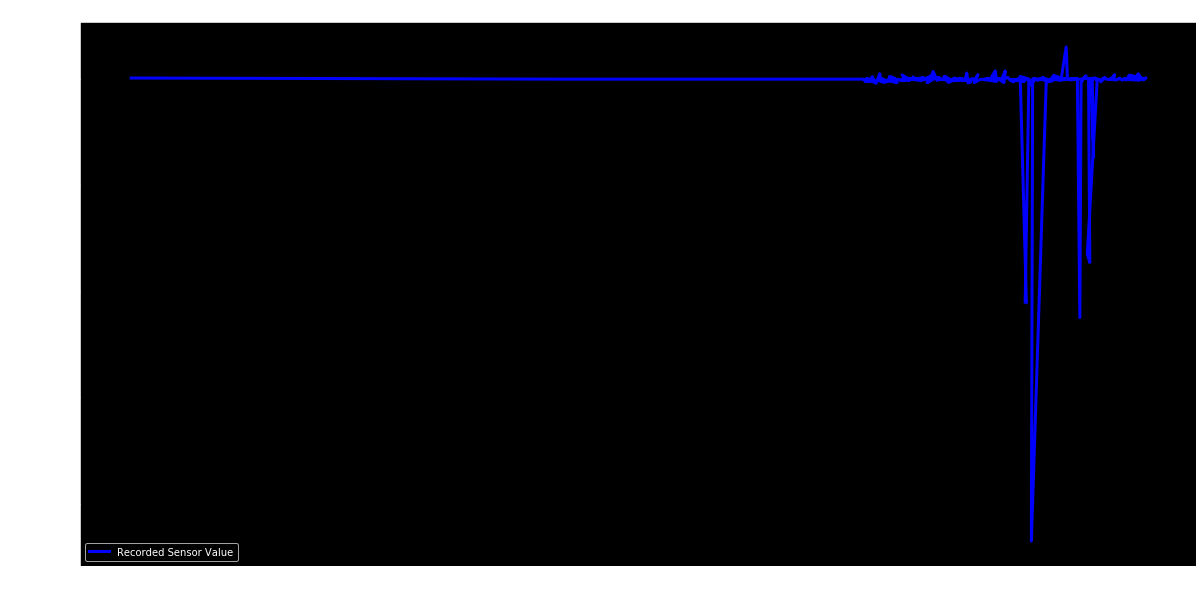

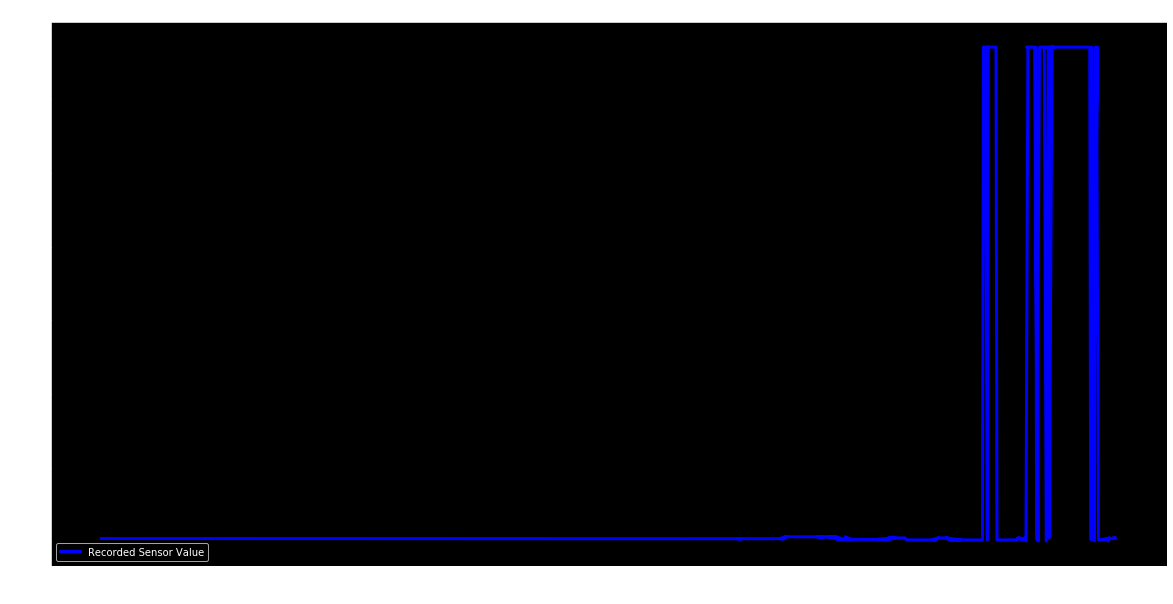

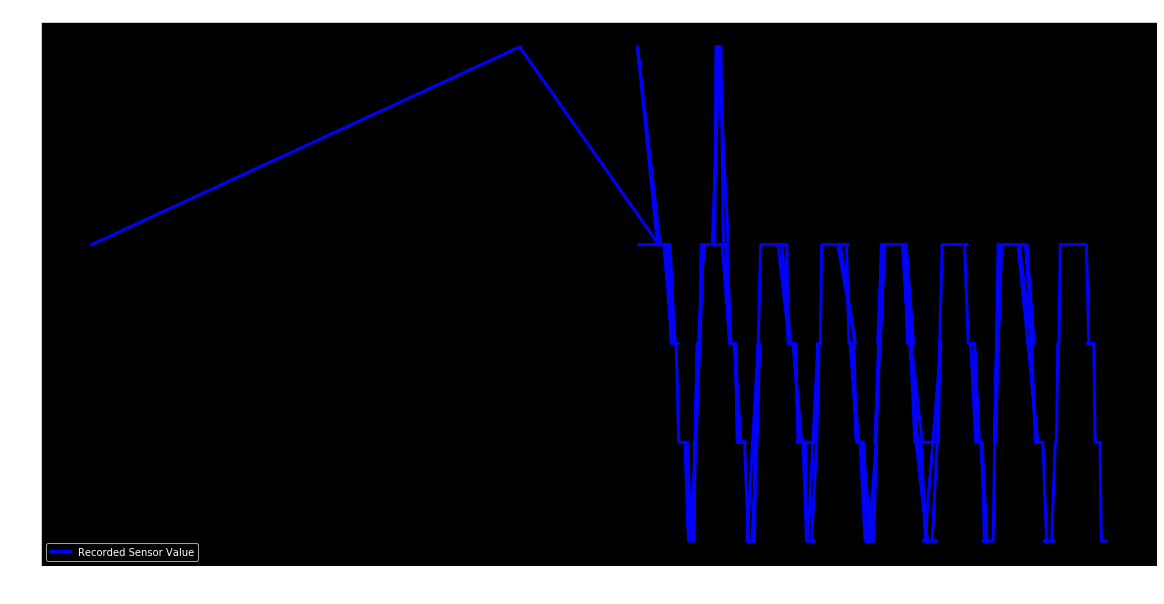

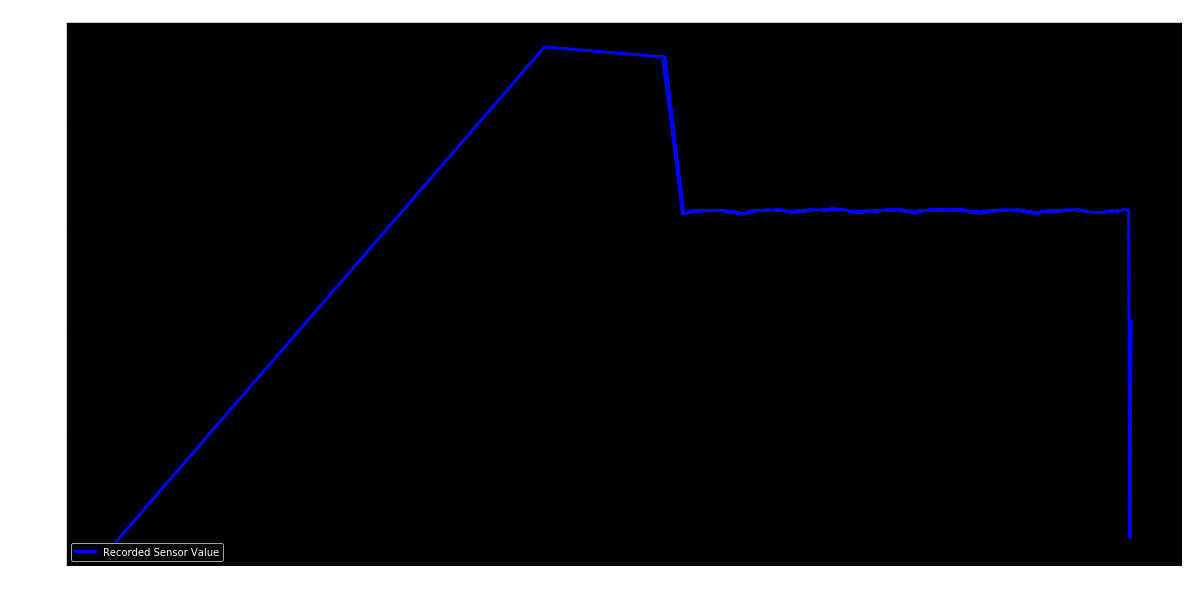

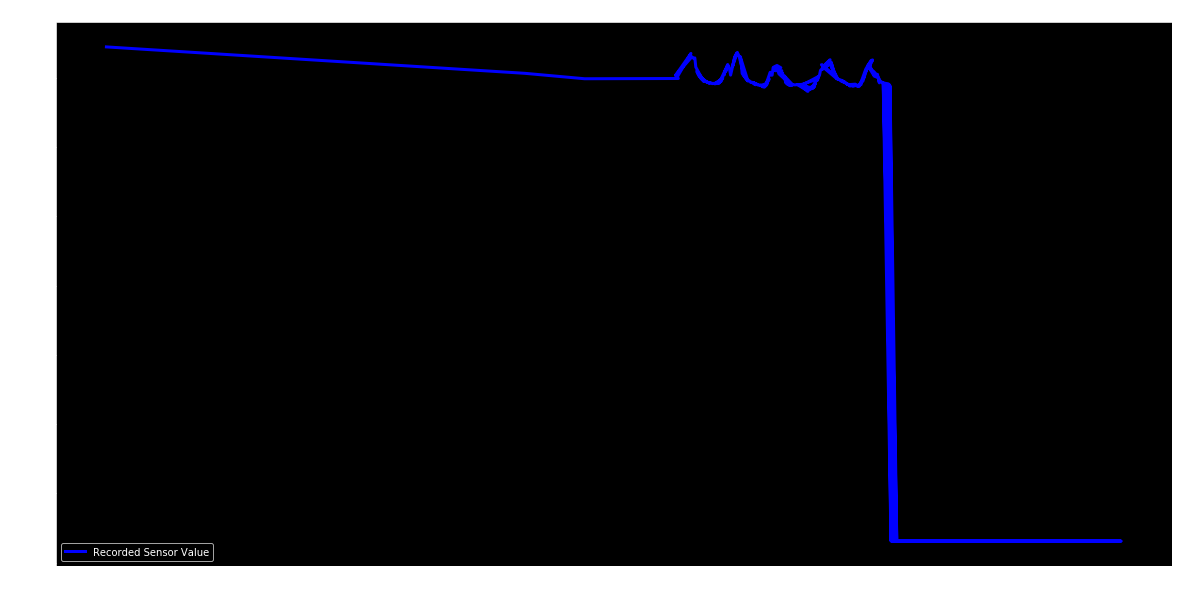

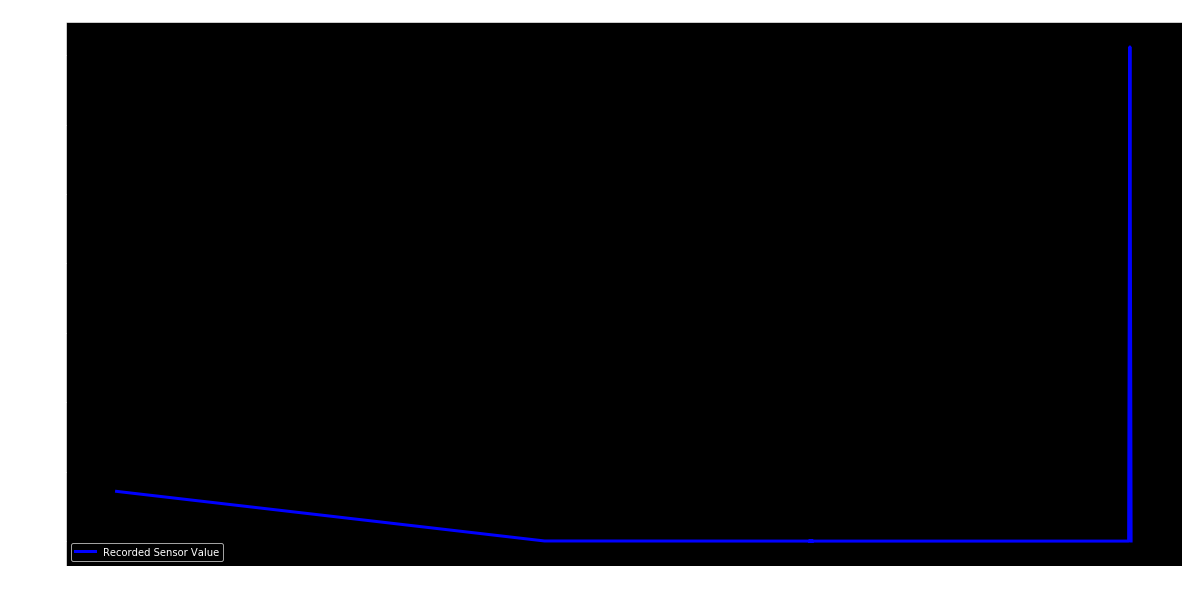

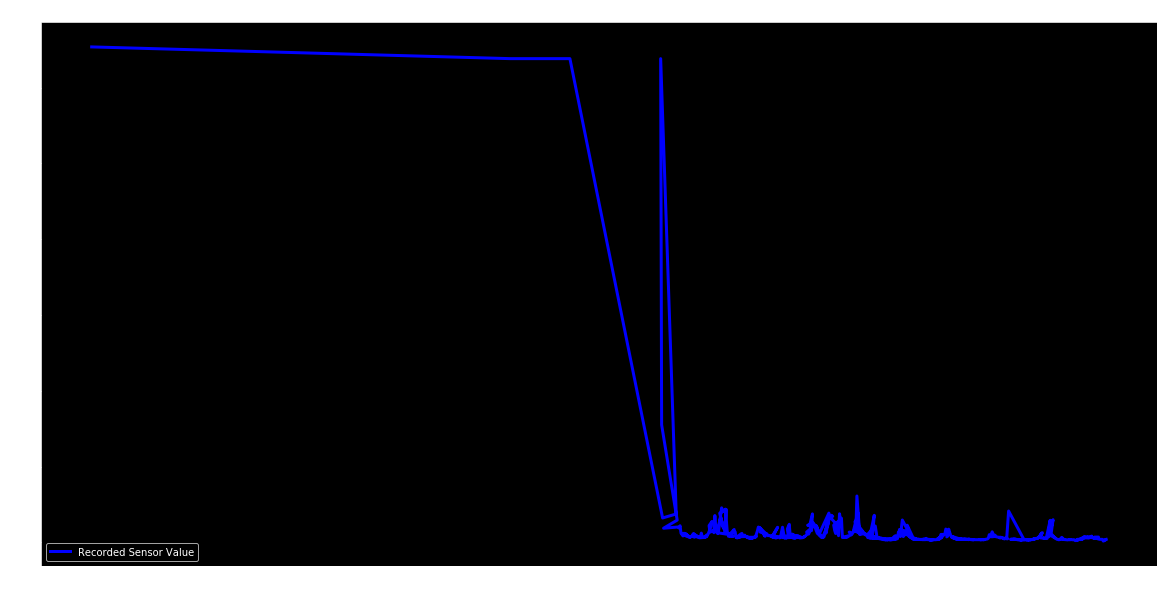

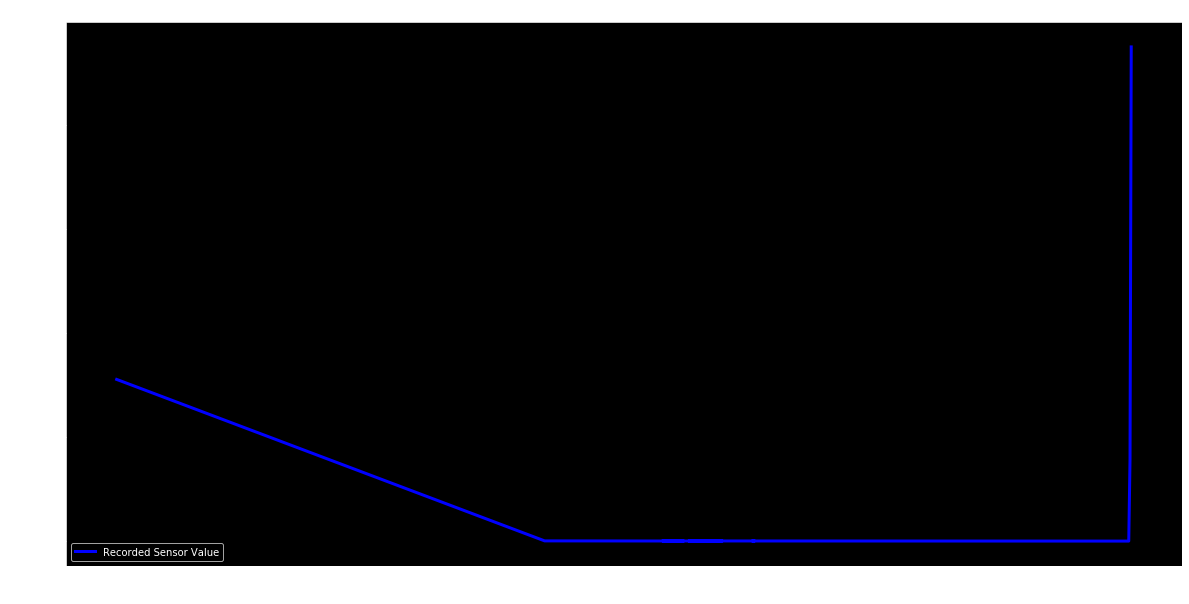

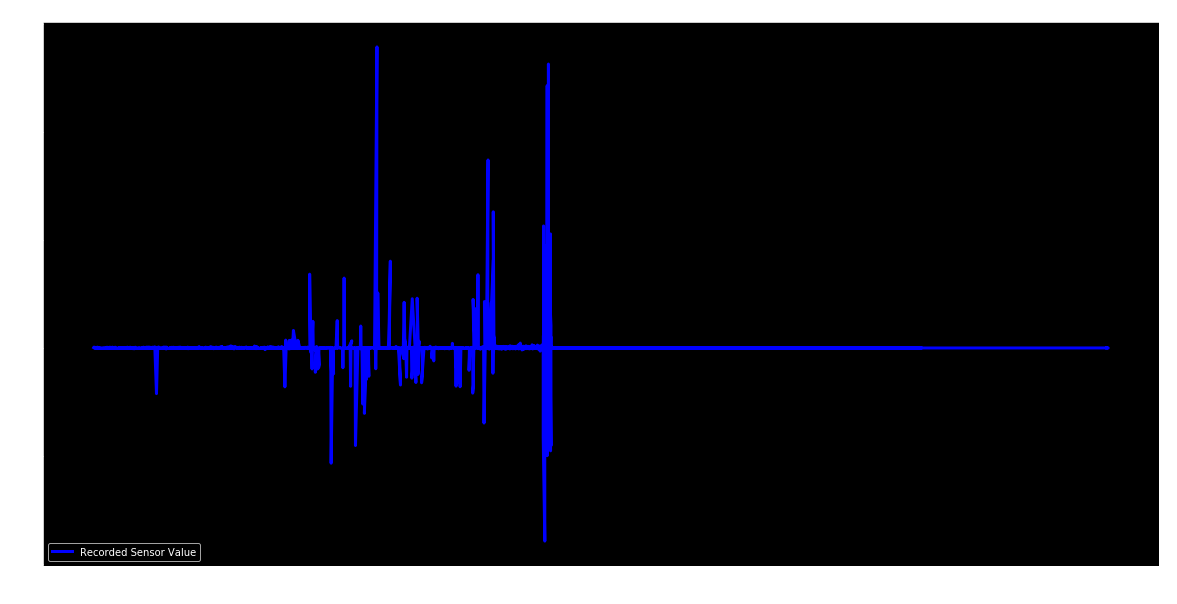

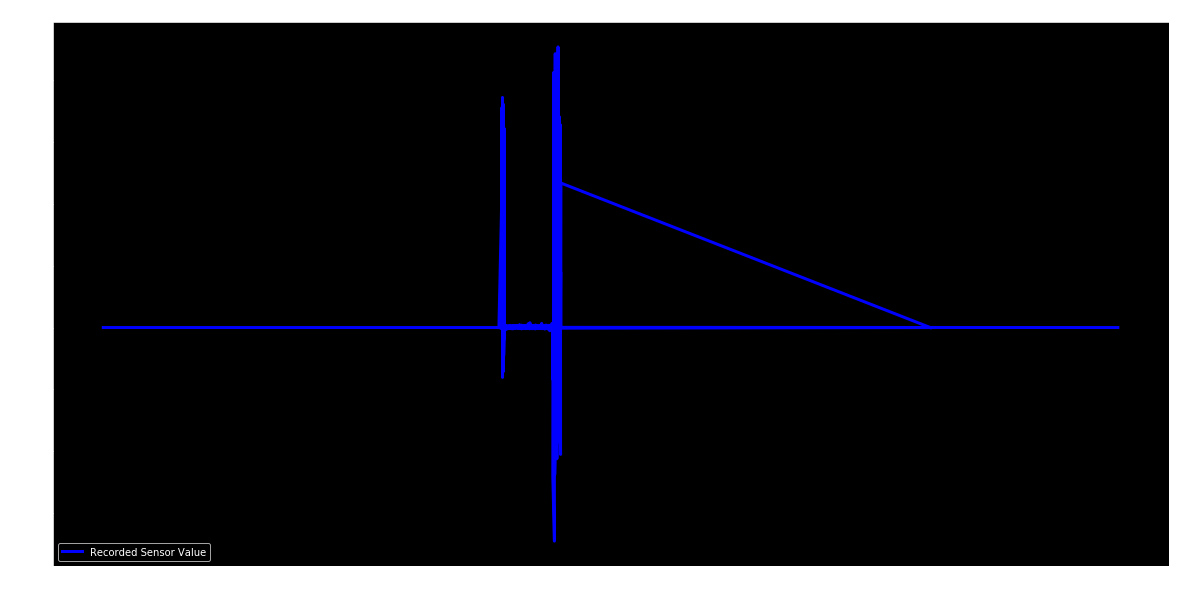

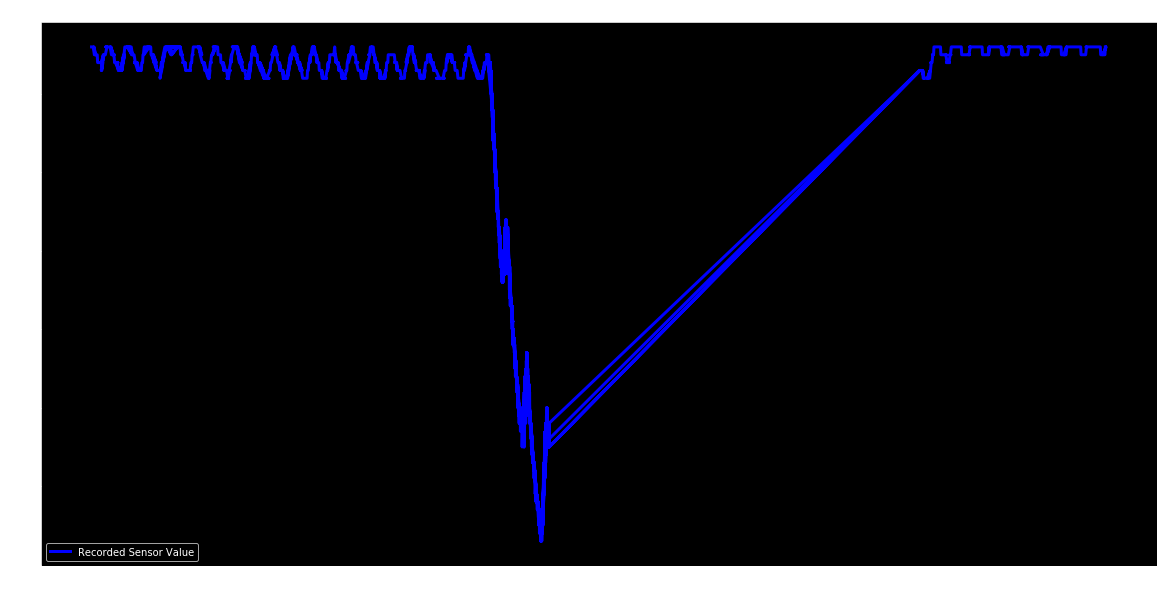

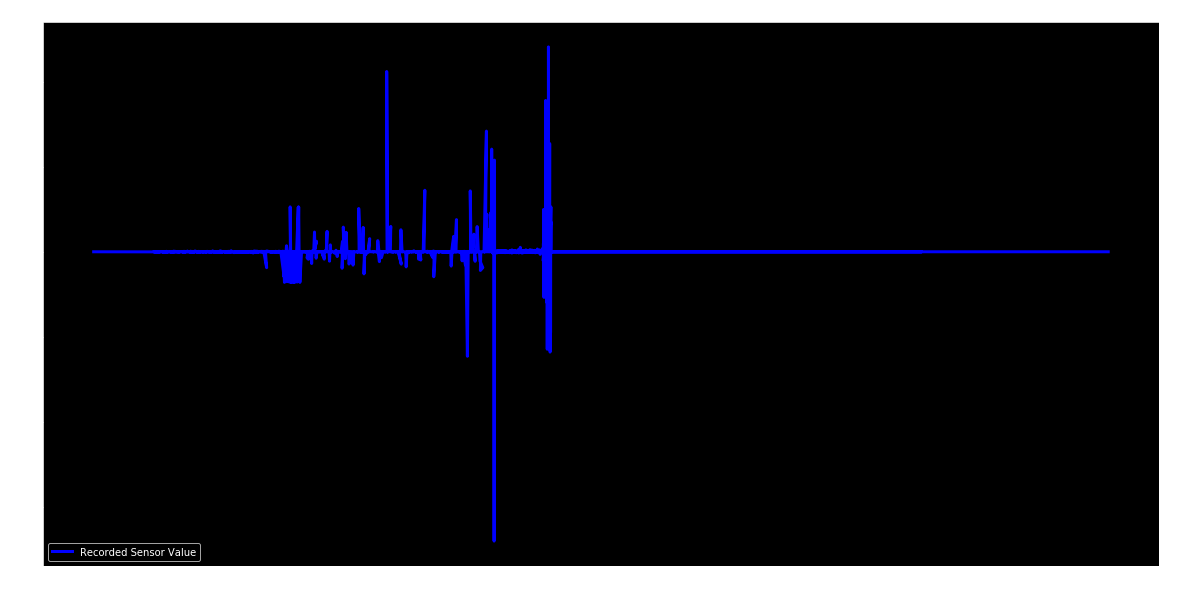

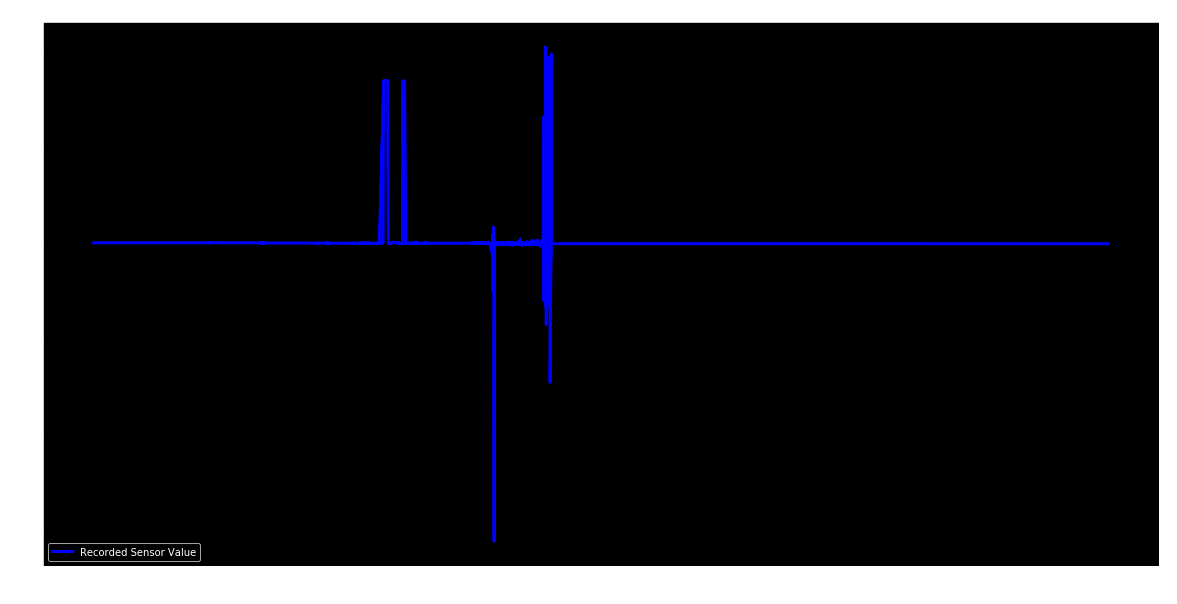

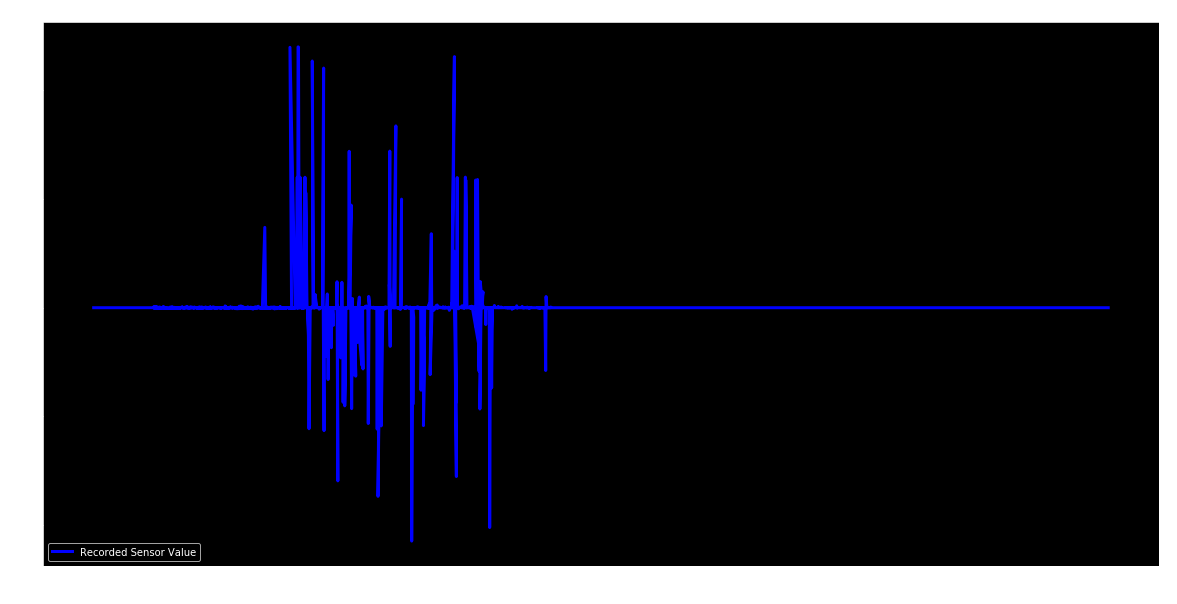

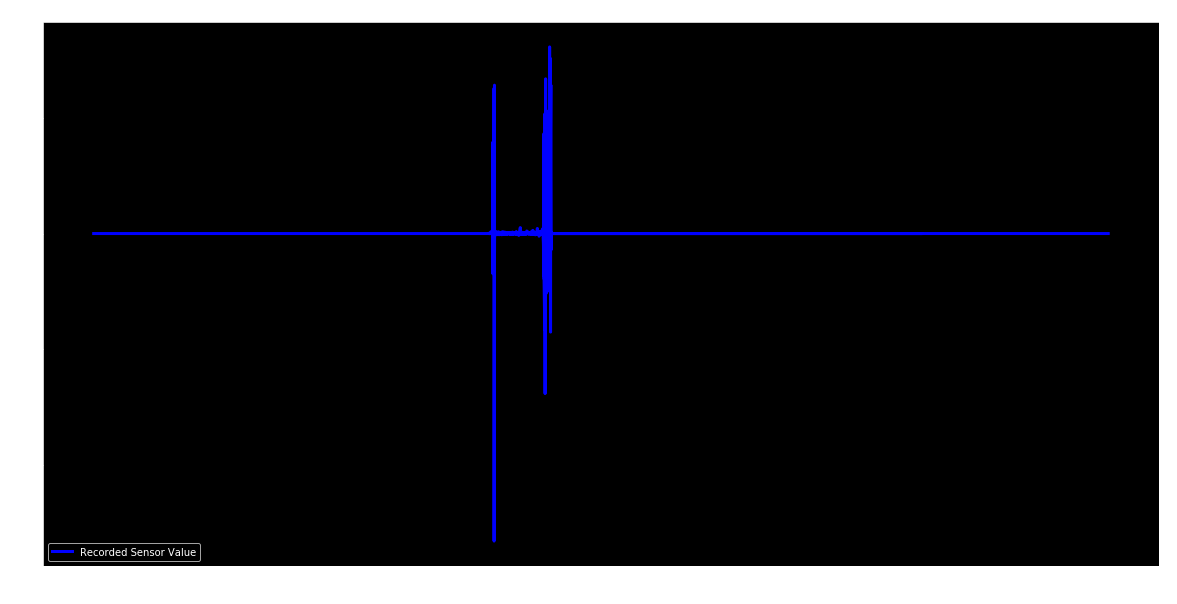

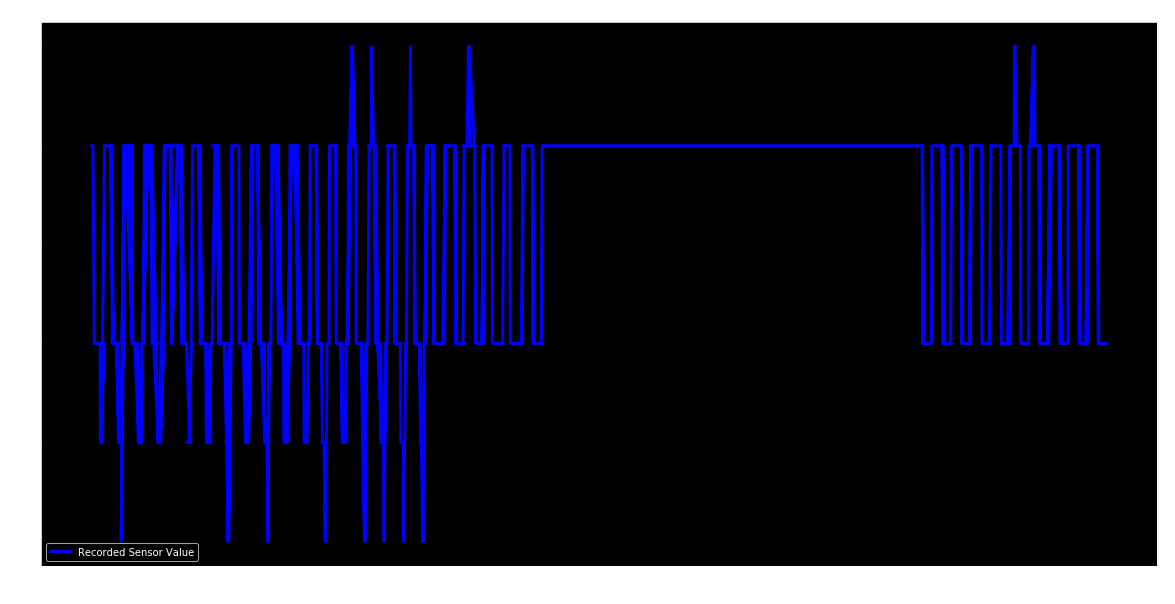

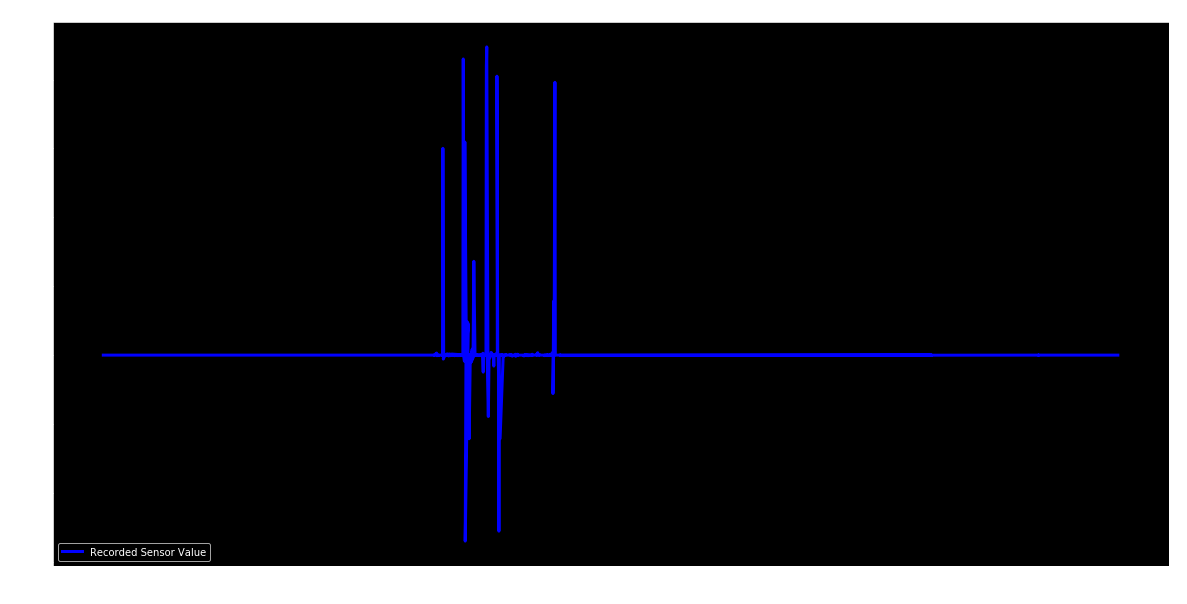

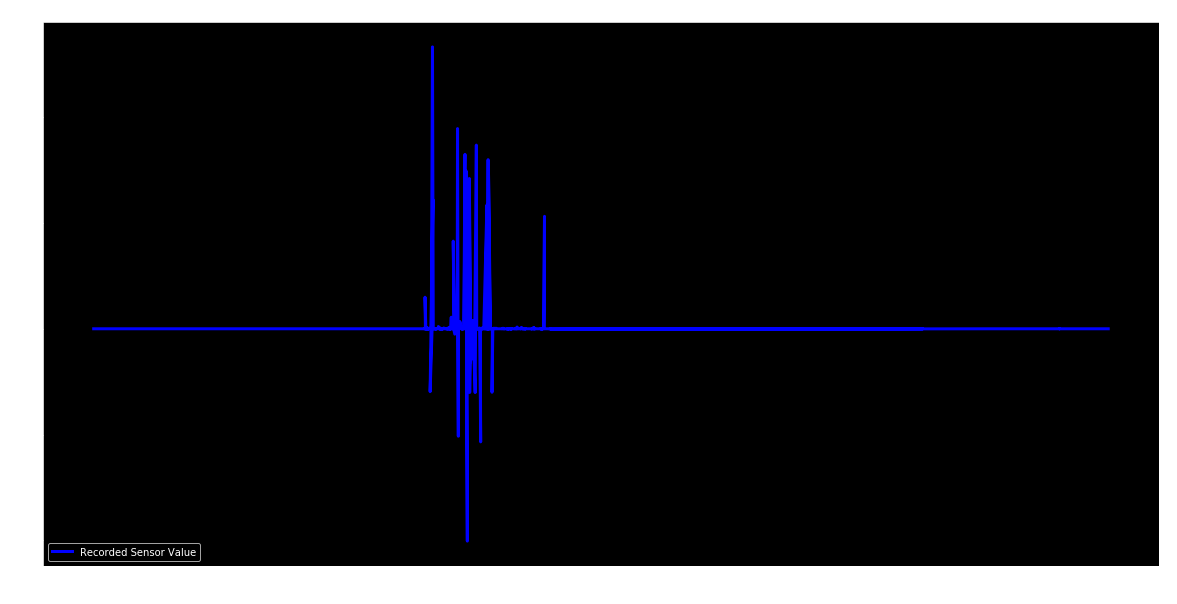

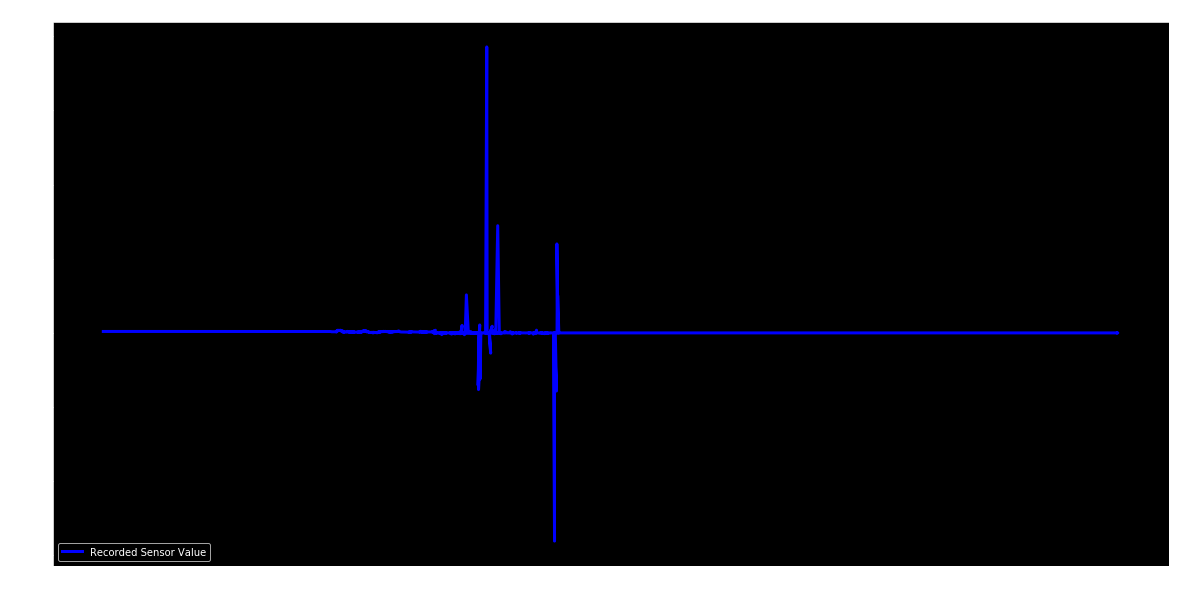

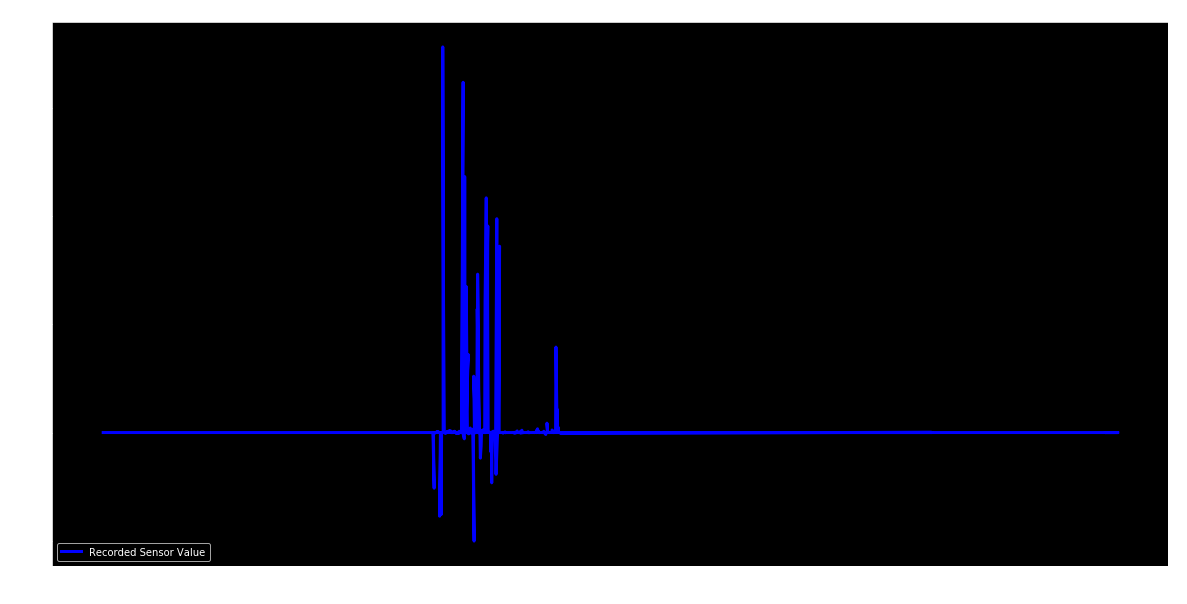

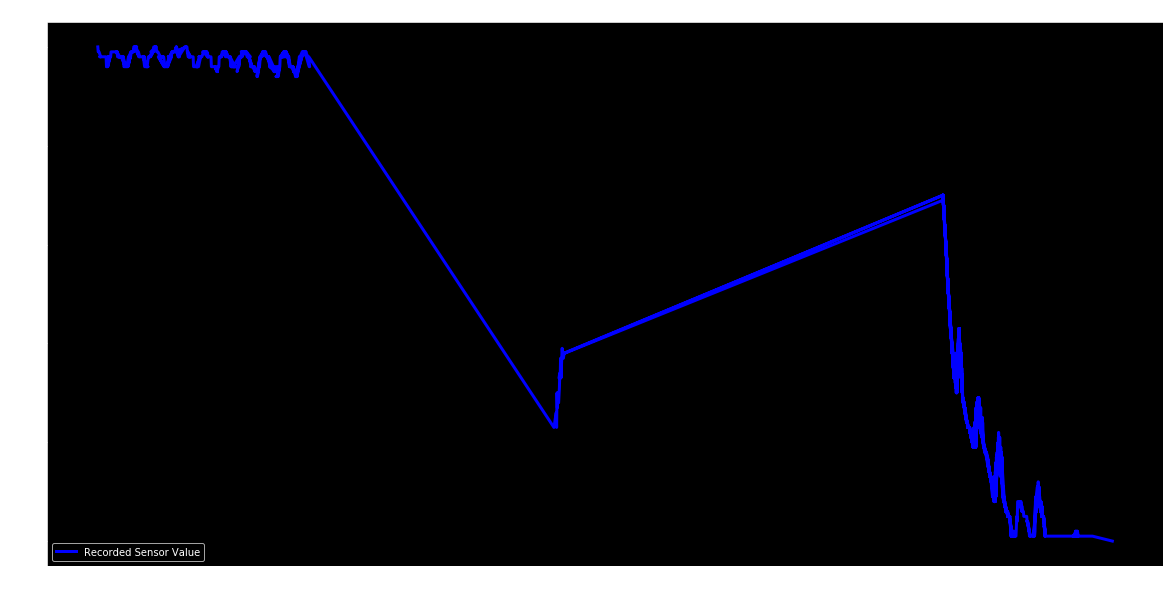

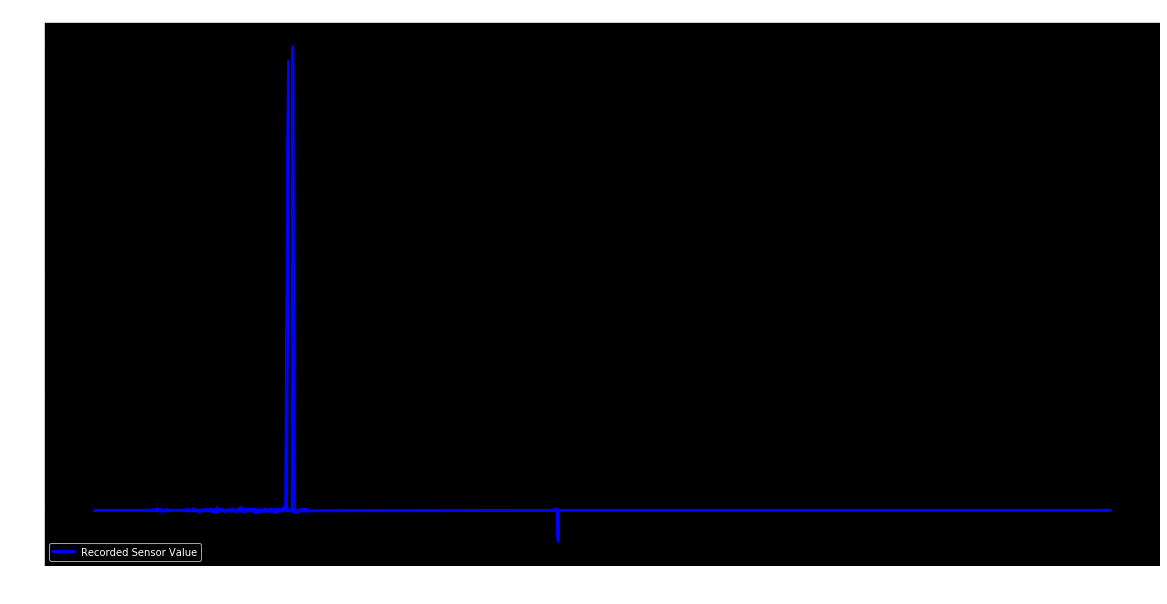

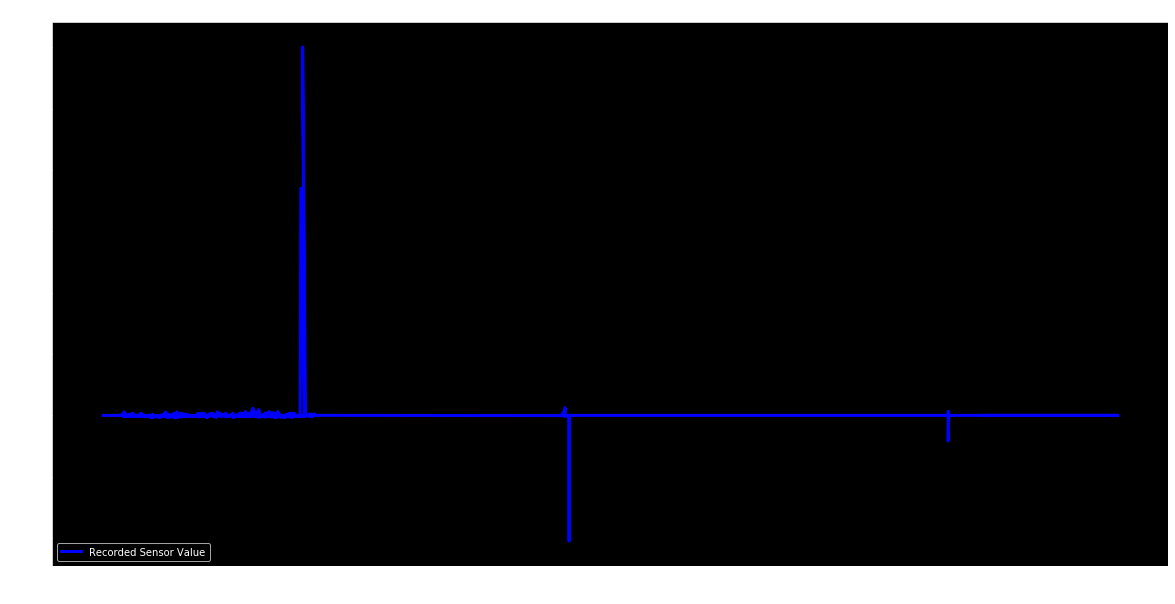

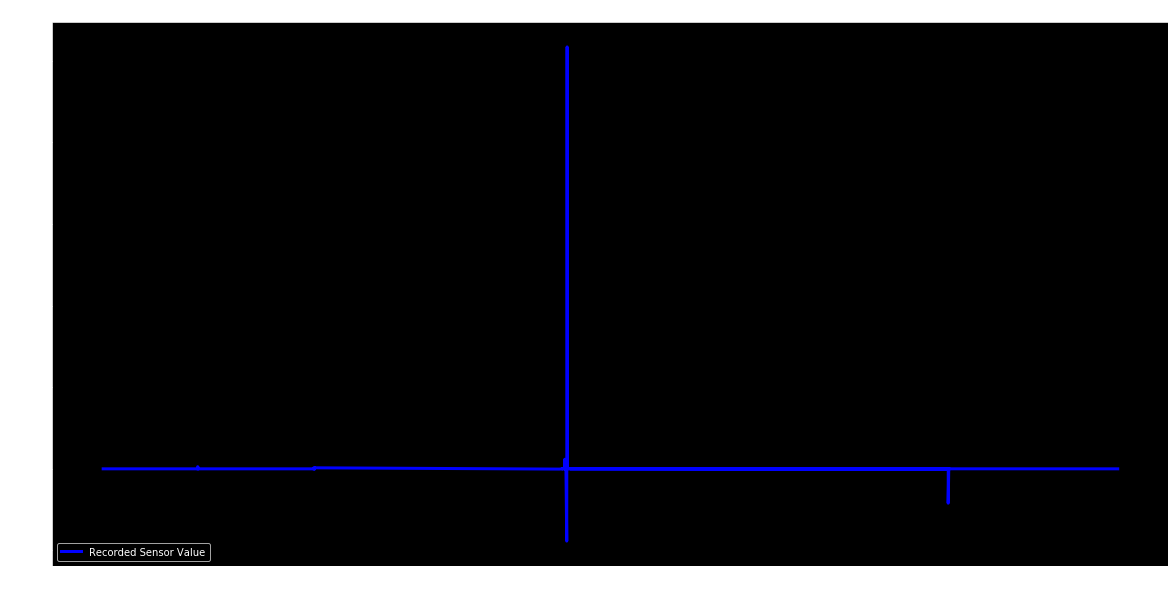

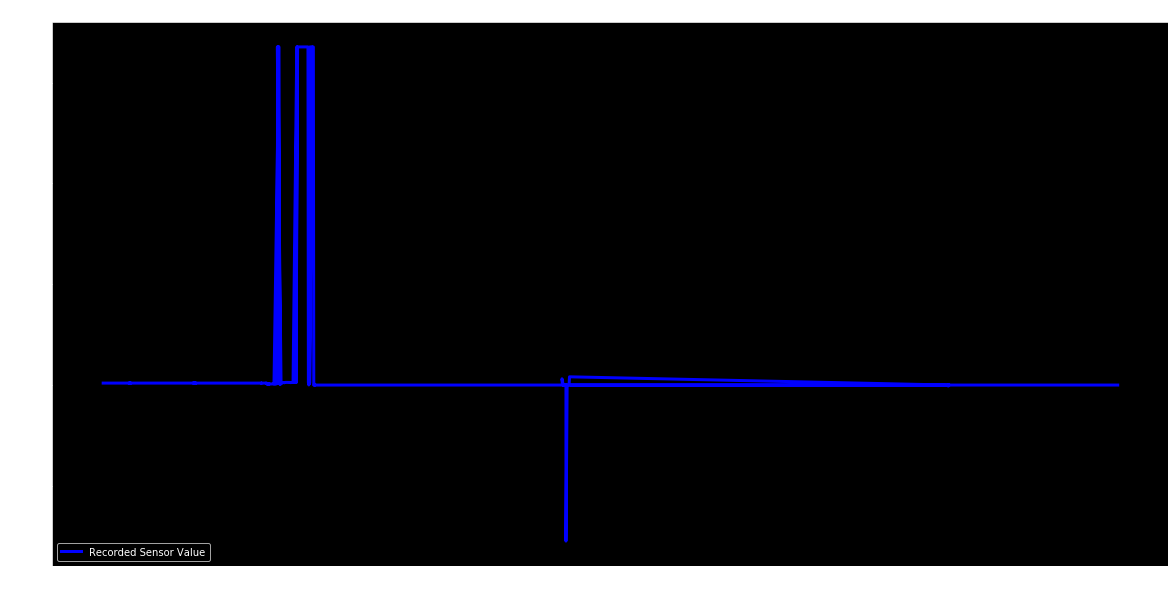

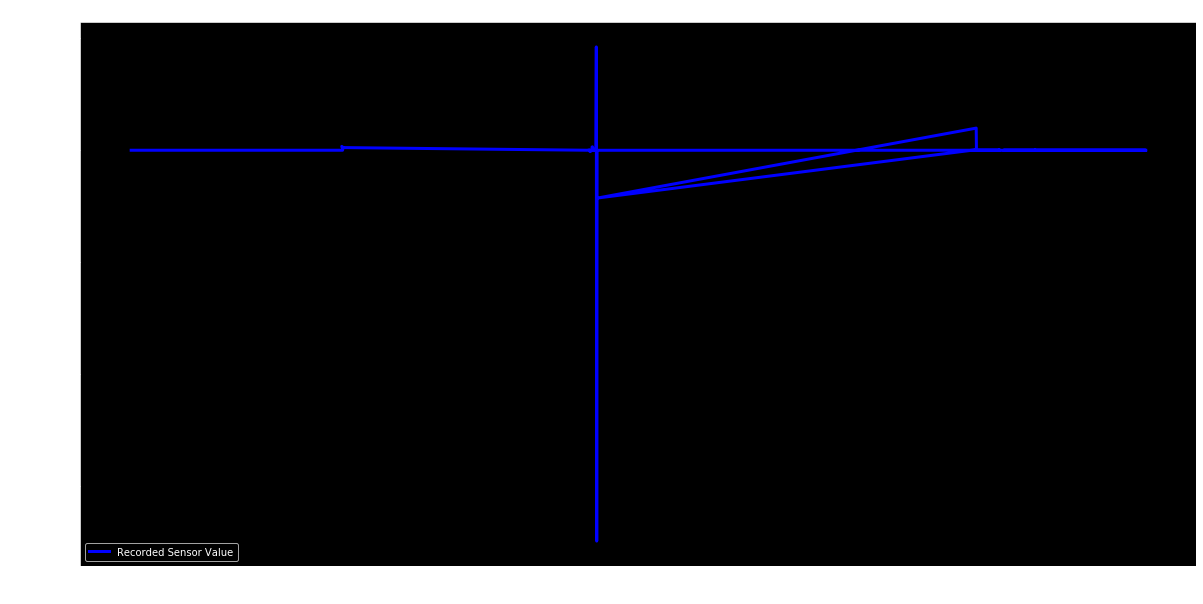

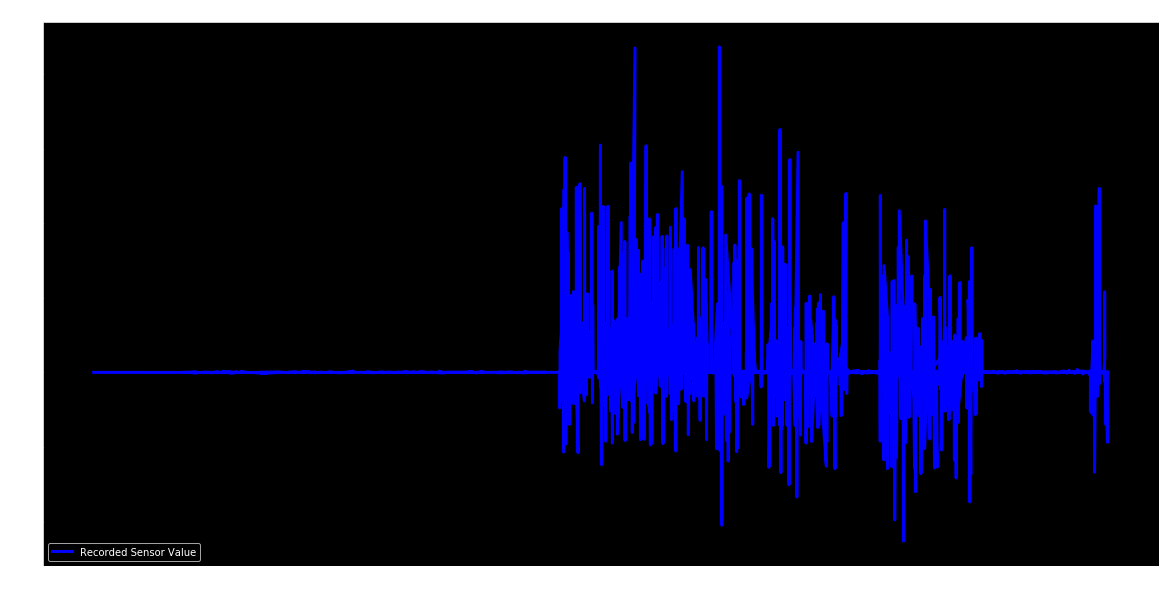

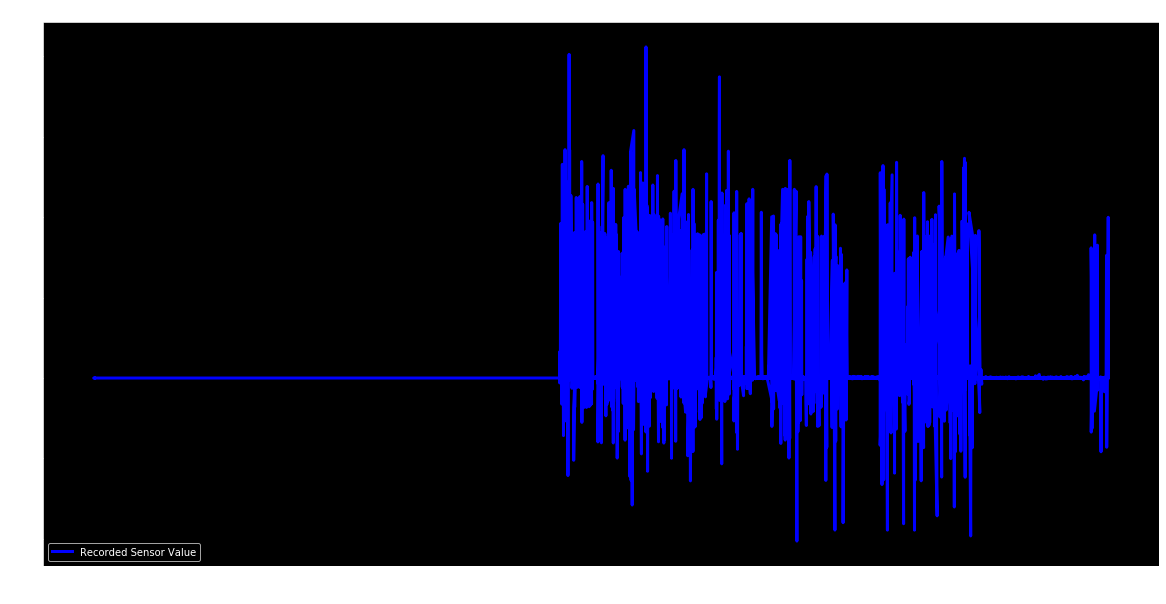

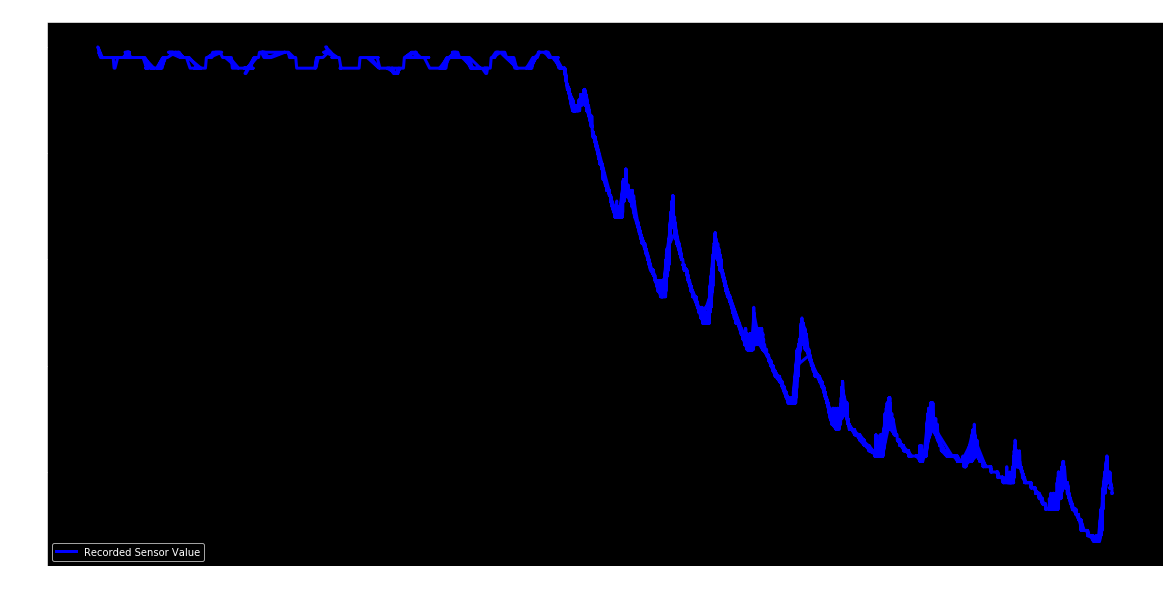

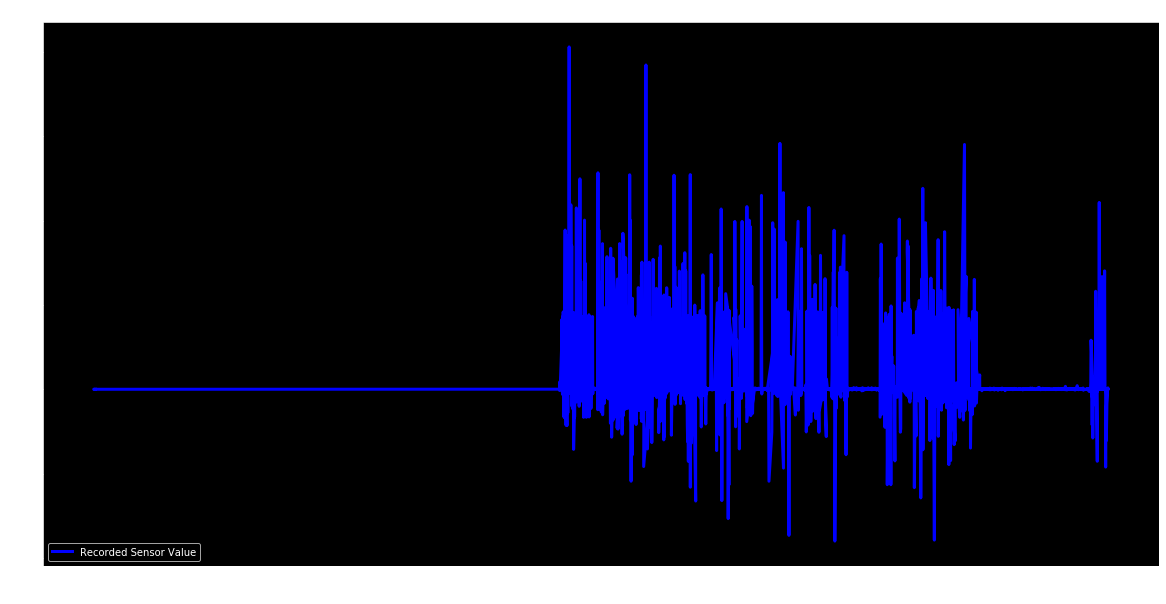

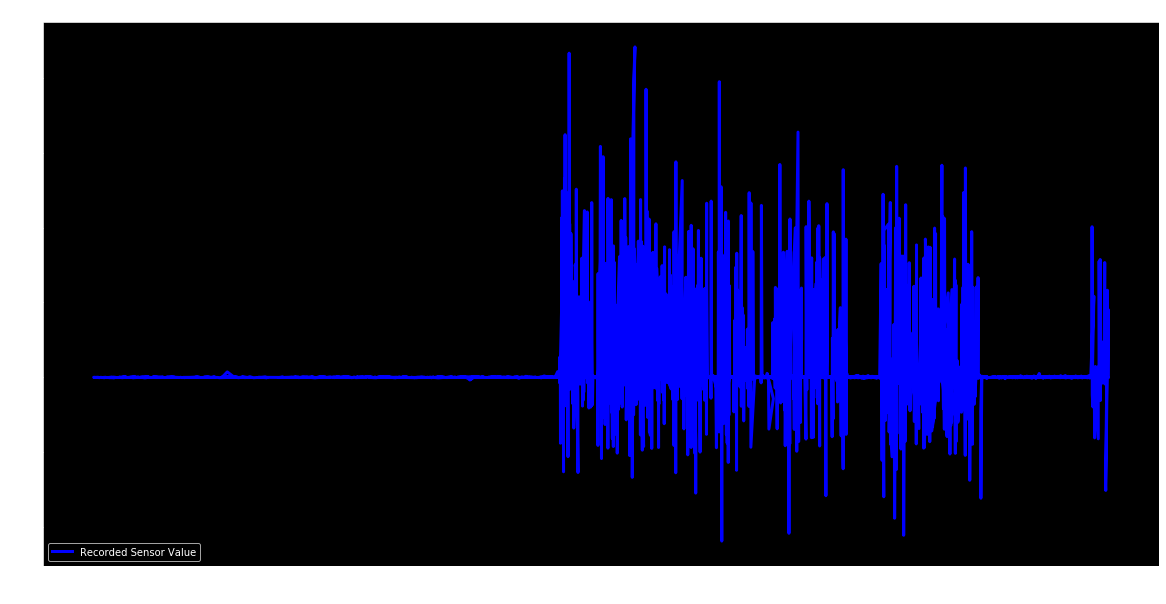

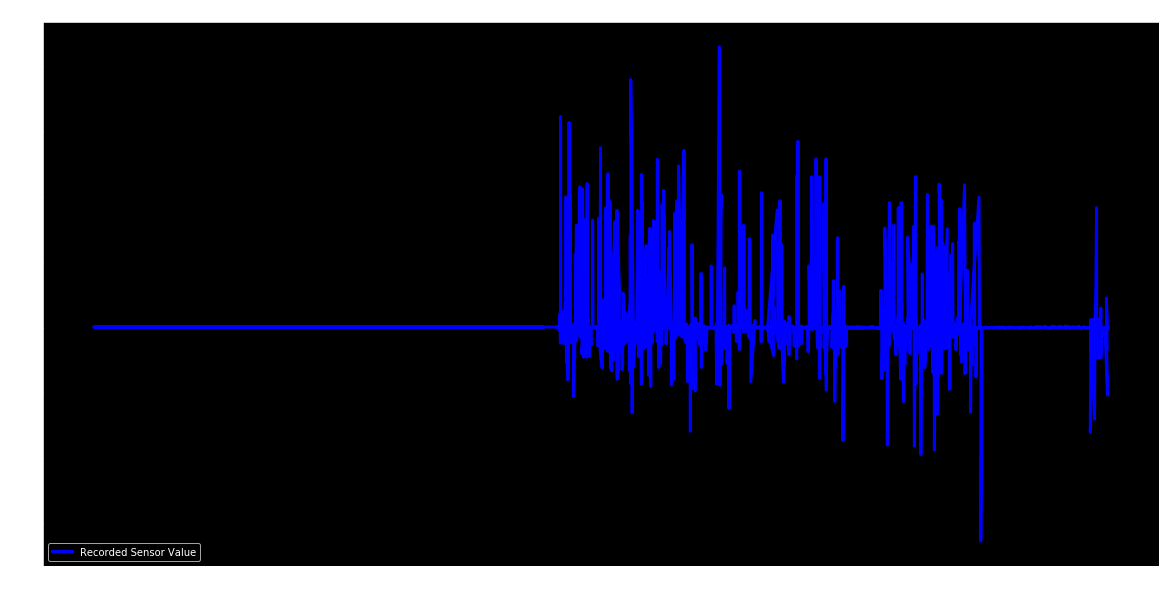

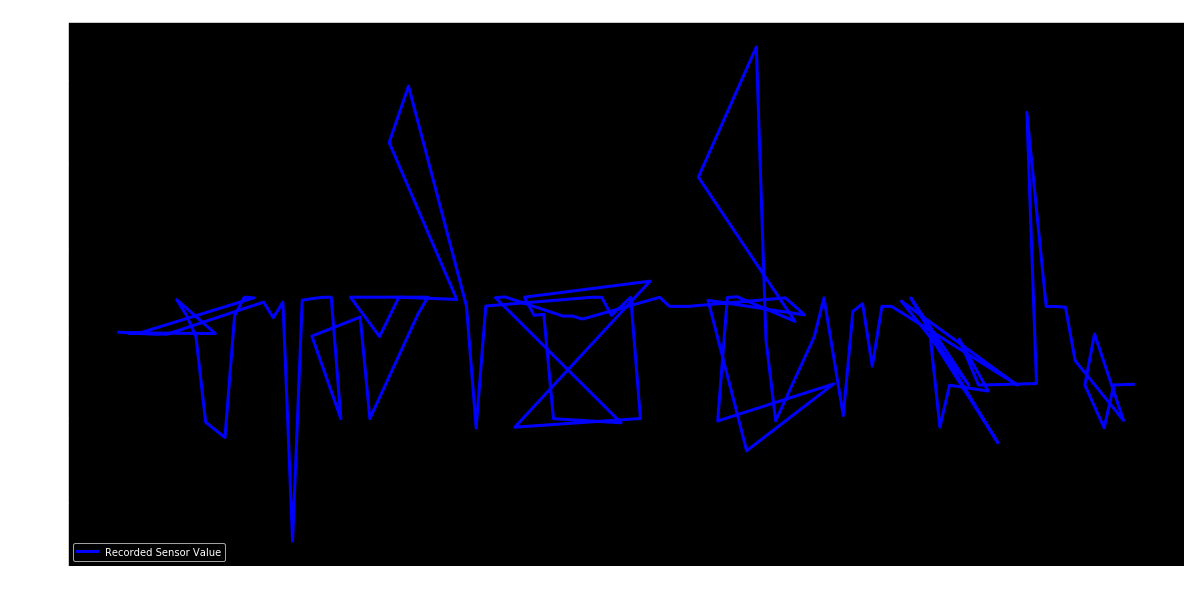

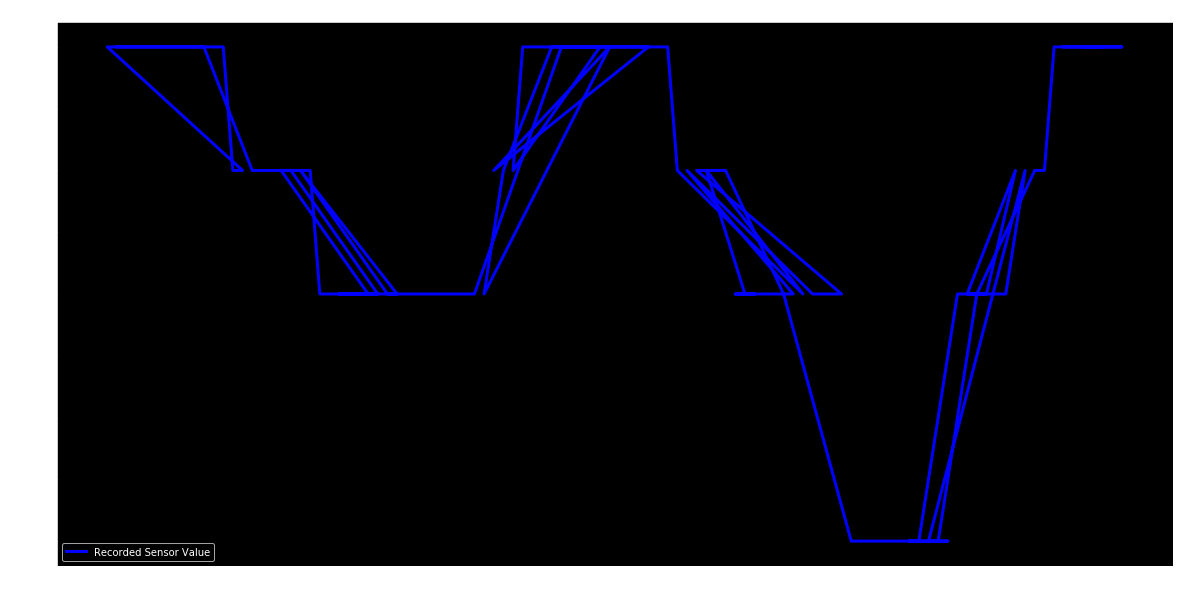

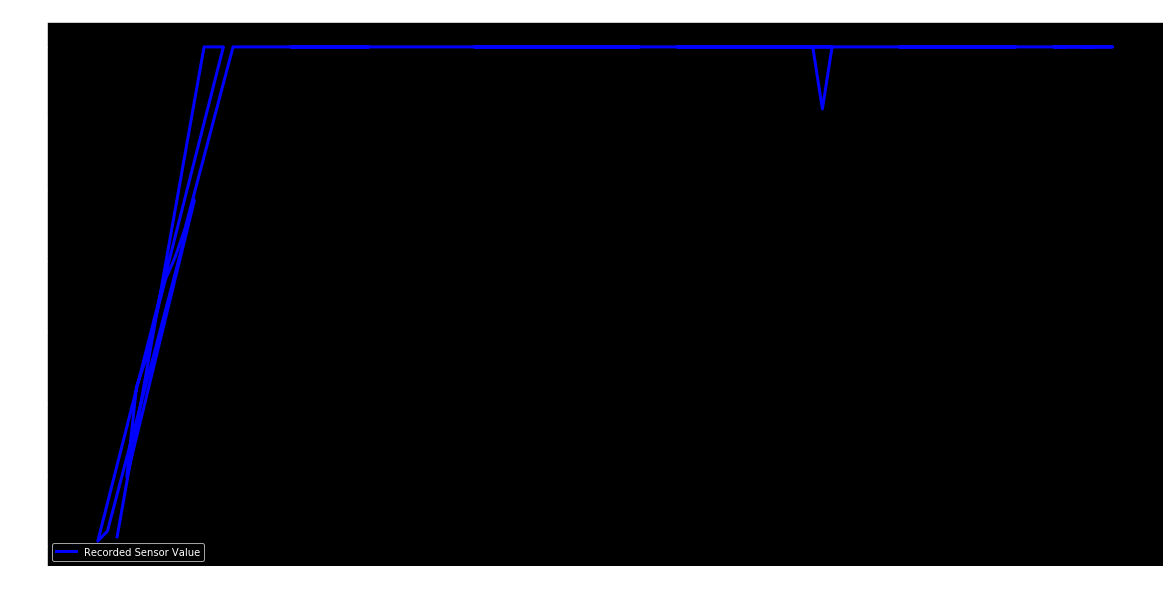

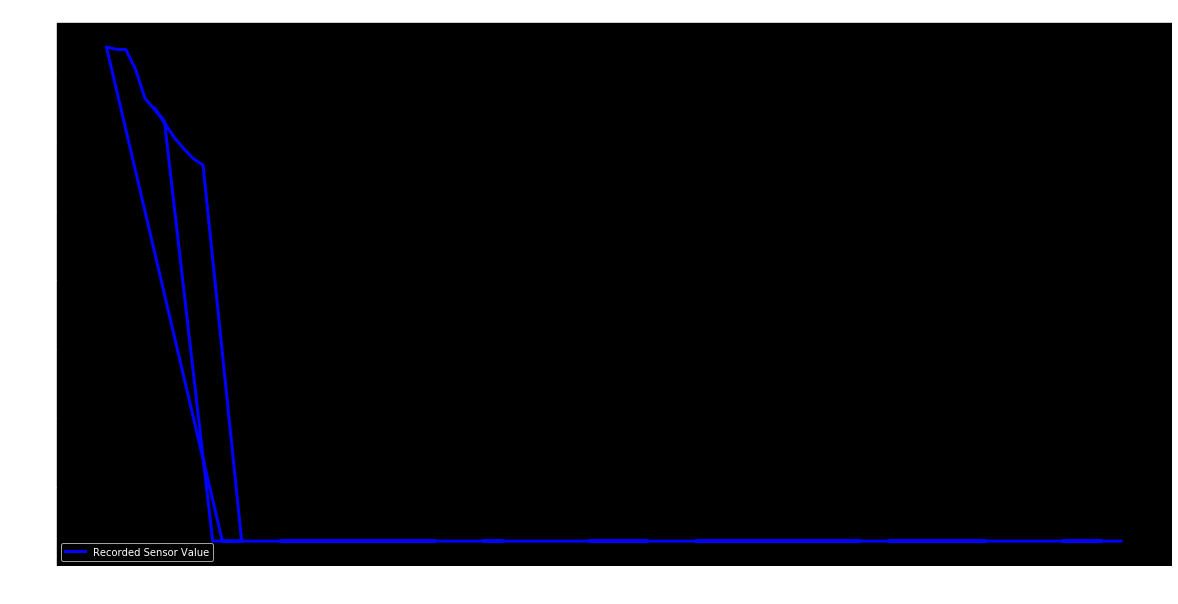

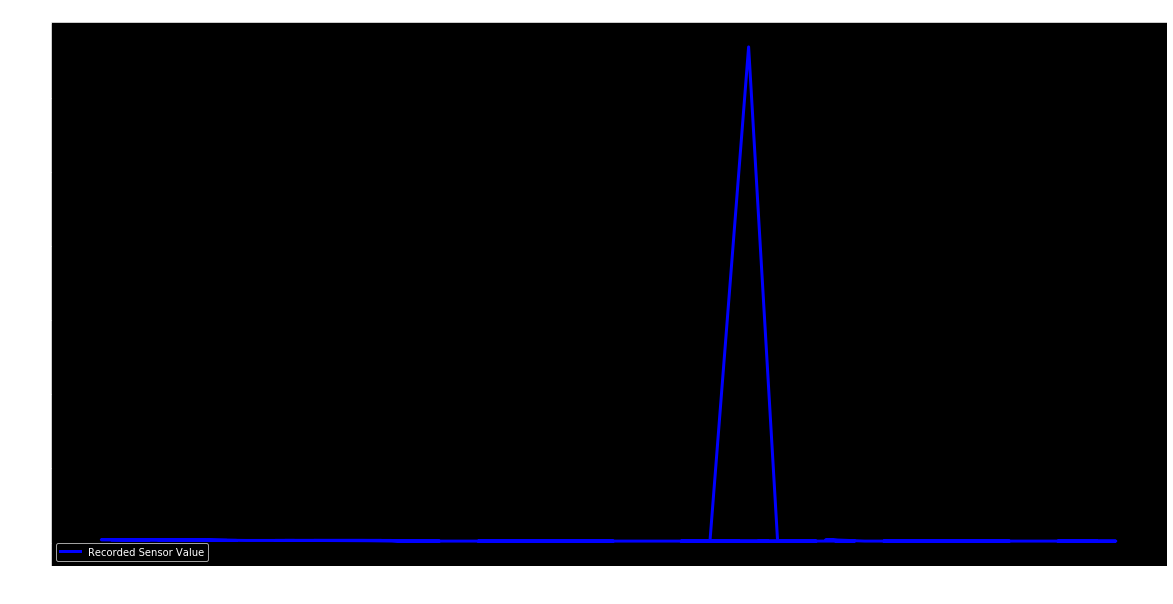

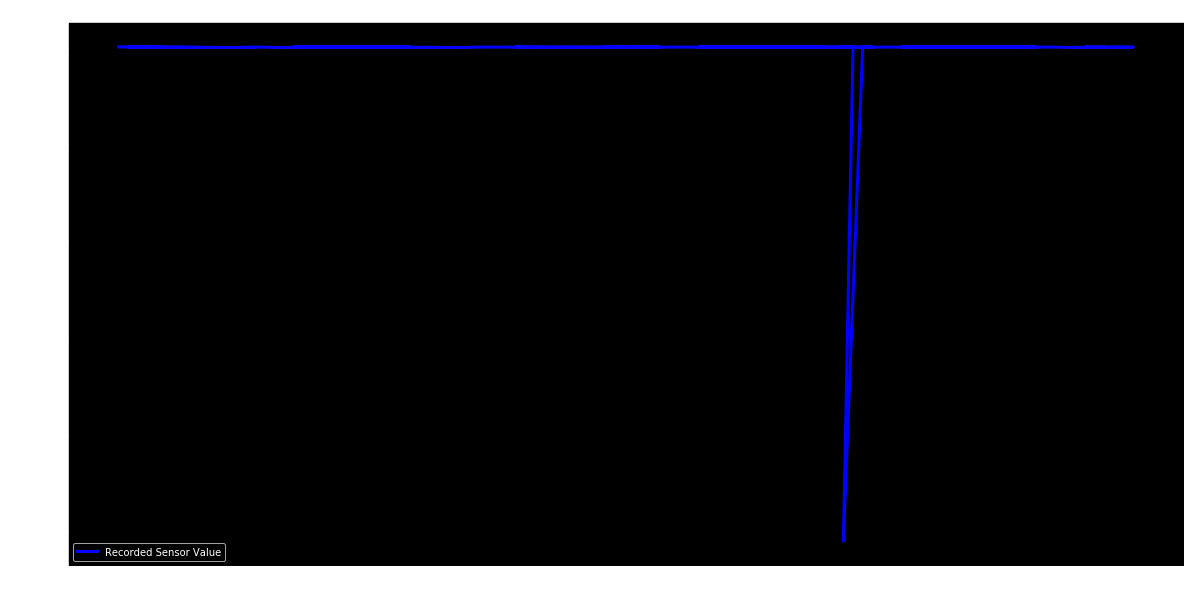

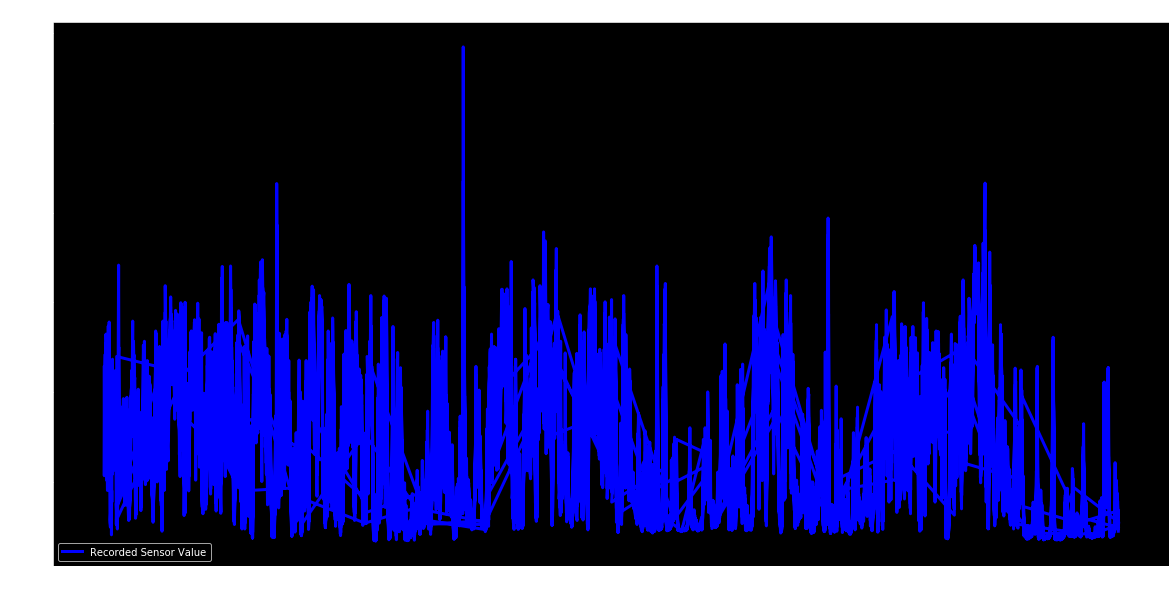

In [63]:
count = 0

#for a in range(len(sensor_list[0:4])):
for a in range(len(sensor_list)):
    count += 1
    df_x = data_point['timestamp'].loc[data_point['sensor_id'] == sensor_list[a]]
    df_y = data_point['value'].loc[data_point['sensor_id'] == sensor_list[a]]
    
    # Make the plot
    plt.figure(figsize=(20, 10))
    plt.plot(df_x, df_y, linewidth=3, linestyle="-",
             color="blue", label=r"Recorded Sensor Value")
    plt.xlabel(r"Timestamp")
    plt.ylabel(r"Sensor Value")
    plt.title(f"Values obtained from Sensor: {count} '{sensor_list[a]}' over the recorded timespan")
    
    plt.legend(loc="lower left")
        
    plt.savefig(f'summ1_image/Sensor: {count} Time Plot.png', format='png', transparent=False);

### 3.0 Descriptive Analysis One data frame at a time **

3.1: How many sensors of each type are there?

In [64]:
#s2.type_id.value_counts()
data_sensor.data_type_id.value_counts()

35dcdad2-8679-11e6-bda3-ef77801087ee    10
35dcb3c2-8679-11e6-bda3-ef77801087ee    10
35dcb3c0-8679-11e6-bda3-ef77801087ee    10
35dcb3c1-8679-11e6-bda3-ef77801087ee    10
35dcdad1-8679-11e6-bda3-ef77801087ee    10
35dcdad0-8679-11e6-bda3-ef77801087ee    10
ed5edee0-e701-11e6-83c1-01ce06e6d17f     1
Name: data_type_id, dtype: int64

From the result above, it can be seen that there are ten sensors each for temperature, pressure, humidity, carbon dioxide concentration, hydrogen sulfide concentration, and battery. Also, there is only one sensor for the RSAM sensor type.

----

### 4.0 Creating a Digital Thread from the data sets**

**Goal: Merge everything into one wide data table ** 

You have two data frames: `sensors` and `types` Merge each sensors with its type. (Hint: Use `pd.merge()`)

Question: What does this achieve? Why should we do this?

In [65]:
sensor_type = pd.merge(data_sensor, data_type, on = 'data_type_id')
sensor_type

,sensor_id,description,data_frequency,status,created_at,updated_at,data_type_id,node_id,type,si_unit,type_id
0,c15a6370-8679-11e6-a353-2f6c041e2491,\N,1800000,OFFLINE,2016-08-07 00:51:40+00:00,2016-09-29 19:41:07.066000+00:00,35dcdad0-8679-11e6-bda3-ef77801087ee,c147ece0-8679-11e6-a353-2f6c041e2491,carbon dioxide concentration,ppm,GP_CO2
1,7636da90-8679-11e6-a353-2f6c041e2491,\N,1800000,OFFLINE,2016-08-03 21:50:32+00:00,2016-09-30 18:12:04.577000+00:00,35dcdad0-8679-11e6-bda3-ef77801087ee,762c5340-8679-11e6-a353-2f6c041e2491,carbon dioxide concentration,ppm,GP_CO2
2,76427351-8679-11e6-a353-2f6c041e2491,\N,1800000,OFFLINE,2016-08-03 22:09:40+00:00,2016-09-29 19:20:17.416000+00:00,35dcdad0-8679-11e6-bda3-ef77801087ee,76309900-8679-11e6-a353-2f6c041e2491,carbon dioxide concentration,ppm,GP_CO2
3,763701a1-8679-11e6-a353-2f6c041e2491,\N,1800000,OFFLINE,2016-08-03 04:39:25+00:00,2016-09-29 19:20:17.431000+00:00,35dcdad0-8679-11e6-bda3-ef77801087ee,762b8ff0-8679-11e6-a353-2f6c041e2491,carbon dioxide concentration,ppm,GP_CO2
4,c15fbaa0-8679-11e6-a353-2f6c041e2491,\N,1800000,OFFLINE,2016-08-10 04:20:22+00:00,2016-09-29 19:20:17.523000+00:00,35dcdad0-8679-11e6-bda3-ef77801087ee,c14ccee0-8679-11e6-a353-2f6c041e2491,carbon dioxide concentration,ppm,GP_CO2
...,...,...,...,...,...,...,...,...,...,...,...
56,e6691530-8679-11e6-a353-2f6c041e2491,\N,1800000,OFFLINE,2016-08-15 08:46:05+00:00,2016-09-29 20:13:52.877000+00:00,35dcb3c2-8679-11e6-bda3-ef77801087ee,e662fab0-8679-11e6-a353-2f6c041e2491,humidity,relative humidity,HUMA
57,d3d168a0-8679-11e6-a353-2f6c041e2491,\N,1800000,OFFLINE,2016-08-15 05:22:31+00:00,2016-09-30 18:12:04.582000+00:00,35dcb3c2-8679-11e6-bda3-ef77801087ee,d3ca3cb0-8679-11e6-a353-2f6c041e2491,humidity,relative humidity,HUMA
58,d3d698c0-8679-11e6-a353-2f6c041e2491,\N,1800000,OFFLINE,2016-08-15 05:31:29+00:00,2016-09-30 18:12:04.584000+00:00,35dcb3c2-8679-11e6-bda3-ef77801087ee,d3cb7530-8679-11e6-a353-2f6c041e2491,humidity,relative humidity,HUMA
59,d3db2ca0-8679-11e6-a353-2f6c041e2491,\N,1800000,OFFLINE,2016-08-15 06:10:39+00:00,2016-09-30 18:12:04.584000+00:00,35dcb3c2-8679-11e6-bda3-ef77801087ee,d3cbc350-8679-11e6-a353-2f6c041e2491,humidity,relative humidity,HUMA


Merging the `data_sensor` dataframe with the `data_type` dataframe leads to the creation of one dataframe, `sensor_type` that contains all the columns from the  `data_sensor` and `data_type` dataframes.

It is important to merge these two tables to create an intelligible table that clearly shows what type of sensors for example are being represented by the different sensor and data_type ids.

Now take the raw `data` data frame and merge it with all the `sensors` and their types.

In [66]:
#full = pd.merge(data, s2, left_on='sensor_id', right_on='id_x')
full_data = pd.merge(data_point, sensor_type, on='sensor_id')
full_data

,data_point_id,value,timestamp,sensor_id,description,data_frequency,status,created_at,updated_at,data_type_id,node_id,type,si_unit,type_id
0,764c5e60-8679-11e6-a353-2f6c041e2491,98.0,2016-08-03 04:39:25+00:00,7635c920-8679-11e6-a353-2f6c041e2491,\N,1800000,OFFLINE,2016-08-03 04:39:25+00:00,2016-09-29 20:13:52.793000+00:00,35dcdad2-8679-11e6-bda3-ef77801087ee,762b8ff0-8679-11e6-a353-2f6c041e2491,battery,percentage,BAT
1,765251d0-8679-11e6-a353-2f6c041e2491,98.0,2016-08-03 04:47:41+00:00,7635c920-8679-11e6-a353-2f6c041e2491,\N,1800000,OFFLINE,2016-08-03 04:39:25+00:00,2016-09-29 20:13:52.793000+00:00,35dcdad2-8679-11e6-bda3-ef77801087ee,762b8ff0-8679-11e6-a353-2f6c041e2491,battery,percentage,BAT
2,7655fb50-8679-11e6-a353-2f6c041e2491,98.0,2016-08-03 05:08:52+00:00,7635c920-8679-11e6-a353-2f6c041e2491,\N,1800000,OFFLINE,2016-08-03 04:39:25+00:00,2016-09-29 20:13:52.793000+00:00,35dcdad2-8679-11e6-bda3-ef77801087ee,762b8ff0-8679-11e6-a353-2f6c041e2491,battery,percentage,BAT
3,7659cbe0-8679-11e6-a353-2f6c041e2491,98.0,2016-08-03 05:14:08+00:00,7635c920-8679-11e6-a353-2f6c041e2491,\N,1800000,OFFLINE,2016-08-03 04:39:25+00:00,2016-09-29 20:13:52.793000+00:00,35dcdad2-8679-11e6-bda3-ef77801087ee,762b8ff0-8679-11e6-a353-2f6c041e2491,battery,percentage,BAT
4,765dea90-8679-11e6-a353-2f6c041e2491,96.0,2016-08-03 05:28:55+00:00,7635c920-8679-11e6-a353-2f6c041e2491,\N,1800000,OFFLINE,2016-08-03 04:39:25+00:00,2016-09-29 20:13:52.793000+00:00,35dcdad2-8679-11e6-bda3-ef77801087ee,762b8ff0-8679-11e6-a353-2f6c041e2491,battery,percentage,BAT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
176529,39e16940-e707-11e6-89c8-314aa4f67f8c,125.0,2016-08-31 19:00:01+00:00,1248ff60-e707-11e6-89c8-314aa4f67f8c,\N,1800000,OFFLINE,2016-07-01 00:00:31+00:00,2017-01-30 16:24:05.832000+00:00,ed5edee0-e701-11e6-83c1-01ce06e6d17f,ede3ed60-e701-11e6-83c1-01ce06e6d17f,RSAM,counts,RSAM
176530,39e82000-e707-11e6-89c8-314aa4f67f8c,143.0,2016-08-31 19:50:00+00:00,1248ff60-e707-11e6-89c8-314aa4f67f8c,\N,1800000,OFFLINE,2016-07-01 00:00:31+00:00,2017-01-30 16:24:05.832000+00:00,ed5edee0-e701-11e6-83c1-01ce06e6d17f,ede3ed60-e701-11e6-83c1-01ce06e6d17f,RSAM,counts,RSAM
176531,39f08470-e707-11e6-89c8-314aa4f67f8c,175.0,2016-08-31 21:00:02+00:00,1248ff60-e707-11e6-89c8-314aa4f67f8c,\N,1800000,OFFLINE,2016-07-01 00:00:31+00:00,2017-01-30 16:24:05.832000+00:00,ed5edee0-e701-11e6-83c1-01ce06e6d17f,ede3ed60-e701-11e6-83c1-01ce06e6d17f,RSAM,counts,RSAM
176532,39f84ca0-e707-11e6-89c8-314aa4f67f8c,164.0,2016-08-31 21:50:00+00:00,1248ff60-e707-11e6-89c8-314aa4f67f8c,\N,1800000,OFFLINE,2016-07-01 00:00:31+00:00,2017-01-30 16:24:05.832000+00:00,ed5edee0-e701-11e6-83c1-01ce06e6d17f,ede3ed60-e701-11e6-83c1-01ce06e6d17f,RSAM,counts,RSAM


In [67]:
full_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 176534 entries, 0 to 176533
Data columns (total 14 columns):
data_point_id     176534 non-null object
value             176534 non-null float64
timestamp         176534 non-null datetime64[ns, UTC]
sensor_id         176534 non-null object
description       176534 non-null object
data_frequency    176534 non-null int64
status            176534 non-null object
created_at        176534 non-null datetime64[ns, UTC]
updated_at        176534 non-null datetime64[ns, UTC]
data_type_id      176534 non-null object
node_id           176534 non-null object
type              176534 non-null object
si_unit           176534 non-null object
type_id           176534 non-null object
dtypes: datetime64[ns, UTC](3), float64(1), int64(1), object(9)
memory usage: 20.2+ MB


-----

### 5.0 Time Series based analysis

Now, we are going to take this stitiched data frame and use it for our analysis. Specifically, we are going to perform Time-based analysis on this data.

    Step 1: Take the `full` data frame and make the Time Stamp datetime format
    Step 2: Resample the dataset to the daily level. (One observation per date)
    Step 3: For the resampled data, calculate the daily mean, min and max values for each sensor.

Resample to get daily averages.
Then subset to select the rows you need.

In [68]:
# For step 1, the timestamp column is already in the required datatime format, so no further action on this was taken

# Resampling the dataset to the daily level (one observation per date)

#daily = full[full.type_id=='HUMA']['value'].resample('D')

full_data_daily = full_data.resample('D', on='timestamp').mean()

full_data_daily

,value,data_frequency
timestamp,,
2016-07-01 00:00:00+00:00,306.902098,1800000.0
2016-07-02 00:00:00+00:00,267.804196,1800000.0
2016-07-03 00:00:00+00:00,286.972028,1800000.0
2016-07-04 00:00:00+00:00,339.860140,1800000.0
2016-07-05 00:00:00+00:00,445.828571,1800000.0
...,...,...
2016-10-02 00:00:00+00:00,84.512494,1800000.0
2016-10-03 00:00:00+00:00,80.836550,1800000.0
2016-10-04 00:00:00+00:00,76.395590,1800000.0


In [69]:
# For the resampled data, calculate the daily mean, min and max values for each sensor
dailymean_list = []
dailymin_list = []
dailymax_list = []

list_sensortype = data_type.type_id.unique()



for a in list_sensortype:
    name = f'fulldata_dailymean_{a}'
    dailymean_list.append(name)
    
for a in list_sensortype:
    name = f'fulldata_dailymin_{a}'
    dailymin_list.append(name)
    
for a in list_sensortype:
    name = f'fulldata_dailymax_{a}'
    dailymax_list.append(name)

count = 0
for i in dailymean_list:
    locals()[i] = full_data[full_data.type_id == list_sensortype[count]].resample('D', on='timestamp').mean()
    count += 1

count = 0
for i in dailymin_list:
    locals()[i] = full_data[full_data.type_id == list_sensortype[count]].resample('D', on='timestamp').min()
    count += 1
    
count = 0
for i in dailymax_list:
    locals()[i] = full_data[full_data.type_id == list_sensortype[count]].resample('D', on='timestamp').max()
    count += 1

In [70]:
dailymean_list

['fulldata_dailymean_TCA',
 'fulldata_dailymean_PA',
 'fulldata_dailymean_HUMA',
 'fulldata_dailymean_GP_CO2',
 'fulldata_dailymean_GP_H2S',
 'fulldata_dailymean_BAT',
 'fulldata_dailymean_RSAM']

In [71]:
list(range(len(dailymean_list)))[1]

1

The variables formed  by the lines above are as follows: 
1. For TCA: fulldata_dailymean_TCA, fulldata_dailymin_TCA, fulldata_dailymax_TCA
2. For PA: fulldata_dailymean_PA, fulldata_dailymin_PA, fulldata_dailymax_PA
3. For HUMA: fulldata_dailymean_HUMA, fulldata_dailymin_HUMA, fulldata_dailymax_HUMA
4. For GP_CO2: fulldata_dailymean_GP_CO2, fulldata_dailymin_GP_CO2, fulldata_dailymax_GP_CO2
5. For GP_H2S: fulldata_dailymean_GP_H2S, fulldata_dailymin_GP_H2S, fulldata_dailymax_GP_H2S
6. For BAT: fulldata_dailymean_BAT, fulldata_dailymin_BAT, fulldata_dailymax_BAT
7. For RSAM: fulldata_dailymean_RSAM, fulldata_dailymin_RSAM, fulldata_dailymax_RSAM

A sample of the contents of the variables is shown using the sensor type 'BAT'

In [72]:
fulldata_dailymean_BAT

,value,data_frequency
timestamp,,
2016-08-03 00:00:00+00:00,96.666667,1800000.0
2016-08-04 00:00:00+00:00,94.194444,1800000.0
2016-08-05 00:00:00+00:00,90.260870,1800000.0
2016-08-06 00:00:00+00:00,93.888889,1800000.0
2016-08-07 00:00:00+00:00,95.714286,1800000.0
...,...,...
2016-10-02 00:00:00+00:00,84.783231,1800000.0
2016-10-03 00:00:00+00:00,79.059548,1800000.0
2016-10-04 00:00:00+00:00,77.155172,1800000.0


In [73]:
fulldata_dailymin_BAT

,data_point_id,value,timestamp,sensor_id,description,data_frequency,status,created_at,updated_at,data_type_id,node_id,type,si_unit,type_id
timestamp,,,,,,,,,,,,,,
2016-08-03 00:00:00+00:00,764c5e60-8679-11e6-a353-2f6c041e2491,94.0,2016-08-03 04:39:25+00:00,7635c920-8679-11e6-a353-2f6c041e2491,\N,1800000.0,OFFLINE,2016-08-03 04:39:25+00:00,2016-09-29 20:13:52.793000+00:00,35dcdad2-8679-11e6-bda3-ef77801087ee,762b8ff0-8679-11e6-a353-2f6c041e2491,battery,percentage,BAT
2016-08-04 00:00:00+00:00,768b8a40-8679-11e6-a353-2f6c041e2491,91.0,2016-08-04 00:09:21+00:00,7635f030-8679-11e6-a353-2f6c041e2491,\N,1800000.0,OFFLINE,2016-08-03 21:50:32+00:00,2016-09-29 20:13:52.818000+00:00,35dcdad2-8679-11e6-bda3-ef77801087ee,762c5340-8679-11e6-a353-2f6c041e2491,battery,percentage,BAT
2016-08-05 00:00:00+00:00,9c423bd0-8679-11e6-a353-2f6c041e2491,89.0,2016-08-05 08:17:35+00:00,7635f030-8679-11e6-a353-2f6c041e2491,\N,1800000.0,OFFLINE,2016-08-03 21:50:32+00:00,2016-10-07 07:43:04.976000+00:00,35dcdad2-8679-11e6-bda3-ef77801087ee,762c5340-8679-11e6-a353-2f6c041e2491,battery,percentage,BAT
2016-08-06 00:00:00+00:00,aee38550-8679-11e6-a353-2f6c041e2491,93.0,2016-08-06 20:10:57+00:00,76413ad0-8679-11e6-a353-2f6c041e2491,\N,1800000.0,OFFLINE,2016-08-03 22:09:40+00:00,2016-09-29 20:13:52.818000+00:00,35dcdad2-8679-11e6-bda3-ef77801087ee,76309900-8679-11e6-a353-2f6c041e2491,battery,percentage,BAT
2016-08-07 00:00:00+00:00,c172f481-8679-11e6-a353-2f6c041e2491,95.0,2016-08-07 00:00:38+00:00,76413ad0-8679-11e6-a353-2f6c041e2491,\N,1800000.0,OFFLINE,2016-08-03 22:09:40+00:00,2016-09-29 20:13:52.818000+00:00,35dcdad2-8679-11e6-bda3-ef77801087ee,76309900-8679-11e6-a353-2f6c041e2491,battery,percentage,BAT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-10-02 00:00:00+00:00,00266840-887f-11e6-b4e7-fb610e712037,1.0,2016-10-02 00:00:00+00:00,7635f030-8679-11e6-a353-2f6c041e2491,\N,1800000.0,OFFLINE,2016-08-03 21:50:32+00:00,2016-10-05 12:42:18.933000+00:00,35dcdad2-8679-11e6-bda3-ef77801087ee,762c5340-8679-11e6-a353-2f6c041e2491,battery,percentage,BAT
2016-10-03 00:00:00+00:00,00676960-89b2-11e6-b4e7-fb610e712037,1.0,2016-10-03 00:03:18+00:00,7635f030-8679-11e6-a353-2f6c041e2491,\N,1800000.0,OFFLINE,2016-08-03 21:50:32+00:00,2016-10-05 12:42:18.933000+00:00,35dcdad2-8679-11e6-bda3-ef77801087ee,762c5340-8679-11e6-a353-2f6c041e2491,battery,percentage,BAT
2016-10-04 00:00:00+00:00,005873d0-8a37-11e6-b4e7-fb610e712037,1.0,2016-10-04 00:00:21+00:00,7635f030-8679-11e6-a353-2f6c041e2491,\N,1800000.0,OFFLINE,2016-08-03 21:50:32+00:00,2016-10-05 12:42:18.933000+00:00,35dcdad2-8679-11e6-bda3-ef77801087ee,762c5340-8679-11e6-a353-2f6c041e2491,battery,percentage,BAT


In [74]:
fulldata_dailymax_BAT

,data_point_id,value,timestamp,sensor_id,description,data_frequency,status,created_at,updated_at,data_type_id,node_id,type,si_unit,type_id
timestamp,,,,,,,,,,,,,,
2016-08-03 00:00:00+00:00,76887d00-8679-11e6-a353-2f6c041e2491,98.0,2016-08-03 23:50:15+00:00,76413ad0-8679-11e6-a353-2f6c041e2491,\N,1800000.0,OFFLINE,2016-08-03 22:09:40+00:00,2016-10-07 07:43:04.976000+00:00,35dcdad2-8679-11e6-bda3-ef77801087ee,76309900-8679-11e6-a353-2f6c041e2491,battery,percentage,BAT
2016-08-04 00:00:00+00:00,9c3ee070-8679-11e6-a353-2f6c041e2491,98.0,2016-08-04 17:47:44+00:00,76413ad0-8679-11e6-a353-2f6c041e2491,\N,1800000.0,OFFLINE,2016-08-03 22:09:40+00:00,2016-10-07 07:43:04.976000+00:00,35dcdad2-8679-11e6-bda3-ef77801087ee,76309900-8679-11e6-a353-2f6c041e2491,battery,percentage,BAT
2016-08-05 00:00:00+00:00,aee0c631-8679-11e6-a353-2f6c041e2491,92.0,2016-08-05 19:03:51+00:00,7635f030-8679-11e6-a353-2f6c041e2491,\N,1800000.0,OFFLINE,2016-08-03 21:50:32+00:00,2016-10-07 07:43:04.976000+00:00,35dcdad2-8679-11e6-bda3-ef77801087ee,762c5340-8679-11e6-a353-2f6c041e2491,battery,percentage,BAT
2016-08-06 00:00:00+00:00,c16f7210-8679-11e6-a353-2f6c041e2491,95.0,2016-08-06 22:32:42+00:00,76413ad0-8679-11e6-a353-2f6c041e2491,\N,1800000.0,OFFLINE,2016-08-03 22:09:40+00:00,2016-09-29 20:13:52.818000+00:00,35dcdad2-8679-11e6-bda3-ef77801087ee,76309900-8679-11e6-a353-2f6c041e2491,battery,percentage,BAT
2016-08-07 00:00:00+00:00,c1882a30-8679-11e6-a353-2f6c041e2491,98.0,2016-08-07 01:58:22+00:00,c159c730-8679-11e6-a353-2f6c041e2491,\N,1800000.0,OFFLINE,2016-08-07 00:51:40+00:00,2016-09-29 20:13:52.831000+00:00,35dcdad2-8679-11e6-bda3-ef77801087ee,c147ece0-8679-11e6-a353-2f6c041e2491,battery,percentage,BAT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-10-02 00:00:00+00:00,ff6acc10-8910-11e6-b4e7-fb610e712037,99.0,2016-10-02 23:59:33+00:00,d3d73500-8679-11e6-a353-2f6c041e2491,\N,1800000.0,OFFLINE,2016-08-15 06:10:39+00:00,2016-10-07 07:43:04.977000+00:00,35dcdad2-8679-11e6-bda3-ef77801087ee,d3cbc350-8679-11e6-a353-2f6c041e2491,battery,percentage,BAT
2016-10-03 00:00:00+00:00,ffdb1270-89b2-11e6-b4e7-fb610e712037,98.0,2016-10-03 23:56:30+00:00,d3d73500-8679-11e6-a353-2f6c041e2491,\N,1800000.0,OFFLINE,2016-08-15 06:10:39+00:00,2016-10-07 07:43:04.977000+00:00,35dcdad2-8679-11e6-bda3-ef77801087ee,d3cbc350-8679-11e6-a353-2f6c041e2491,battery,percentage,BAT
2016-10-04 00:00:00+00:00,fff09f60-8a38-11e6-b4e7-fb610e712037,98.0,2016-10-04 23:59:18+00:00,d3d73500-8679-11e6-a353-2f6c041e2491,\N,1800000.0,OFFLINE,2016-08-15 06:10:39+00:00,2016-10-07 07:43:04.977000+00:00,35dcdad2-8679-11e6-bda3-ef77801087ee,d3cbc350-8679-11e6-a353-2f6c041e2491,battery,percentage,BAT


### 6.0 Correlations Analysis

The next task is to perform a correlation analysis. 

1.  Goal: We want to find all the sensors that are strongly correlated to each other.
2. One of the reasons for doing this is that if two (or more) sensors are very highly correlated, we only need to keep one out of each correlated set. (This reduces the problem size and also takes care of colinearlity-related unstability in certain calculations.)

The Correlation heatmap that we are looking for should be along the following lines:


<img src = "images/Corr_plot.JPG" width=450>

First, look for correlations visually. 

**Subtask: Plot all the sensors values (of one type) over time.**

Sub task: Identify all the temperature sensors in the data set. Hint: These are the ones that have the string 'TCA' in their name id's

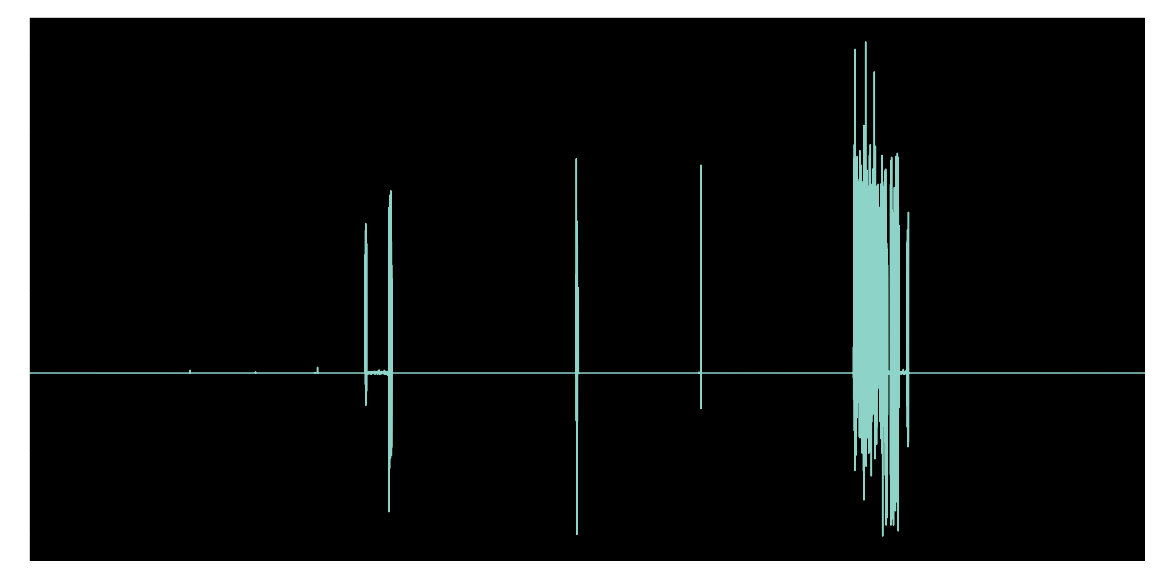

In [75]:
#criteria = full.type_id == 'TCA'
#plt.figure(figsize=(20,10))
#full[criteria]['value'].plot()

criteria = full_data.type_id == 'TCA'
plt.figure(figsize=(20,10))
full_data[criteria]['value'].plot()

In [76]:
# temp_sensors = [s for s in s2[s2.type_id =='TCA']['id_x']]
# temperature_senors = [s for t,s in zip(s2['type_id'], s2['id_x']) if t=='TCA'] # alternative way

temp_sensors = [s for s in sensor_type[sensor_type.type_id =='TCA']['sensor_id']]
temp_sensors

['763ca6f0-8679-11e6-a353-2f6c041e2491',
 'c15a6371-8679-11e6-a353-2f6c041e2491',
 '7644bd40-8679-11e6-a353-2f6c041e2491',
 'c15f9391-8679-11e6-a353-2f6c041e2491',
 '763bbc90-8679-11e6-a353-2f6c041e2491',
 'd3cf6cd0-8679-11e6-a353-2f6c041e2491',
 'd3d909c1-8679-11e6-a353-2f6c041e2491',
 'd3d53930-8679-11e6-a353-2f6c041e2491',
 'c5e881a1-867a-11e6-a353-2f6c041e2491',
 'e6678e91-8679-11e6-a353-2f6c041e2491']

** Using Pandas to plot all the temperature sensors on one single plot. **

- Use pandas to loop over each temperature sensor, and plot them one at a time.
- Hint: Use the following trick to do this is to plot one line at a time, over and over in a loop

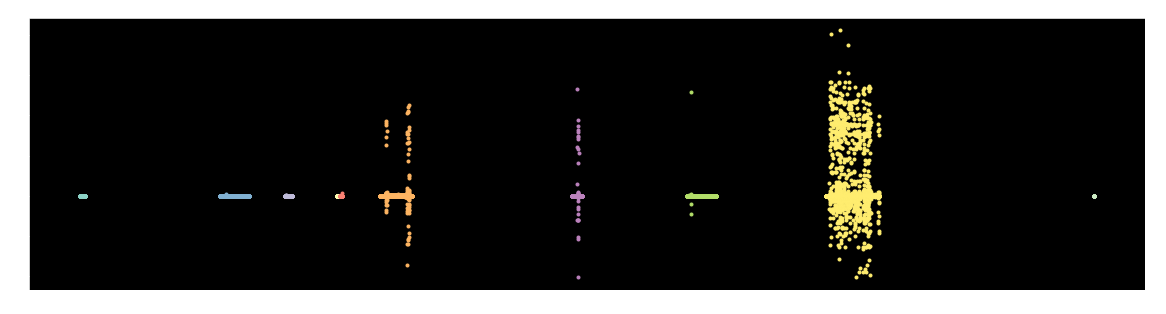

In [77]:
plt.figure(figsize=(20,5))

for s in temp_sensors:
    #print(s)
    sub_df = full_data[full_data['sensor_id']==s]
    plt.plot(sub_df.index, sub_df['value'], '.')
    

This plot is fine, but all the lines are too close together. We cannot see how each sensor is behaving. For that, we can try drawing "Subplots." In these plots, each sensor gets its own plot (called a 'panel').

**Creating Subplots - Each sensor gets its own panel**

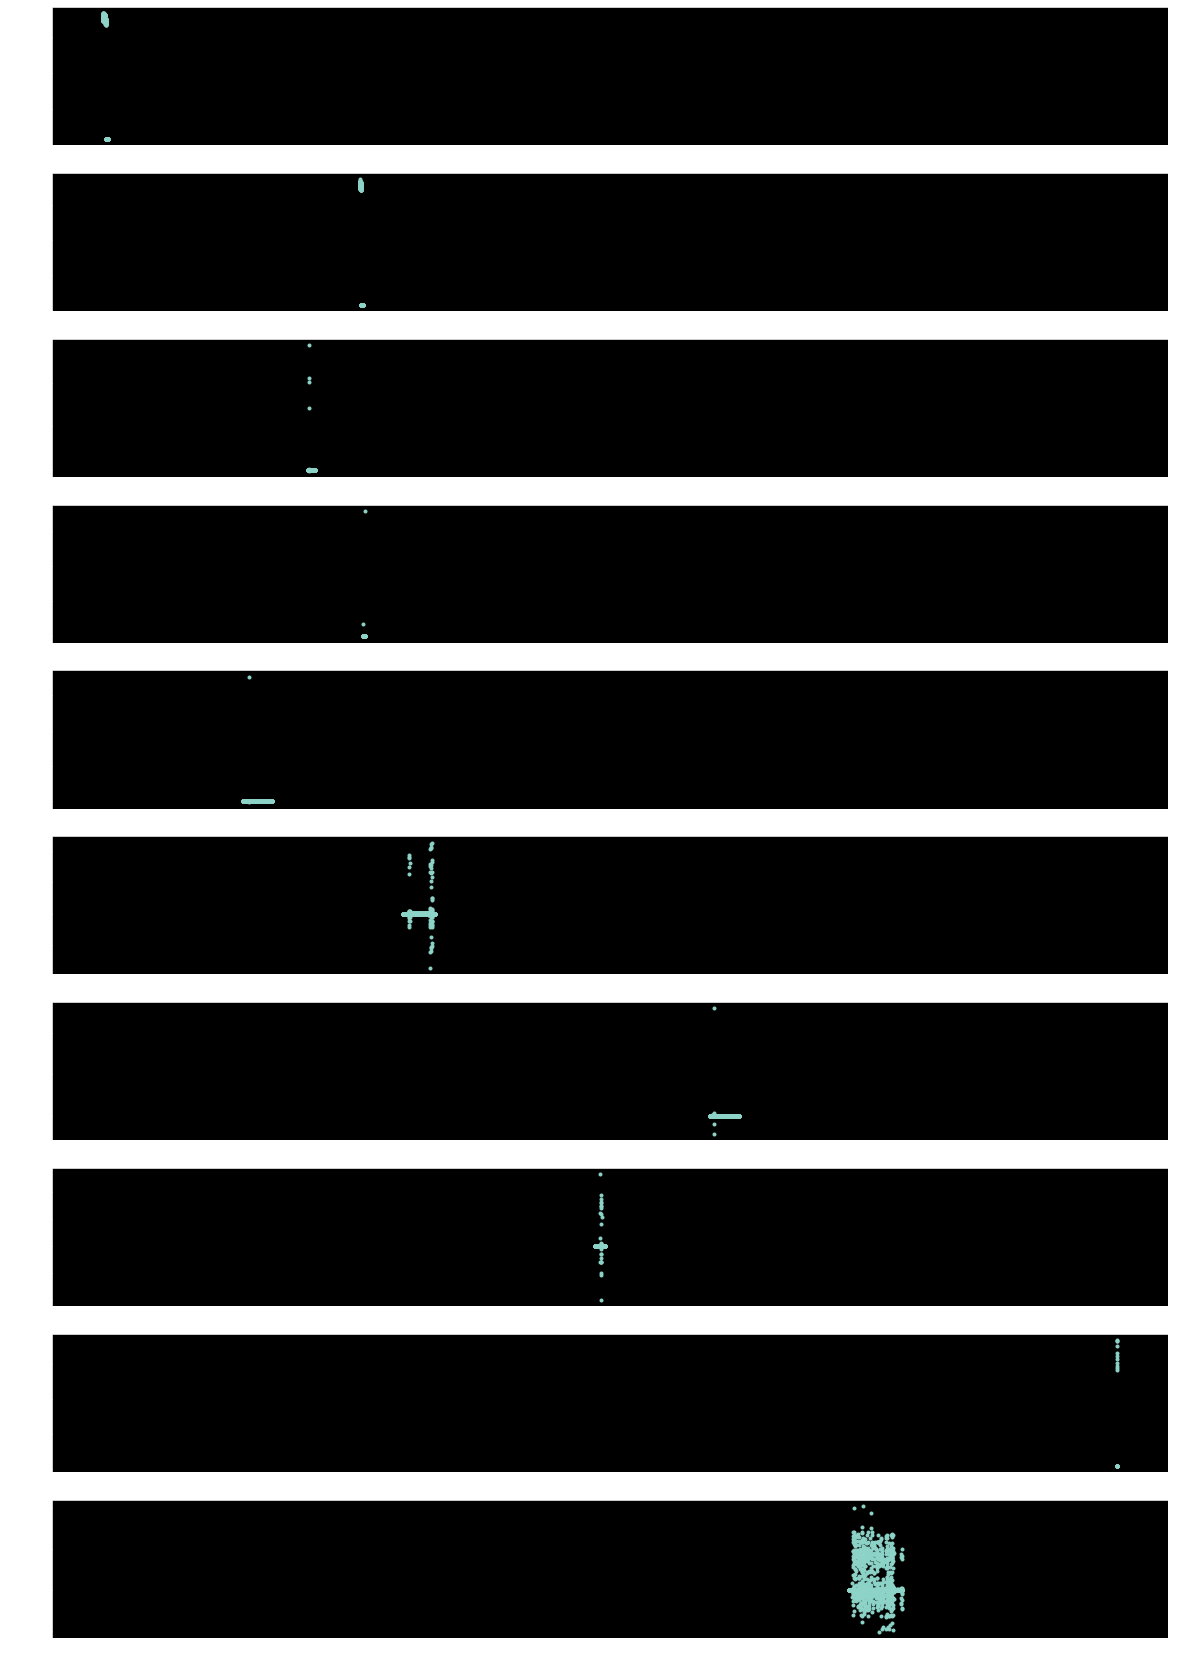

<Figure size 1440x1440 with 0 Axes>

In [78]:
fig, axarr = plt.subplots(10, sharex=True)
fig.set_size_inches(20,30) 

plt.figure(figsize=(20,20))
for i,s in enumerate(temp_sensors):
    sub_df = full_data[full_data['sensor_id']==s]
    axarr[i].plot(sub_df.index, sub_df['value'], '.')
    

**Task: Creating a reshaped Data Frame of just Temperature sensors**

For this, we are going to have each column be 1 sensor... from 1 to 10. The rows will be timestamps, as before.

Hint: pd.pivot() is perfect for this task.

In [32]:
# df.pivot(index='patient', columns='obs', values='score')

In [79]:
temp_df = full_data[full_data['sensor_id'].isin(temp_sensors)]
#del temp_df['timestamp']
temp_df = temp_df.reset_index()
temp_df.pivot(columns='sensor_id', values='value')

sensor_id,763bbc90-8679-11e6-a353-2f6c041e2491,763ca6f0-8679-11e6-a353-2f6c041e2491,7644bd40-8679-11e6-a353-2f6c041e2491,c15a6371-8679-11e6-a353-2f6c041e2491,c15f9391-8679-11e6-a353-2f6c041e2491,c5e881a1-867a-11e6-a353-2f6c041e2491,d3cf6cd0-8679-11e6-a353-2f6c041e2491,d3d53930-8679-11e6-a353-2f6c041e2491,d3d909c1-8679-11e6-a353-2f6c041e2491,e6678e91-8679-11e6-a353-2f6c041e2491
0,NaN,29.30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,29.94,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,28.61,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,28.24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,28.57,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
28032,NaN,NaN,NaN,NaN,NaN,-144.71,NaN,NaN,NaN,NaN
28033,NaN,NaN,NaN,NaN,NaN,-144.71,NaN,NaN,NaN,NaN
28034,NaN,NaN,NaN,NaN,NaN,-144.71,NaN,NaN,NaN,NaN
28035,NaN,NaN,NaN,NaN,NaN,-144.71,NaN,NaN,NaN,NaN


Since this is a real sensor data set, there are some time stamps and sensor_id's that are repeating. (Unfortunately, this happens often in real data sets.)

**Task: Find all rows with the same [Timestamp, Sensor_id] and delete them **

**Here's a clever way to find out all the duplicated rows.**

Some Timestamp and sensor_id are repeating. That causes Indexing problems.

In [80]:
#pd.concat(g for _, g in df.groupby("ID") if len(g) > 1)
pd.concat(g for _, g in temp_df.groupby(['timestamp', 'sensor_id']) if len(g) > 1)

,index,data_point_id,value,timestamp,sensor_id,description,data_frequency,status,created_at,updated_at,data_type_id,node_id,type,si_unit,type_id
7841,51065,0d35cdd0-867e-11e6-a353-2f6c041e2491,25.640000,2016-08-20 20:46:05+00:00,d3cf6cd0-8679-11e6-a353-2f6c041e2491,\N,1800000,OFFLINE,2016-08-15 05:22:31+00:00,2016-09-30 18:12:04.580000+00:00,35dcb3c0-8679-11e6-bda3-ef77801087ee,d3ca3cb0-8679-11e6-a353-2f6c041e2491,temperature,celcius,TCA
7844,51068,0d34bc60-867e-11e6-a353-2f6c041e2491,25.640000,2016-08-20 20:46:05+00:00,d3cf6cd0-8679-11e6-a353-2f6c041e2491,\N,1800000,OFFLINE,2016-08-15 05:22:31+00:00,2016-09-30 18:12:04.580000+00:00,35dcb3c0-8679-11e6-bda3-ef77801087ee,d3ca3cb0-8679-11e6-a353-2f6c041e2491,temperature,celcius,TCA
7308,44414,a29f50d0-867e-11e6-a353-2f6c041e2491,-144.120000,2016-08-21 08:21:30+00:00,c15f9391-8679-11e6-a353-2f6c041e2491,\N,1800000,OFFLINE,2016-08-10 04:20:22+00:00,2016-09-29 19:20:17.516000+00:00,35dcb3c0-8679-11e6-bda3-ef77801087ee,c14ccee0-8679-11e6-a353-2f6c041e2491,temperature,celcius,TCA
7310,44416,a2a0b060-867e-11e6-a353-2f6c041e2491,-144.120000,2016-08-21 08:21:30+00:00,c15f9391-8679-11e6-a353-2f6c041e2491,\N,1800000,OFFLINE,2016-08-10 04:20:22+00:00,2016-09-29 19:20:17.516000+00:00,35dcb3c0-8679-11e6-bda3-ef77801087ee,c14ccee0-8679-11e6-a353-2f6c041e2491,temperature,celcius,TCA
7306,44412,a2c416e0-867e-11e6-a353-2f6c041e2491,-144.120000,2016-08-21 08:51:26+00:00,c15f9391-8679-11e6-a353-2f6c041e2491,\N,1800000,OFFLINE,2016-08-10 04:20:22+00:00,2016-09-29 19:20:17.516000+00:00,35dcb3c0-8679-11e6-bda3-ef77801087ee,c14ccee0-8679-11e6-a353-2f6c041e2491,temperature,celcius,TCA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5528,29340,a55909b0-8b4c-11e6-ad43-49bd404a7931,99.893395,2016-10-05 16:37:33+00:00,763bbc90-8679-11e6-a353-2f6c041e2491,\N,1800000,OFFLINE,2016-08-03 21:50:32+00:00,2016-09-30 18:12:04.578000+00:00,35dcb3c0-8679-11e6-bda3-ef77801087ee,762c5340-8679-11e6-a353-2f6c041e2491,temperature,celcius,TCA
5701,29513,975ef820-8baf-11e6-ad43-49bd404a7931,58.487961,2016-10-06 04:25:36+00:00,763bbc90-8679-11e6-a353-2f6c041e2491,\N,1800000,OFFLINE,2016-08-03 21:50:32+00:00,2016-09-30 18:12:04.578000+00:00,35dcb3c0-8679-11e6-bda3-ef77801087ee,762c5340-8679-11e6-a353-2f6c041e2491,temperature,celcius,TCA
5702,29514,975f4640-8baf-11e6-ad43-49bd404a7931,58.153508,2016-10-06 04:25:36+00:00,763bbc90-8679-11e6-a353-2f6c041e2491,\N,1800000,OFFLINE,2016-08-03 21:50:32+00:00,2016-09-30 18:12:04.578000+00:00,35dcb3c0-8679-11e6-bda3-ef77801087ee,762c5340-8679-11e6-a353-2f6c041e2491,temperature,celcius,TCA
5708,29520,f23f67e0-8bb2-11e6-ad43-49bd404a7931,58.754718,2016-10-06 04:49:53+00:00,763bbc90-8679-11e6-a353-2f6c041e2491,\N,1800000,OFFLINE,2016-08-03 21:50:32+00:00,2016-09-30 18:12:04.578000+00:00,35dcb3c0-8679-11e6-bda3-ef77801087ee,762c5340-8679-11e6-a353-2f6c041e2491,temperature,celcius,TCA


**Task: Drop all the rows where timestamp and sensor_id are duplicated**

In [81]:
tdf = temp_df.drop_duplicates(subset = ['timestamp', 'sensor_id'], keep='first')
# Hint: Look at https://segment.com/blog/5-advanced-testing-techniques-in-go/
tdf

,index,data_point_id,value,timestamp,sensor_id,description,data_frequency,status,created_at,updated_at,data_type_id,node_id,type,si_unit,type_id
0,1849,764dbdf0-8679-11e6-a353-2f6c041e2491,29.30,2016-08-03 04:39:25+00:00,763ca6f0-8679-11e6-a353-2f6c041e2491,\N,1800000,OFFLINE,2016-08-03 04:39:25+00:00,2016-09-29 20:13:52.803000+00:00,35dcb3c0-8679-11e6-bda3-ef77801087ee,762b8ff0-8679-11e6-a353-2f6c041e2491,temperature,celcius,TCA
1,1850,76514060-8679-11e6-a353-2f6c041e2491,29.94,2016-08-03 04:47:41+00:00,763ca6f0-8679-11e6-a353-2f6c041e2491,\N,1800000,OFFLINE,2016-08-03 04:39:25+00:00,2016-09-29 20:13:52.803000+00:00,35dcb3c0-8679-11e6-bda3-ef77801087ee,762b8ff0-8679-11e6-a353-2f6c041e2491,temperature,celcius,TCA
2,1851,76584540-8679-11e6-a353-2f6c041e2491,28.61,2016-08-03 05:08:52+00:00,763ca6f0-8679-11e6-a353-2f6c041e2491,\N,1800000,OFFLINE,2016-08-03 04:39:25+00:00,2016-09-29 20:13:52.803000+00:00,35dcb3c0-8679-11e6-bda3-ef77801087ee,762b8ff0-8679-11e6-a353-2f6c041e2491,temperature,celcius,TCA
3,1852,765dea91-8679-11e6-a353-2f6c041e2491,28.24,2016-08-03 05:14:08+00:00,763ca6f0-8679-11e6-a353-2f6c041e2491,\N,1800000,OFFLINE,2016-08-03 04:39:25+00:00,2016-09-29 20:13:52.803000+00:00,35dcb3c0-8679-11e6-bda3-ef77801087ee,762b8ff0-8679-11e6-a353-2f6c041e2491,temperature,celcius,TCA
4,1853,7661bb20-8679-11e6-a353-2f6c041e2491,28.57,2016-08-03 05:28:55+00:00,763ca6f0-8679-11e6-a353-2f6c041e2491,\N,1800000,OFFLINE,2016-08-03 04:39:25+00:00,2016-09-29 20:13:52.803000+00:00,35dcb3c0-8679-11e6-bda3-ef77801087ee,762b8ff0-8679-11e6-a353-2f6c041e2491,temperature,celcius,TCA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28032,167505,4db14a31-867c-11e6-a353-2f6c041e2491,-144.71,2016-08-19 02:35:06+00:00,c5e881a1-867a-11e6-a353-2f6c041e2491,\N,1800000,OFFLINE,2016-08-17 01:06:49+00:00,2016-09-29 20:13:52.891000+00:00,35dcb3c0-8679-11e6-bda3-ef77801087ee,c5e39fa0-867a-11e6-a353-2f6c041e2491,temperature,celcius,TCA
28033,167506,604489f0-867c-11e6-a353-2f6c041e2491,-144.71,2016-08-19 04:35:13+00:00,c5e881a1-867a-11e6-a353-2f6c041e2491,\N,1800000,OFFLINE,2016-08-17 01:06:49+00:00,2016-09-29 20:13:52.891000+00:00,35dcb3c0-8679-11e6-bda3-ef77801087ee,c5e39fa0-867a-11e6-a353-2f6c041e2491,temperature,celcius,TCA
28034,167507,601d04c0-867c-11e6-a353-2f6c041e2491,-144.71,2016-08-19 03:35:09+00:00,c5e881a1-867a-11e6-a353-2f6c041e2491,\N,1800000,OFFLINE,2016-08-17 01:06:49+00:00,2016-09-29 20:13:52.891000+00:00,35dcb3c0-8679-11e6-bda3-ef77801087ee,c5e39fa0-867a-11e6-a353-2f6c041e2491,temperature,celcius,TCA
28035,167508,6058ae30-867c-11e6-a353-2f6c041e2491,-144.71,2016-08-19 05:05:17+00:00,c5e881a1-867a-11e6-a353-2f6c041e2491,\N,1800000,OFFLINE,2016-08-17 01:06:49+00:00,2016-09-29 20:13:52.891000+00:00,35dcb3c0-8679-11e6-bda3-ef77801087ee,c5e39fa0-867a-11e6-a353-2f6c041e2491,temperature,celcius,TCA


In [82]:
temp_df_cor = tdf.pivot(index='timestamp', columns='sensor_id', values='value')
temp_df_cor

sensor_id,763bbc90-8679-11e6-a353-2f6c041e2491,763ca6f0-8679-11e6-a353-2f6c041e2491,7644bd40-8679-11e6-a353-2f6c041e2491,c15a6371-8679-11e6-a353-2f6c041e2491,c15f9391-8679-11e6-a353-2f6c041e2491,c5e881a1-867a-11e6-a353-2f6c041e2491,d3cf6cd0-8679-11e6-a353-2f6c041e2491,d3d53930-8679-11e6-a353-2f6c041e2491,d3d909c1-8679-11e6-a353-2f6c041e2491,e6678e91-8679-11e6-a353-2f6c041e2491
timestamp,,,,,,,,,,
2016-08-03 04:39:25+00:00,NaN,29.30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-08-03 04:47:41+00:00,NaN,29.94,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-08-03 05:08:52+00:00,NaN,28.61,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-08-03 05:14:08+00:00,NaN,28.24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-08-03 05:28:55+00:00,NaN,28.57,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2016-10-06 07:08:04+00:00,-264.522911,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-10-06 07:12:12+00:00,75.809394,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-10-06 07:20:18+00:00,373.074762,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [83]:
daily_temp_cor_df = temp_df_cor.resample('D').mean()
daily_temp_cor_df

sensor_id,763bbc90-8679-11e6-a353-2f6c041e2491,763ca6f0-8679-11e6-a353-2f6c041e2491,7644bd40-8679-11e6-a353-2f6c041e2491,c15a6371-8679-11e6-a353-2f6c041e2491,c15f9391-8679-11e6-a353-2f6c041e2491,c5e881a1-867a-11e6-a353-2f6c041e2491,d3cf6cd0-8679-11e6-a353-2f6c041e2491,d3d53930-8679-11e6-a353-2f6c041e2491,d3d909c1-8679-11e6-a353-2f6c041e2491,e6678e91-8679-11e6-a353-2f6c041e2491
timestamp,,,,,,,,,,
2016-08-03 00:00:00+00:00,78.082000,28.865,21.067500,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-08-04 00:00:00+00:00,48.245556,NaN,23.583611,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-08-05 00:00:00+00:00,25.652609,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-08-06 00:00:00+00:00,NaN,NaN,21.874444,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-08-07 00:00:00+00:00,NaN,NaN,52703.197112,36.13,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2016-10-02 00:00:00+00:00,84.898809,NaN,NaN,NaN,NaN,NaN,83.472892,87.052369,55.933330,NaN
2016-10-03 00:00:00+00:00,80.006360,NaN,NaN,NaN,NaN,NaN,80.050725,87.387883,74.135964,NaN
2016-10-04 00:00:00+00:00,75.686396,NaN,NaN,NaN,NaN,NaN,81.127106,77.562299,-13.413046,NaN


Now, we are finally ready to calculate the correlations across sensor values. Hint: `Use corr()`

In [84]:
corr_df = daily_temp_cor_df.corr()
corr_df

sensor_id,763bbc90-8679-11e6-a353-2f6c041e2491,763ca6f0-8679-11e6-a353-2f6c041e2491,7644bd40-8679-11e6-a353-2f6c041e2491,c15a6371-8679-11e6-a353-2f6c041e2491,c15f9391-8679-11e6-a353-2f6c041e2491,c5e881a1-867a-11e6-a353-2f6c041e2491,d3cf6cd0-8679-11e6-a353-2f6c041e2491,d3d53930-8679-11e6-a353-2f6c041e2491,d3d909c1-8679-11e6-a353-2f6c041e2491,e6678e91-8679-11e6-a353-2f6c041e2491
sensor_id,,,,,,,,,,
763bbc90-8679-11e6-a353-2f6c041e2491,1.000000,0.604068,0.726736,0.994261,-0.435423,1.000000,-0.102273,-0.144089,-0.119508,-0.558884
763ca6f0-8679-11e6-a353-2f6c041e2491,0.604068,1.000000,0.177751,0.147197,-0.609811,-1.000000,-0.379689,-0.584908,-0.999889,-0.039355
7644bd40-8679-11e6-a353-2f6c041e2491,0.726736,0.177751,1.000000,0.295256,-0.996846,-0.295498,-0.320599,-0.492776,-0.999865,-0.376031
c15a6371-8679-11e6-a353-2f6c041e2491,0.994261,0.147197,0.295256,1.000000,-0.407462,-1.000000,0.534663,0.507379,-0.379621,-0.675369
c15f9391-8679-11e6-a353-2f6c041e2491,-0.435423,-0.609811,-0.996846,-0.407462,1.000000,1.000000,-0.999555,-0.999740,-0.239895,0.784605
c5e881a1-867a-11e6-a353-2f6c041e2491,1.000000,-1.000000,-0.295498,-1.000000,1.000000,1.000000,-0.303960,-0.190118,-0.382485,-0.207631
d3cf6cd0-8679-11e6-a353-2f6c041e2491,-0.102273,-0.379689,-0.320599,0.534663,-0.999555,-0.303960,1.000000,0.338016,0.999989,0.020695
d3d53930-8679-11e6-a353-2f6c041e2491,-0.144089,-0.584908,-0.492776,0.507379,-0.999740,-0.190118,0.338016,1.000000,0.999971,0.143852
d3d909c1-8679-11e6-a353-2f6c041e2491,-0.119508,-0.999889,-0.999865,-0.379621,-0.239895,-0.382485,0.999989,0.999971,1.000000,0.999991


In [85]:
# Create a mask to display only the lower triangle of the matrix (since it's mirrored around its 
# top-left to bottom-right diagonal).
mask = np.zeros_like(corr_df)
mask[np.triu_indices_from(mask)] = True
mask

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])

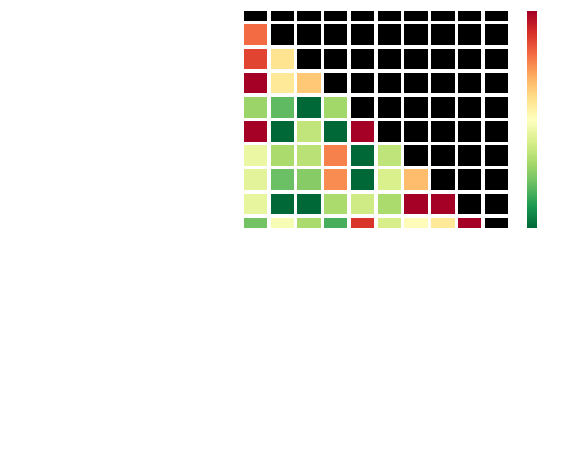

In [86]:
# Create the heatmap using seaborn library. 
# List if colormaps (parameter 'cmap') is available here: http://matplotlib.org/examples/color/colormaps_reference.html
sns.heatmap(corr_df, cmap='RdYlGn_r', vmax=1.0, vmin=-1.0 , mask = mask, linewidths=2.5)
 
# Show the plot we reorient the labels for each column and row to make them easier to read.
plt.yticks(rotation=0) 
plt.xticks(rotation=90) 
plt.show()

In [87]:
full2 = full_data.drop_duplicates(subset = ['timestamp', 'sensor_id'], keep='first')
full2

,data_point_id,value,timestamp,sensor_id,description,data_frequency,status,created_at,updated_at,data_type_id,node_id,type,si_unit,type_id
0,764c5e60-8679-11e6-a353-2f6c041e2491,98.0,2016-08-03 04:39:25+00:00,7635c920-8679-11e6-a353-2f6c041e2491,\N,1800000,OFFLINE,2016-08-03 04:39:25+00:00,2016-09-29 20:13:52.793000+00:00,35dcdad2-8679-11e6-bda3-ef77801087ee,762b8ff0-8679-11e6-a353-2f6c041e2491,battery,percentage,BAT
1,765251d0-8679-11e6-a353-2f6c041e2491,98.0,2016-08-03 04:47:41+00:00,7635c920-8679-11e6-a353-2f6c041e2491,\N,1800000,OFFLINE,2016-08-03 04:39:25+00:00,2016-09-29 20:13:52.793000+00:00,35dcdad2-8679-11e6-bda3-ef77801087ee,762b8ff0-8679-11e6-a353-2f6c041e2491,battery,percentage,BAT
2,7655fb50-8679-11e6-a353-2f6c041e2491,98.0,2016-08-03 05:08:52+00:00,7635c920-8679-11e6-a353-2f6c041e2491,\N,1800000,OFFLINE,2016-08-03 04:39:25+00:00,2016-09-29 20:13:52.793000+00:00,35dcdad2-8679-11e6-bda3-ef77801087ee,762b8ff0-8679-11e6-a353-2f6c041e2491,battery,percentage,BAT
3,7659cbe0-8679-11e6-a353-2f6c041e2491,98.0,2016-08-03 05:14:08+00:00,7635c920-8679-11e6-a353-2f6c041e2491,\N,1800000,OFFLINE,2016-08-03 04:39:25+00:00,2016-09-29 20:13:52.793000+00:00,35dcdad2-8679-11e6-bda3-ef77801087ee,762b8ff0-8679-11e6-a353-2f6c041e2491,battery,percentage,BAT
4,765dea90-8679-11e6-a353-2f6c041e2491,96.0,2016-08-03 05:28:55+00:00,7635c920-8679-11e6-a353-2f6c041e2491,\N,1800000,OFFLINE,2016-08-03 04:39:25+00:00,2016-09-29 20:13:52.793000+00:00,35dcdad2-8679-11e6-bda3-ef77801087ee,762b8ff0-8679-11e6-a353-2f6c041e2491,battery,percentage,BAT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
176529,39e16940-e707-11e6-89c8-314aa4f67f8c,125.0,2016-08-31 19:00:01+00:00,1248ff60-e707-11e6-89c8-314aa4f67f8c,\N,1800000,OFFLINE,2016-07-01 00:00:31+00:00,2017-01-30 16:24:05.832000+00:00,ed5edee0-e701-11e6-83c1-01ce06e6d17f,ede3ed60-e701-11e6-83c1-01ce06e6d17f,RSAM,counts,RSAM
176530,39e82000-e707-11e6-89c8-314aa4f67f8c,143.0,2016-08-31 19:50:00+00:00,1248ff60-e707-11e6-89c8-314aa4f67f8c,\N,1800000,OFFLINE,2016-07-01 00:00:31+00:00,2017-01-30 16:24:05.832000+00:00,ed5edee0-e701-11e6-83c1-01ce06e6d17f,ede3ed60-e701-11e6-83c1-01ce06e6d17f,RSAM,counts,RSAM
176531,39f08470-e707-11e6-89c8-314aa4f67f8c,175.0,2016-08-31 21:00:02+00:00,1248ff60-e707-11e6-89c8-314aa4f67f8c,\N,1800000,OFFLINE,2016-07-01 00:00:31+00:00,2017-01-30 16:24:05.832000+00:00,ed5edee0-e701-11e6-83c1-01ce06e6d17f,ede3ed60-e701-11e6-83c1-01ce06e6d17f,RSAM,counts,RSAM
176532,39f84ca0-e707-11e6-89c8-314aa4f67f8c,164.0,2016-08-31 21:50:00+00:00,1248ff60-e707-11e6-89c8-314aa4f67f8c,\N,1800000,OFFLINE,2016-07-01 00:00:31+00:00,2017-01-30 16:24:05.832000+00:00,ed5edee0-e701-11e6-83c1-01ce06e6d17f,ede3ed60-e701-11e6-83c1-01ce06e6d17f,RSAM,counts,RSAM


In [88]:
full_wide = full2.pivot(index='timestamp', columns='sensor_id', values='value')
full_wide

sensor_id,1248ff60-e707-11e6-89c8-314aa4f67f8c,7635c920-8679-11e6-a353-2f6c041e2491,7635f030-8679-11e6-a353-2f6c041e2491,7636da90-8679-11e6-a353-2f6c041e2491,763701a0-8679-11e6-a353-2f6c041e2491,763701a1-8679-11e6-a353-2f6c041e2491,763b9580-8679-11e6-a353-2f6c041e2491,763bbc90-8679-11e6-a353-2f6c041e2491,763ca6f0-8679-11e6-a353-2f6c041e2491,763d6a40-8679-11e6-a353-2f6c041e2491,...,d3d909c0-8679-11e6-a353-2f6c041e2491,d3d909c1-8679-11e6-a353-2f6c041e2491,d3db2ca0-8679-11e6-a353-2f6c041e2491,d3db53b0-8679-11e6-a353-2f6c041e2491,e66592c0-8679-11e6-a353-2f6c041e2491,e6678e90-8679-11e6-a353-2f6c041e2491,e6678e91-8679-11e6-a353-2f6c041e2491,e66851e0-8679-11e6-a353-2f6c041e2491,e66851e1-8679-11e6-a353-2f6c041e2491,e6691530-8679-11e6-a353-2f6c041e2491
timestamp,,,,,,,,,,,,,,,,,,,,,
2016-07-01 00:00:31+00:00,455.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-07-01 00:10:02+00:00,213.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-07-01 00:20:00+00:00,225.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-07-01 00:30:01+00:00,321.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-07-01 00:40:00+00:00,429.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-10-06 07:08:04+00:00,NaN,NaN,64.0,-51.266181,-64.524858,NaN,NaN,-264.522911,NaN,65.168276,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-10-06 07:12:12+00:00,NaN,NaN,65.0,-248.979928,69.077721,NaN,NaN,75.809394,NaN,206.446981,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-10-06 07:20:18+00:00,NaN,NaN,66.0,-110.886496,-208.256145,NaN,NaN,373.074762,NaN,88.260137,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [89]:
daily_all_sensors = full_wide.resample('D').mean()

In [90]:
daily_all_sensors

sensor_id,1248ff60-e707-11e6-89c8-314aa4f67f8c,7635c920-8679-11e6-a353-2f6c041e2491,7635f030-8679-11e6-a353-2f6c041e2491,7636da90-8679-11e6-a353-2f6c041e2491,763701a0-8679-11e6-a353-2f6c041e2491,763701a1-8679-11e6-a353-2f6c041e2491,763b9580-8679-11e6-a353-2f6c041e2491,763bbc90-8679-11e6-a353-2f6c041e2491,763ca6f0-8679-11e6-a353-2f6c041e2491,763d6a40-8679-11e6-a353-2f6c041e2491,...,d3d909c0-8679-11e6-a353-2f6c041e2491,d3d909c1-8679-11e6-a353-2f6c041e2491,d3db2ca0-8679-11e6-a353-2f6c041e2491,d3db53b0-8679-11e6-a353-2f6c041e2491,e66592c0-8679-11e6-a353-2f6c041e2491,e6678e90-8679-11e6-a353-2f6c041e2491,e6678e91-8679-11e6-a353-2f6c041e2491,e66851e0-8679-11e6-a353-2f6c041e2491,e66851e1-8679-11e6-a353-2f6c041e2491,e6691530-8679-11e6-a353-2f6c041e2491
timestamp,,,,,,,,,,,,,,,,,,,,,
2016-07-01 00:00:00+00:00,306.902098,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-07-02 00:00:00+00:00,267.804196,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-07-03 00:00:00+00:00,286.972028,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-07-04 00:00:00+00:00,339.860140,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-07-05 00:00:00+00:00,445.828571,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-10-02 00:00:00+00:00,NaN,NaN,83.110236,84.039435,84.185350,NaN,NaN,84.898809,NaN,84.475934,...,71.269303,55.933330,20.957267,63.113284,NaN,NaN,NaN,NaN,NaN,NaN
2016-10-03 00:00:00+00:00,NaN,NaN,78.088710,82.715750,82.723776,NaN,NaN,80.006360,NaN,80.637135,...,59.815913,74.135964,50.758276,56.132421,NaN,NaN,NaN,NaN,NaN,NaN
2016-10-04 00:00:00+00:00,NaN,NaN,72.263014,75.533202,75.824112,NaN,NaN,75.686396,NaN,75.279764,...,-21.607414,-13.413046,-23.583102,74.522906,NaN,NaN,NaN,NaN,NaN,NaN


**Trying to building a Linear Model**

In order to do that, we first need to create a data frame with the columns representing only those sensors for ONE NODE.

Try to see if pd.pivot() can help with grouping Nodes together

In [91]:
#nodes.name # so we have 10 "nodes" with 6 sensors each. [T, Pr, HUMA, PPM , PPM2, BATT]
data_nodes.name

0       N1
1       N9
2       N8
3      N10
4       N2
5       N3
6       N7
7       N4
8       N5
9     RSAM
10      N6
Name: name, dtype: object

In [92]:
#fullnode = pd.merge(full_data, data_node, left_on='node_id', right_on='id')
fullnode = pd.merge(full_data, data_nodes, on='node_id')
fullnode

,data_point_id,value,timestamp,sensor_id,description_x,data_frequency,status_x,created_at_x,updated_at_x,data_type_id,...,type,si_unit,type_id,name,description_y,location,status_y,created_at_y,updated_at_y,volcano_id
0,764c5e60-8679-11e6-a353-2f6c041e2491,98.0,2016-08-03 04:39:25+00:00,7635c920-8679-11e6-a353-2f6c041e2491,\N,1800000,OFFLINE,2016-08-03 04:39:25+00:00,2016-09-29 20:13:52.793000+00:00,35dcdad2-8679-11e6-bda3-ef77801087ee,...,battery,percentage,BAT,N10,\N,\N,OFFLINE,2016-08-03 04:39:25+00:00,2016-09-29 19:20:17.431000+00:00,35dc3e90-8679-11e6-bda3-ef77801087ee
1,765251d0-8679-11e6-a353-2f6c041e2491,98.0,2016-08-03 04:47:41+00:00,7635c920-8679-11e6-a353-2f6c041e2491,\N,1800000,OFFLINE,2016-08-03 04:39:25+00:00,2016-09-29 20:13:52.793000+00:00,35dcdad2-8679-11e6-bda3-ef77801087ee,...,battery,percentage,BAT,N10,\N,\N,OFFLINE,2016-08-03 04:39:25+00:00,2016-09-29 19:20:17.431000+00:00,35dc3e90-8679-11e6-bda3-ef77801087ee
2,7655fb50-8679-11e6-a353-2f6c041e2491,98.0,2016-08-03 05:08:52+00:00,7635c920-8679-11e6-a353-2f6c041e2491,\N,1800000,OFFLINE,2016-08-03 04:39:25+00:00,2016-09-29 20:13:52.793000+00:00,35dcdad2-8679-11e6-bda3-ef77801087ee,...,battery,percentage,BAT,N10,\N,\N,OFFLINE,2016-08-03 04:39:25+00:00,2016-09-29 19:20:17.431000+00:00,35dc3e90-8679-11e6-bda3-ef77801087ee
3,7659cbe0-8679-11e6-a353-2f6c041e2491,98.0,2016-08-03 05:14:08+00:00,7635c920-8679-11e6-a353-2f6c041e2491,\N,1800000,OFFLINE,2016-08-03 04:39:25+00:00,2016-09-29 20:13:52.793000+00:00,35dcdad2-8679-11e6-bda3-ef77801087ee,...,battery,percentage,BAT,N10,\N,\N,OFFLINE,2016-08-03 04:39:25+00:00,2016-09-29 19:20:17.431000+00:00,35dc3e90-8679-11e6-bda3-ef77801087ee
4,765dea90-8679-11e6-a353-2f6c041e2491,96.0,2016-08-03 05:28:55+00:00,7635c920-8679-11e6-a353-2f6c041e2491,\N,1800000,OFFLINE,2016-08-03 04:39:25+00:00,2016-09-29 20:13:52.793000+00:00,35dcdad2-8679-11e6-bda3-ef77801087ee,...,battery,percentage,BAT,N10,\N,\N,OFFLINE,2016-08-03 04:39:25+00:00,2016-09-29 19:20:17.431000+00:00,35dc3e90-8679-11e6-bda3-ef77801087ee
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
176529,39e16940-e707-11e6-89c8-314aa4f67f8c,125.0,2016-08-31 19:00:01+00:00,1248ff60-e707-11e6-89c8-314aa4f67f8c,\N,1800000,OFFLINE,2016-07-01 00:00:31+00:00,2017-01-30 16:24:05.832000+00:00,ed5edee0-e701-11e6-83c1-01ce06e6d17f,...,RSAM,counts,RSAM,RSAM,\N,\N,OFFLINE,1970-01-17 23:35:31.231000+00:00,2017-01-30 16:24:05.867000+00:00,35dc3e90-8679-11e6-bda3-ef77801087ee
176530,39e82000-e707-11e6-89c8-314aa4f67f8c,143.0,2016-08-31 19:50:00+00:00,1248ff60-e707-11e6-89c8-314aa4f67f8c,\N,1800000,OFFLINE,2016-07-01 00:00:31+00:00,2017-01-30 16:24:05.832000+00:00,ed5edee0-e701-11e6-83c1-01ce06e6d17f,...,RSAM,counts,RSAM,RSAM,\N,\N,OFFLINE,1970-01-17 23:35:31.231000+00:00,2017-01-30 16:24:05.867000+00:00,35dc3e90-8679-11e6-bda3-ef77801087ee
176531,39f08470-e707-11e6-89c8-314aa4f67f8c,175.0,2016-08-31 21:00:02+00:00,1248ff60-e707-11e6-89c8-314aa4f67f8c,\N,1800000,OFFLINE,2016-07-01 00:00:31+00:00,2017-01-30 16:24:05.832000+00:00,ed5edee0-e701-11e6-83c1-01ce06e6d17f,...,RSAM,counts,RSAM,RSAM,\N,\N,OFFLINE,1970-01-17 23:35:31.231000+00:00,2017-01-30 16:24:05.867000+00:00,35dc3e90-8679-11e6-bda3-ef77801087ee
176532,39f84ca0-e707-11e6-89c8-314aa4f67f8c,164.0,2016-08-31 21:50:00+00:00,1248ff60-e707-11e6-89c8-314aa4f67f8c,\N,1800000,OFFLINE,2016-07-01 00:00:31+00:00,2017-01-30 16:24:05.832000+00:00,ed5edee0-e701-11e6-83c1-01ce06e6d17f,...,RSAM,counts,RSAM,RSAM,\N,\N,OFFLINE,1970-01-17 23:35:31.231000+00:00,2017-01-30 16:24:05.867000+00:00,35dc3e90-8679-11e6-bda3-ef77801087ee


In [93]:
fullnode.columns
#fullnode.index

Index(['data_point_id', 'value', 'timestamp', 'sensor_id', 'description_x',
       'data_frequency', 'status_x', 'created_at_x', 'updated_at_x',
       'data_type_id', 'node_id', 'type', 'si_unit', 'type_id', 'name',
       'description_y', 'location', 'status_y', 'created_at_y', 'updated_at_y',
       'volcano_id'],
      dtype='object')

In [94]:
#fullnode.columns
fullnode.index

Int64Index([     0,      1,      2,      3,      4,      5,      6,      7,
                 8,      9,
            ...
            176524, 176525, 176526, 176527, 176528, 176529, 176530, 176531,
            176532, 176533],
           dtype='int64', length=176534)

In [95]:
fullnode.set_index('timestamp', inplace=True)
fullnode

,data_point_id,value,sensor_id,description_x,data_frequency,status_x,created_at_x,updated_at_x,data_type_id,node_id,type,si_unit,type_id,name,description_y,location,status_y,created_at_y,updated_at_y,volcano_id
timestamp,,,,,,,,,,,,,,,,,,,,
2016-08-03 04:39:25+00:00,764c5e60-8679-11e6-a353-2f6c041e2491,98.0,7635c920-8679-11e6-a353-2f6c041e2491,\N,1800000,OFFLINE,2016-08-03 04:39:25+00:00,2016-09-29 20:13:52.793000+00:00,35dcdad2-8679-11e6-bda3-ef77801087ee,762b8ff0-8679-11e6-a353-2f6c041e2491,battery,percentage,BAT,N10,\N,\N,OFFLINE,2016-08-03 04:39:25+00:00,2016-09-29 19:20:17.431000+00:00,35dc3e90-8679-11e6-bda3-ef77801087ee
2016-08-03 04:47:41+00:00,765251d0-8679-11e6-a353-2f6c041e2491,98.0,7635c920-8679-11e6-a353-2f6c041e2491,\N,1800000,OFFLINE,2016-08-03 04:39:25+00:00,2016-09-29 20:13:52.793000+00:00,35dcdad2-8679-11e6-bda3-ef77801087ee,762b8ff0-8679-11e6-a353-2f6c041e2491,battery,percentage,BAT,N10,\N,\N,OFFLINE,2016-08-03 04:39:25+00:00,2016-09-29 19:20:17.431000+00:00,35dc3e90-8679-11e6-bda3-ef77801087ee
2016-08-03 05:08:52+00:00,7655fb50-8679-11e6-a353-2f6c041e2491,98.0,7635c920-8679-11e6-a353-2f6c041e2491,\N,1800000,OFFLINE,2016-08-03 04:39:25+00:00,2016-09-29 20:13:52.793000+00:00,35dcdad2-8679-11e6-bda3-ef77801087ee,762b8ff0-8679-11e6-a353-2f6c041e2491,battery,percentage,BAT,N10,\N,\N,OFFLINE,2016-08-03 04:39:25+00:00,2016-09-29 19:20:17.431000+00:00,35dc3e90-8679-11e6-bda3-ef77801087ee
2016-08-03 05:14:08+00:00,7659cbe0-8679-11e6-a353-2f6c041e2491,98.0,7635c920-8679-11e6-a353-2f6c041e2491,\N,1800000,OFFLINE,2016-08-03 04:39:25+00:00,2016-09-29 20:13:52.793000+00:00,35dcdad2-8679-11e6-bda3-ef77801087ee,762b8ff0-8679-11e6-a353-2f6c041e2491,battery,percentage,BAT,N10,\N,\N,OFFLINE,2016-08-03 04:39:25+00:00,2016-09-29 19:20:17.431000+00:00,35dc3e90-8679-11e6-bda3-ef77801087ee
2016-08-03 05:28:55+00:00,765dea90-8679-11e6-a353-2f6c041e2491,96.0,7635c920-8679-11e6-a353-2f6c041e2491,\N,1800000,OFFLINE,2016-08-03 04:39:25+00:00,2016-09-29 20:13:52.793000+00:00,35dcdad2-8679-11e6-bda3-ef77801087ee,762b8ff0-8679-11e6-a353-2f6c041e2491,battery,percentage,BAT,N10,\N,\N,OFFLINE,2016-08-03 04:39:25+00:00,2016-09-29 19:20:17.431000+00:00,35dc3e90-8679-11e6-bda3-ef77801087ee
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-08-31 19:00:01+00:00,39e16940-e707-11e6-89c8-314aa4f67f8c,125.0,1248ff60-e707-11e6-89c8-314aa4f67f8c,\N,1800000,OFFLINE,2016-07-01 00:00:31+00:00,2017-01-30 16:24:05.832000+00:00,ed5edee0-e701-11e6-83c1-01ce06e6d17f,ede3ed60-e701-11e6-83c1-01ce06e6d17f,RSAM,counts,RSAM,RSAM,\N,\N,OFFLINE,1970-01-17 23:35:31.231000+00:00,2017-01-30 16:24:05.867000+00:00,35dc3e90-8679-11e6-bda3-ef77801087ee
2016-08-31 19:50:00+00:00,39e82000-e707-11e6-89c8-314aa4f67f8c,143.0,1248ff60-e707-11e6-89c8-314aa4f67f8c,\N,1800000,OFFLINE,2016-07-01 00:00:31+00:00,2017-01-30 16:24:05.832000+00:00,ed5edee0-e701-11e6-83c1-01ce06e6d17f,ede3ed60-e701-11e6-83c1-01ce06e6d17f,RSAM,counts,RSAM,RSAM,\N,\N,OFFLINE,1970-01-17 23:35:31.231000+00:00,2017-01-30 16:24:05.867000+00:00,35dc3e90-8679-11e6-bda3-ef77801087ee
2016-08-31 21:00:02+00:00,39f08470-e707-11e6-89c8-314aa4f67f8c,175.0,1248ff60-e707-11e6-89c8-314aa4f67f8c,\N,1800000,OFFLINE,2016-07-01 00:00:31+00:00,2017-01-30 16:24:05.832000+00:00,ed5edee0-e701-11e6-83c1-01ce06e6d17f,ede3ed60-e701-11e6-83c1-01ce06e6d17f,RSAM,counts,RSAM,RSAM,\N,\N,OFFLINE,1970-01-17 23:35:31.231000+00:00,2017-01-30 16:24:05.867000+00:00,35dc3e90-8679-11e6-bda3-ef77801087ee


In [96]:
fullnode.resample('D').mean()
fullnode

,data_point_id,value,sensor_id,description_x,data_frequency,status_x,created_at_x,updated_at_x,data_type_id,node_id,type,si_unit,type_id,name,description_y,location,status_y,created_at_y,updated_at_y,volcano_id
timestamp,,,,,,,,,,,,,,,,,,,,
2016-08-03 04:39:25+00:00,764c5e60-8679-11e6-a353-2f6c041e2491,98.0,7635c920-8679-11e6-a353-2f6c041e2491,\N,1800000,OFFLINE,2016-08-03 04:39:25+00:00,2016-09-29 20:13:52.793000+00:00,35dcdad2-8679-11e6-bda3-ef77801087ee,762b8ff0-8679-11e6-a353-2f6c041e2491,battery,percentage,BAT,N10,\N,\N,OFFLINE,2016-08-03 04:39:25+00:00,2016-09-29 19:20:17.431000+00:00,35dc3e90-8679-11e6-bda3-ef77801087ee
2016-08-03 04:47:41+00:00,765251d0-8679-11e6-a353-2f6c041e2491,98.0,7635c920-8679-11e6-a353-2f6c041e2491,\N,1800000,OFFLINE,2016-08-03 04:39:25+00:00,2016-09-29 20:13:52.793000+00:00,35dcdad2-8679-11e6-bda3-ef77801087ee,762b8ff0-8679-11e6-a353-2f6c041e2491,battery,percentage,BAT,N10,\N,\N,OFFLINE,2016-08-03 04:39:25+00:00,2016-09-29 19:20:17.431000+00:00,35dc3e90-8679-11e6-bda3-ef77801087ee
2016-08-03 05:08:52+00:00,7655fb50-8679-11e6-a353-2f6c041e2491,98.0,7635c920-8679-11e6-a353-2f6c041e2491,\N,1800000,OFFLINE,2016-08-03 04:39:25+00:00,2016-09-29 20:13:52.793000+00:00,35dcdad2-8679-11e6-bda3-ef77801087ee,762b8ff0-8679-11e6-a353-2f6c041e2491,battery,percentage,BAT,N10,\N,\N,OFFLINE,2016-08-03 04:39:25+00:00,2016-09-29 19:20:17.431000+00:00,35dc3e90-8679-11e6-bda3-ef77801087ee
2016-08-03 05:14:08+00:00,7659cbe0-8679-11e6-a353-2f6c041e2491,98.0,7635c920-8679-11e6-a353-2f6c041e2491,\N,1800000,OFFLINE,2016-08-03 04:39:25+00:00,2016-09-29 20:13:52.793000+00:00,35dcdad2-8679-11e6-bda3-ef77801087ee,762b8ff0-8679-11e6-a353-2f6c041e2491,battery,percentage,BAT,N10,\N,\N,OFFLINE,2016-08-03 04:39:25+00:00,2016-09-29 19:20:17.431000+00:00,35dc3e90-8679-11e6-bda3-ef77801087ee
2016-08-03 05:28:55+00:00,765dea90-8679-11e6-a353-2f6c041e2491,96.0,7635c920-8679-11e6-a353-2f6c041e2491,\N,1800000,OFFLINE,2016-08-03 04:39:25+00:00,2016-09-29 20:13:52.793000+00:00,35dcdad2-8679-11e6-bda3-ef77801087ee,762b8ff0-8679-11e6-a353-2f6c041e2491,battery,percentage,BAT,N10,\N,\N,OFFLINE,2016-08-03 04:39:25+00:00,2016-09-29 19:20:17.431000+00:00,35dc3e90-8679-11e6-bda3-ef77801087ee
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-08-31 19:00:01+00:00,39e16940-e707-11e6-89c8-314aa4f67f8c,125.0,1248ff60-e707-11e6-89c8-314aa4f67f8c,\N,1800000,OFFLINE,2016-07-01 00:00:31+00:00,2017-01-30 16:24:05.832000+00:00,ed5edee0-e701-11e6-83c1-01ce06e6d17f,ede3ed60-e701-11e6-83c1-01ce06e6d17f,RSAM,counts,RSAM,RSAM,\N,\N,OFFLINE,1970-01-17 23:35:31.231000+00:00,2017-01-30 16:24:05.867000+00:00,35dc3e90-8679-11e6-bda3-ef77801087ee
2016-08-31 19:50:00+00:00,39e82000-e707-11e6-89c8-314aa4f67f8c,143.0,1248ff60-e707-11e6-89c8-314aa4f67f8c,\N,1800000,OFFLINE,2016-07-01 00:00:31+00:00,2017-01-30 16:24:05.832000+00:00,ed5edee0-e701-11e6-83c1-01ce06e6d17f,ede3ed60-e701-11e6-83c1-01ce06e6d17f,RSAM,counts,RSAM,RSAM,\N,\N,OFFLINE,1970-01-17 23:35:31.231000+00:00,2017-01-30 16:24:05.867000+00:00,35dc3e90-8679-11e6-bda3-ef77801087ee
2016-08-31 21:00:02+00:00,39f08470-e707-11e6-89c8-314aa4f67f8c,175.0,1248ff60-e707-11e6-89c8-314aa4f67f8c,\N,1800000,OFFLINE,2016-07-01 00:00:31+00:00,2017-01-30 16:24:05.832000+00:00,ed5edee0-e701-11e6-83c1-01ce06e6d17f,ede3ed60-e701-11e6-83c1-01ce06e6d17f,RSAM,counts,RSAM,RSAM,\N,\N,OFFLINE,1970-01-17 23:35:31.231000+00:00,2017-01-30 16:24:05.867000+00:00,35dc3e90-8679-11e6-bda3-ef77801087ee


In [97]:
# fullnode.pivot_table(index=['timestamp', 'name'], columns='type', values='value')
fn_wide = fullnode.pivot_table(index=['timestamp','name'], columns=['type'], values='value')
fn_wide

,type,RSAM,battery,carbon dioxide concentration,humidity,hydrogen sulfide concentration,pressure,temperature
timestamp,name,,,,,,,
2016-07-01 00:00:31+00:00,RSAM,455.0,NaN,NaN,NaN,NaN,NaN,NaN
2016-07-01 00:10:02+00:00,RSAM,213.0,NaN,NaN,NaN,NaN,NaN,NaN
2016-07-01 00:20:00+00:00,RSAM,225.0,NaN,NaN,NaN,NaN,NaN,NaN
2016-07-01 00:30:01+00:00,RSAM,321.0,NaN,NaN,NaN,NaN,NaN,NaN
2016-07-01 00:40:00+00:00,RSAM,429.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
2016-10-06 07:08:04+00:00,N7,NaN,64.0,-51.266181,65.453954,-64.524858,65.168276,-264.522911
2016-10-06 07:12:12+00:00,N7,NaN,65.0,-248.979928,70.448305,69.077721,206.446981,75.809394
2016-10-06 07:20:18+00:00,N7,NaN,66.0,-110.886496,64.713856,-208.256145,88.260137,373.074762


In [98]:
#Now, let's make the Node ('name') into its own column. We do this by reset_index() for that level (=1)
fn_wide.reset_index(level=1, inplace=True)

In [99]:
fn_wide.head()

type,name,RSAM,battery,carbon dioxide concentration,humidity,hydrogen sulfide concentration,pressure,temperature
timestamp,,,,,,,,
2016-07-01 00:00:31+00:00,RSAM,455.0,NaN,NaN,NaN,NaN,NaN,NaN
2016-07-01 00:10:02+00:00,RSAM,213.0,NaN,NaN,NaN,NaN,NaN,NaN
2016-07-01 00:20:00+00:00,RSAM,225.0,NaN,NaN,NaN,NaN,NaN,NaN
2016-07-01 00:30:01+00:00,RSAM,321.0,NaN,NaN,NaN,NaN,NaN,NaN
2016-07-01 00:40:00+00:00,RSAM,429.0,NaN,NaN,NaN,NaN,NaN,NaN


Before we can perform Linear Regression, we have one last step remaining. We'd like to "resample" all the data, aggregating it down to 'Daily' Levels.

In [100]:
lmfn = fn_wide.resample('D').mean()

# replacing NANs with medians,
lmfn.fillna(lmfn.median(), inplace=True)
lmfn

type,RSAM,battery,carbon dioxide concentration,humidity,hydrogen sulfide concentration,pressure,temperature
timestamp,,,,,,,
2016-07-01 00:00:00+00:00,306.902098,78.115251,562.685107,80.062088,82.613484,97474.745474,73.784555
2016-07-02 00:00:00+00:00,267.804196,78.115251,562.685107,80.062088,82.613484,97474.745474,73.784555
2016-07-03 00:00:00+00:00,286.972028,78.115251,562.685107,80.062088,82.613484,97474.745474,73.784555
2016-07-04 00:00:00+00:00,339.860140,78.115251,562.685107,80.062088,82.613484,97474.745474,73.784555
2016-07-05 00:00:00+00:00,445.828571,78.115251,562.685107,80.062088,82.613484,97474.745474,73.784555
...,...,...,...,...,...,...,...
2016-10-02 00:00:00+00:00,264.232485,84.808642,84.312524,84.239557,84.466006,84.649853,84.619005
2016-10-03 00:00:00+00:00,264.232485,79.055556,81.747719,79.872977,83.135750,80.624512,80.523080
2016-10-04 00:00:00+00:00,264.232485,77.174946,76.063079,75.870688,76.613696,76.331389,76.249396


In [101]:
lmfn.shape

(98, 7)

### End of Stitching. 

**The Digital Thread for this dataset has been created**

This "digital Thread" has been used to 'stitch' the data frame with all the values we wish to analyze.

---
Now we finally have the data frame in the shape we wanted to enable Linear Regression.

### 8.0 Sample Modeling

**8.1 Building A Battery Remaining-Life prediction model **
Build a machine learning model (LR, tree-based or any other) to try and predict the Battery life (remaining) as a function of any of the other sensor characteristic.

* Which variable (sensor) is a good predictor of battery life?
* Is your linear regression a "good fit?"
* What it the RMSE of your predicted values?

In [102]:
#==============================================================================
# Supervised learning linear regression
#==============================================================================

from sklearn import linear_model
#from sklearn import model_selection
from sklearn.metrics import r2_score

# Split the data into training/testing sets
train = lmfn[:-30]
test = lmfn[-30:]

In [103]:
train.columns

name_sensortype = list(train.columns)
del(name_sensortype[1])
name_sensortype

['RSAM',
 'carbon dioxide concentration',
 'humidity',
 'hydrogen sulfide concentration',
 'pressure',
 'temperature']

In [104]:
target, predictors1, predictors2, predictors3, predictors4, predictors5, predictors6 = 'battery', 'RSAM', 'carbon dioxide concentration', 'humidity', 'hydrogen sulfide concentration', 'pressure', 'temperature'

x_train1=train[predictors1].to_frame() #converts the pandas Series to numpy.ndarray
x_train2=train[predictors2].to_frame()
x_train3=train[predictors3].to_frame()
x_train4=train[predictors4].to_frame()
x_train5=train[predictors5].to_frame()
x_train6=train[predictors6].to_frame()

y_train=train[target].to_frame()

x_test1=test[predictors1].to_frame() #converts the pandas Series to numpy.ndarray
x_test2=test[predictors2].to_frame()
x_test3=test[predictors3].to_frame()
x_test4=test[predictors4].to_frame()
x_test5=test[predictors5].to_frame()
x_test6=test[predictors6].to_frame()

y_test=test[target].to_frame()

In [105]:
# 2.- Create linear regression object
regr1 = linear_model.LinearRegression()
regr2 = linear_model.LinearRegression()
regr3 = linear_model.LinearRegression()
regr4 = linear_model.LinearRegression()
regr5 = linear_model.LinearRegression()
regr6 = linear_model.LinearRegression()

# 3.- Train the model using the training sets
regr1.fit(x_train1,y_train)
regr2.fit(x_train2,y_train)
regr3.fit(x_train3,y_train)
regr4.fit(x_train4,y_train)
regr5.fit(x_train5,y_train)
regr6.fit(x_train6,y_train)

#good_fit1 = model_selection.cross_val_score(regr1, x_train1, y_train, scoring='r2')
#good_fit2 = model_selection.cross_val_score(regr2, x_train2, y_train, scoring='r2')
#good_fit3 = model_selection.cross_val_score(regr3, x_train3, y_train, scoring='r2')
#good_fit4 = model_selection.cross_val_score(regr4, x_train4, y_train, scoring='r2')
#good_fit5 = model_selection.cross_val_score(regr5, x_train5, y_train, scoring='r2')
#good_fit6 = model_selection.cross_val_score(regr6, x_train6, y_train, scoring='r2')

good_fit1 = r2_score(y_train, regr1.predict(x_train1))
good_fit2 = r2_score(y_train, regr2.predict(x_train2))
good_fit3 = r2_score(y_train, regr3.predict(x_train3))
good_fit4 = r2_score(y_train, regr4.predict(x_train4))
good_fit5 = r2_score(y_train, regr5.predict(x_train5))
good_fit6 = r2_score(y_train, regr6.predict(x_train6))


# The coefficients
print(f"Coefficients for {name_sensortype[0]}:",  float(regr1.coef_))
# The mean squared error
print(f"Root Mean Squared Error for {name_sensortype[0]}: %.2f"
      % np.sqrt(np.mean((regr1.predict(x_train1) - y_train) ** 2)))
# Goodness of fit
print(f"Goodness of fit for {name_sensortype[0]}: %.3f"
      % good_fit1)
#print(f"Goodness of fit for {name_sensortype[0]}: %.2f (%.2f)"
 #     % (good_fit1.mean(), good_fit1.std()))

print('\n')

# The coefficients
print(f"Coefficients for {name_sensortype[1]}:",  float(regr2.coef_))
# The mean squared error
print(f"Root Mean Squared Error for {name_sensortype[1]}: %.2f"
      % np.sqrt(np.mean((regr2.predict(x_train2) - y_train) ** 2)))
# Goodness of fit
print(f"Goodness of fit for {name_sensortype[1]}: %.3f"
      % good_fit2)
#print(f"Goodness of fit for {name_sensortype[1]}: %.2f (%.2f)"
 #     % (good_fit2.mean(), good_fit2.std()))

print('\n')

# The coefficients
print(f"Coefficients for {name_sensortype[2]}:",  float(regr3.coef_))
# The mean squared error
print(f"Root Mean Squared Error for {name_sensortype[2]}: %.2f"
      % np.sqrt(np.mean((regr3.predict(x_train3) - y_train) ** 2)))
# Goodness of fit
print(f"Goodness of fit for {name_sensortype[2]}: %.3f"
      % good_fit3)
#print(f"Goodness of fit for {name_sensortype[2]}: %.2f (%.2f)"
 #     % (good_fit3.mean(), good_fit3.std()))

print('\n')

# The coefficients
print(f"Coefficients for {name_sensortype[3]}:",  float(regr4.coef_))
# The mean squared error
print(f"Root Mean Squared Error for {name_sensortype[3]}: %.2f"
      % np.sqrt(np.mean((regr4.predict(x_train4) - y_train) ** 2)))
# Goodness of fit
print(f"Goodness of fit for {name_sensortype[3]}: %.3f"
      % good_fit4)
#print(f"Goodness of fit for {name_sensortype[3]}: %.2f (%.2f)"
 #     % (good_fit4.mean(), good_fit4.std()))
      
print('\n')

# The coefficients
print(f"Coefficients for {name_sensortype[4]}:",  float(regr5.coef_))
# The mean squared error
print(f"Root Mean Squared Error for {name_sensortype[4]}: %.2f"
      % np.sqrt(np.mean((regr5.predict(x_train5) - y_train) ** 2)))
# Goodness of fit
print(f"Goodness of fit for {name_sensortype[4]}: %.3f"
      % good_fit5)#print(f"Goodness of fit for {name_sensortype[4]}: %.2f (%.2f)"
 #     % (good_fit5.mean(), good_fit5.std()))
      
      
print('\n')

# The coefficients
print(f"Coefficients for {name_sensortype[5]}:",  float(regr6.coef_))
# The mean squared error
print(f"Root Mean Squared Error for {name_sensortype[5]}: %.2f"
      % np.sqrt(np.mean((regr6.predict(x_train6) - y_train) ** 2)))
# Goodness of fit
print(f"Goodness of fit for {name_sensortype[5]}: %.3f"
      % good_fit6)
#print(f"Goodness of fit for {name_sensortype[5]}: %.2f (%.2f)"
 #     % (good_fit6.mean(), good_fit6.std()))
      
print('\n')


Coefficients for RSAM: 0.015989477985623224
Root Mean Squared Error for RSAM: 12.79
Goodness of fit for RSAM: 0.014


Coefficients for carbon dioxide concentration: -2.7788565759953018e-05
Root Mean Squared Error for carbon dioxide concentration: 11.98
Goodness of fit for carbon dioxide concentration: 0.135


Coefficients for humidity: -4.5723837986231664e-05
Root Mean Squared Error for humidity: 11.57
Goodness of fit for humidity: 0.193


Coefficients for hydrogen sulfide concentration: -2.7480727089708754e-05
Root Mean Squared Error for hydrogen sulfide concentration: 12.49
Goodness of fit for hydrogen sulfide concentration: 0.060


Coefficients for pressure: -1.1076088111545314e-05
Root Mean Squared Error for pressure: 12.29
Goodness of fit for pressure: 0.090


Coefficients for temperature: -2.354372229069214e-05
Root Mean Squared Error for temperature: 11.85
Goodness of fit for temperature: 0.155




1. Which variable (sensor) is a good predictor of battery life?
<p> From the results above, it can be seen that sensors related to 'humidity' are a good predictor for battery life as it has the lowest root mean squared error (RMSE) of <b>11.57</b> compared to the RMSEs of other variables.</p>
<p></p>
2. Is your linear regression a "good fit?"
<p>From the results shown above, my linear regression model is <b>generally not a good fit</b> for this scenario as the best results gotten was about 19.3% with a low of about 1.4%</p>
<p></p>
3. What is the RMSE of your predicted values?
<p>The RMSE of my predicted values are as follows</p>
<p>RMSE for RSAM: 12.79</p>
<p>RMSE for carbon dioxide concentration: 11.98</p>
<p>RMSE for humidity: 11.57</p>
<p>RMSE for hydrogen sulfide concentration: 12.49</p>
<p>RMSE for pressure: 12.29</p>
<p>RMSE for temperature: 11.85</p>